In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

%config InlineBackend.figure_format='retina'
%matplotlib inline


In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
# test.shape(1000, 35)
# train.shape(1000,36)

# Preprocessing


In [3]:
train.isna().sum()

Id                                    0
price                                 0
experiences_offered                   0
host_response_time                  302
host_response_rate                  302
host_is_superhost                     0
host_listings_count                   0
host_identity_verified                0
latitude                              0
longitude                             0
property_type                         0
room_type                             0
accommodates                          0
bathrooms                             1
bedrooms                              1
beds                                  1
bed_type                              0
security_deposit                    335
cleaning_fee                        242
guests_included                       0
extra_people                          0
minimum_nights                        0
maximum_nights                        0
number_of_reviews                     0
review_scores_rating                264


In [4]:
test.isna().sum()

Id                                    0
experiences_offered                   0
host_response_time                  315
host_response_rate                  315
host_is_superhost                     1
host_listings_count                   1
host_identity_verified                1
latitude                              0
longitude                             0
property_type                         0
room_type                             0
accommodates                          0
bathrooms                             5
bedrooms                              1
beds                                  2
bed_type                              0
security_deposit                    307
cleaning_fee                        230
guests_included                       0
extra_people                          0
minimum_nights                        0
maximum_nights                        0
number_of_reviews                     0
review_scores_rating                251
review_scores_accuracy              251


In [5]:
train_clean = train.iloc[:,2:]
test_clean = test.iloc[:,1:]

In [6]:
pd.crosstab(index=train_clean["experiences_offered"], columns="count")

col_0                count
experiences_offered       
business                 7
family                  10
none                   966
romantic                 7
social                  10

In [7]:
pd.crosstab(index=test_clean["experiences_offered"], columns="count")

col_0                count
experiences_offered       
business                 8
family                  15
none                   965
romantic                 3
social                   9

In [8]:

train_clean['experiences_offered'] = np.where(train_clean['experiences_offered'].str.contains('none'), "none","experiences")
test_clean['experiences_offered'] = np.where(test_clean['experiences_offered'].str.contains('none'), "none","experiences" )

In [9]:
pd.crosstab(index=test_clean["experiences_offered"], columns="count")

col_0                count
experiences_offered       
experiences             35
none                   965

In [10]:
pd.crosstab(index=train_clean["experiences_offered"], columns="count")

col_0                count
experiences_offered       
experiences             34
none                   966

In [11]:
temp_df = pd.get_dummies(train_clean["experiences_offered"],prefix = "experiences_offered").iloc[:,0]
train_clean = pd.concat([train_clean.reset_index(drop=True), temp_df.reset_index(drop=True)],axis =1)
train_clean.drop(['experiences_offered'], axis=1,inplace = True)

temp_df = pd.get_dummies(test_clean["experiences_offered"],prefix = "experiences_offered").iloc[:,0]
test_clean = pd.concat([test_clean.reset_index(drop=True), temp_df.reset_index(drop=True)],axis =1)
test_clean.drop(['experiences_offered'], axis=1,inplace = True)


In [12]:
pd.crosstab(index=train_clean["host_response_time"], columns="count")

col_0               count
host_response_time       
a few days or more     32
within a day          101
within a few hours    117
within an hour        448

In [13]:
pd.crosstab(index=test_clean["host_response_time"], columns="count")

col_0               count
host_response_time       
a few days or more     14
within a day           95
within a few hours    143
within an hour        433

In [14]:
train_clean["host_response_time"] = train_clean["host_response_time"].fillna("None")
temp_df = pd.get_dummies(train_clean["host_response_time"],prefix = "host_response_time").iloc[:,1:]
train_clean = pd.concat([train_clean.reset_index(drop=True), temp_df.reset_index(drop=True)],axis =1)
train_clean.drop(['host_response_time'], axis=1,inplace = True)

test_clean["host_response_time"] = test_clean["host_response_time"].fillna("None")
temp_df = pd.get_dummies(test_clean["host_response_time"],prefix = "host_response_time").iloc[:,1:]
test_clean = pd.concat([test_clean.reset_index(drop=True), temp_df.reset_index(drop=True)],axis =1)
test_clean.drop(['host_response_time'], axis=1,inplace = True)


In [15]:
train_clean["host_response_rate"].fillna(0,inplace = True)
test_clean["host_response_rate"].fillna(0,inplace = True)


In [16]:
test_clean["host_is_superhost"].fillna('f',inplace = True)
test_clean["host_listings_count"].fillna(1,inplace = True)
test_clean["host_identity_verified"].fillna('f',inplace = True)

train_clean["host_is_superhost"] = train_clean.host_is_superhost.map({'f':0, 't':1})
test_clean["host_is_superhost"] = test_clean.host_is_superhost.map({'f':0, 't':1})

train_clean["host_identity_verified"] = train_clean.host_identity_verified.map({'f':0, 't':1})
test_clean["host_identity_verified"] = test_clean.host_identity_verified.map({'f':0, 't':1})


In [17]:
#test_clean["host_listings_count"]

In [18]:
pd.crosstab(index=train_clean["property_type"], columns="count")

col_0               count
property_type            
Aparthotel              1
Apartment             748
Bed and breakfast       7
Boat                    1
Boutique hotel          4
Condominium             8
Farm stay               1
Guest suite             2
Guesthouse              3
Hostel                  2
Hotel                   2
House                 134
Loft                    8
Other                   6
Serviced apartment     32
Townhouse              41

In [19]:
pd.crosstab(index=test_clean["property_type"], columns="count")

col_0               count
property_type            
Apartment             758
Bed and breakfast       6
Boat                    2
Boutique hotel          1
Condominium            16
Cottage                 2
Guest suite             3
Guesthouse              2
Hostel                  2
House                 135
Loft                    7
Other                   3
Serviced apartment     31
Townhouse              30
Treehouse               1
Villa                   1

In [20]:

train_clean['property_type'] = np.where(train_clean['property_type'].str.contains('House'), "House", (np.where(train_clean['property_type'].str.contains('Apartment'), "Apartment", (np.where(train_clean['property_type'].str.contains('Townhouse'), "Townhouse", "Other")))))
test_clean['property_type'] = np.where(test_clean['property_type'].str.contains('House'), "House", (np.where(test_clean['property_type'].str.contains('Apartment'), "Apartment", (np.where(test_clean['property_type'].str.contains('Townhouse'), "Townhouse", "Other")))))

In [21]:
pd.crosstab(index=train_clean["property_type"], columns="count")

col_0          count
property_type       
Apartment        748
House            134
Other             77
Townhouse         41

In [22]:
pd.crosstab(index=test_clean["property_type"], columns="count")

col_0          count
property_type       
Apartment        758
House            135
Other             77
Townhouse         30

In [23]:
temp_df = pd.get_dummies(train_clean["property_type"],prefix = "property_type").iloc[:,[0,1,3]]
train_clean = pd.concat([train_clean.reset_index(drop=True), temp_df.reset_index(drop=True)],axis =1)
train_clean.drop(['property_type'], axis=1,inplace = True)

temp_df = pd.get_dummies(test_clean["property_type"],prefix = "property_type").iloc[:,[0,1,3]]
test_clean = pd.concat([test_clean.reset_index(drop=True), temp_df.reset_index(drop=True)],axis =1)
test_clean.drop(['property_type'], axis=1,inplace = True)


In [24]:
pd.crosstab(index=train_clean["room_type"], columns="count")

col_0            count
room_type             
Entire home/apt    604
Private room       390
Shared room          6

In [25]:
pd.crosstab(index=test_clean["room_type"], columns="count")

col_0            count
room_type             
Entire home/apt    616
Private room       378
Shared room          6

In [26]:
temp_df = pd.get_dummies(train_clean["room_type"],prefix = "room_type").iloc[:,:2]
train_clean = pd.concat([train_clean.reset_index(drop=True), temp_df.reset_index(drop=True)],axis =1)
train_clean.drop(['room_type'], axis=1,inplace = True)

temp_df = pd.get_dummies(test_clean["room_type"],prefix = "room_type").iloc[:,:2]
test_clean = pd.concat([test_clean.reset_index(drop=True), temp_df.reset_index(drop=True)],axis =1)
test_clean.drop(['room_type'], axis=1,inplace = True)

In [27]:
#accommodates 

In [28]:
train_clean["bathrooms"].fillna(0, inplace=True)
test_clean["bathrooms"].fillna(0, inplace=True) 

train_clean["bedrooms"].fillna(0, inplace=True)
test_clean["bedrooms"].fillna(0, inplace=True) 

train_clean["beds"].fillna(0, inplace=True)
test_clean["beds"].fillna(0, inplace=True) 


In [29]:
pd.crosstab(index=train_clean["bed_type"], columns="count")

col_0          count
bed_type            
Futon              1
Pull-out Sofa      3
Real Bed         996

In [30]:
pd.crosstab(index=test_clean["bed_type"], columns="count")

col_0          count
bed_type            
Airbed             1
Couch              2
Futon              2
Pull-out Sofa      7
Real Bed         988

In [31]:

train_clean['bed_type'] = np.where(train_clean['bed_type'].str.contains('Real Bed'), "Real Bed","Not Bed")
test_clean['bed_type'] = np.where(test_clean['bed_type'].str.contains('Real Bed'), "Real Bed","Not Bed" )

In [32]:
pd.crosstab(index=train_clean["bed_type"], columns="count")

col_0     count
bed_type       
Not Bed       4
Real Bed    996

In [33]:
pd.crosstab(index=test_clean["bed_type"], columns="count")

col_0     count
bed_type       
Not Bed      12
Real Bed    988

In [34]:
temp_df = pd.get_dummies(train_clean["bed_type"],prefix = "bed_type").iloc[:,1]
train_clean = pd.concat([train_clean.reset_index(drop=True), temp_df.reset_index(drop=True)],axis =1)
train_clean.drop(['bed_type'], axis=1,inplace = True)

temp_df = pd.get_dummies(test_clean["bed_type"],prefix = "bed_type").iloc[:,1]
test_clean = pd.concat([test_clean.reset_index(drop=True), temp_df.reset_index(drop=True)],axis =1)
test_clean.drop(['bed_type'], axis=1,inplace = True)


In [35]:
train_clean["security_deposit"].fillna(0, inplace=True)
test_clean["security_deposit"].fillna(0, inplace=True)

train_clean["cleaning_fee"].fillna(0, inplace=True)
test_clean["cleaning_fee"].fillna(0, inplace=True)
 

In [36]:
# guests_included                       
# extra_people                          
# minimum_nights                        
# maximum_nights                        
# number_of_reviews  


In [37]:
train_clean["review_scores_rating"].fillna(np.mean(train_clean["review_scores_rating"]), inplace=True)
test_clean["review_scores_rating"].fillna(np.mean(test_clean["review_scores_rating"]), inplace=True)

train_clean["review_scores_accuracy"].fillna(np.mean(train_clean["review_scores_accuracy"]), inplace=True)
test_clean["review_scores_accuracy"].fillna(np.mean(test_clean["review_scores_accuracy"]), inplace=True)

train_clean["review_scores_cleanliness"].fillna(np.mean(train_clean["review_scores_cleanliness"]), inplace=True)
test_clean["review_scores_cleanliness"].fillna(np.mean(test_clean["review_scores_cleanliness"]), inplace=True)

train_clean["review_scores_checkin"].fillna(np.mean(train_clean["review_scores_checkin"]), inplace=True)
test_clean["review_scores_checkin"].fillna(np.mean(test_clean["review_scores_checkin"]), inplace=True)

train_clean["review_scores_communication"].fillna(np.mean(train_clean["review_scores_communication"]), inplace=True)
test_clean["review_scores_communication"].fillna(np.mean(test_clean["review_scores_communication"]), inplace=True)

train_clean["review_scores_location"].fillna(np.mean(train_clean["review_scores_location"]), inplace=True)
test_clean["review_scores_location"].fillna(np.mean(test_clean["review_scores_location"]), inplace=True)

train_clean["review_scores_value"].fillna(np.mean(train_clean["review_scores_value"]), inplace=True)
test_clean["review_scores_value"].fillna(np.mean(test_clean["review_scores_value"]), inplace=True)

In [38]:
# instant_bookable                      0
# cancellation_policy                   0
# require_guest_profile_picture         0
# require_guest_phone_verification      0

In [39]:
train_clean["instant_bookable"] = train_clean.instant_bookable.map({'f':0, 't':1})
test_clean["instant_bookable"] = test_clean.instant_bookable.map({'f':0, 't':1})

In [40]:
pd.crosstab(index=train_clean["cancellation_policy"], columns="count")

col_0                        count
cancellation_policy               
flexible                       333
moderate                       235
strict_14_with_grace_period    429
super_strict_30                  1
super_strict_60                  2

In [41]:
pd.crosstab(index=test_clean["cancellation_policy"], columns="count")

col_0                        count
cancellation_policy               
flexible                       277
moderate                       264
strict_14_with_grace_period    447
super_strict_30                 10
super_strict_60                  2

In [42]:
train_clean['cancellation_policy'] = np.where(train_clean['cancellation_policy'].str.contains('flexible'), "flexible", (np.where(train_clean['cancellation_policy'].str.contains('moderate'), "moderate", (np.where(train_clean['cancellation_policy'].str.contains('strict_14_with_grace_period'), "strict_14_with_grace_period", "super_strict")))))
test_clean['cancellation_policy'] = np.where(test_clean['cancellation_policy'].str.contains('flexible'), "flexible", (np.where(test_clean['cancellation_policy'].str.contains('moderate'), "moderate", (np.where(test_clean['cancellation_policy'].str.contains('strict_14_with_grace_period'), "strict_14_with_grace_period", "super_strict")))))

In [43]:
pd.crosstab(index=train_clean["cancellation_policy"], columns="count")

col_0                        count
cancellation_policy               
flexible                       333
moderate                       235
strict_14_with_grace_period    429
super_strict                     3

In [44]:
pd.crosstab(index=test_clean["cancellation_policy"], columns="count")

col_0                        count
cancellation_policy               
flexible                       277
moderate                       264
strict_14_with_grace_period    447
super_strict                    12

In [45]:
temp_df = pd.get_dummies(train_clean["cancellation_policy"],prefix = "cancellation_policy").iloc[:,:3]
train_clean = pd.concat([train_clean.reset_index(drop=True), temp_df.reset_index(drop=True)],axis =1)
train_clean.drop(['cancellation_policy'], axis=1,inplace = True)

temp_df = pd.get_dummies(test_clean["cancellation_policy"],prefix = "cancellation_policy").iloc[:,:3]
test_clean = pd.concat([test_clean.reset_index(drop=True), temp_df.reset_index(drop=True)],axis =1)
test_clean.drop(['cancellation_policy'], axis=1,inplace = True)


In [46]:
train_clean["require_guest_profile_picture"] = train_clean.require_guest_profile_picture.map({'f':0, 't':1})
test_clean["require_guest_profile_picture"] = test_clean.require_guest_profile_picture.map({'f':0, 't':1})

train_clean["require_guest_phone_verification"] = train_clean.require_guest_phone_verification.map({'f':0, 't':1})
test_clean["require_guest_phone_verification"] = test_clean.require_guest_phone_verification.map({'f':0, 't':1})


In [47]:
train_clean["reviews_per_month"].fillna(0,inplace = True)
test_clean["reviews_per_month"].fillna(0,inplace = True)

In [48]:
train_clean.isna().sum()

host_response_rate                                 0
host_is_superhost                                  0
host_listings_count                                0
host_identity_verified                             0
latitude                                           0
longitude                                          0
accommodates                                       0
bathrooms                                          0
bedrooms                                           0
beds                                               0
security_deposit                                   0
cleaning_fee                                       0
guests_included                                    0
extra_people                                       0
minimum_nights                                     0
maximum_nights                                     0
number_of_reviews                                  0
review_scores_rating                               0
review_scores_accuracy                        

In [49]:
test_clean.isna().sum()

host_response_rate                                 0
host_is_superhost                                  0
host_listings_count                                0
host_identity_verified                             0
latitude                                           0
longitude                                          0
accommodates                                       0
bathrooms                                          0
bedrooms                                           0
beds                                               0
security_deposit                                   0
cleaning_fee                                       0
guests_included                                    0
extra_people                                       0
minimum_nights                                     0
maximum_nights                                     0
number_of_reviews                                  0
review_scores_rating                               0
review_scores_accuracy                        

## EDA

In [50]:
train_clean = pd.concat([train_clean.reset_index(drop=True), train["price"].reset_index(drop=True)],axis =1)


In [51]:
print("Shape of train_clean",train_clean.shape)
print("Shape of test_clean",test_clean.shape)

Shape of train_clean (1000, 43)
Shape of test_clean (1000, 42)


In [52]:
train_clean.describe().round(4)

host_response_rate  host_is_superhost  host_listings_count  \
count           1000.0000          1000.0000            1000.0000   
mean               0.6450             0.1350              28.2540   
std                0.4564             0.3419             151.4594   
min                0.0000             0.0000               1.0000   
25%                0.0000             0.0000               1.0000   
50%                0.9800             0.0000               1.0000   
75%                1.0000             0.0000               4.0000   
max                1.0000             1.0000            1277.0000   

       host_identity_verified   latitude  longitude  accommodates  bathrooms  \
count                1000.000  1000.0000  1000.0000     1000.0000  1000.0000   
mean                    0.390    51.5107    -0.1226        3.1040     1.2600   
std                     0.488     0.0294     0.0669        1.7867     0.5096   
min                     0.000    51.4430    -0.2687        1.0000     0.0000   
25%                     0.000    51.4894    -0.1813        2.0000     1.0000   
50%                     0.000    51.5136    -0.1216        2.0000     1.0000   
75%                     1.000    51.5337    -0.0704        4.0000     1.5000   
max                     1.000    51.5650     0.0319       13.0000     4.0000   

        bedrooms       beds  ...  property_type_Apartment  \
count  1000.0000  1000.0000  ...                1000.0000   
mean      1.3540     1.6390  ...                   0.7480   
std       0.8315     1.1349  ...                   0.4344   
min       0.0000     0.0000  ...                   0.0000   
25%       1.0000     1.0000  ...                   0.0000   
50%       1.0000     1.0000  ...                   1.0000   
75%       2.0000     2.0000  ...                   1.0000   
max       5.0000    12.0000  ...                   1.0000   

       property_type_House  property_type_Townhouse  \
count            1000.0000                1000.0000   
mean                0.1340                   0.0410   
std                 0.3408                   0.1984   
min                 0.0000                   0.0000   
25%                 0.0000                   0.0000   
50%                 0.0000                   0.0000   
75%                 0.0000                   0.0000   
max                 1.0000                   1.0000   

       room_type_Entire home/apt  room_type_Private room  bed_type_Real Bed  \
count                  1000.0000                1000.000          1000.0000   
mean                      0.6040                   0.390             0.9960   
std                       0.4893                   0.488             0.0632   
min                       0.0000                   0.000             0.0000   
25%                       0.0000                   0.000             1.0000   
50%                       1.0000                   0.000             1.0000   
75%                       1.0000                   1.000             1.0000   
max                       1.0000                   1.000             1.0000   

       cancellation_policy_flexible  cancellation_policy_moderate  \
count                     1000.0000                     1000.0000   
mean                         0.3330                        0.2350   
std                          0.4715                        0.4242   
min                          0.0000                        0.0000   
25%                          0.0000                        0.0000   
50%                          0.0000                        0.0000   
75%                          1.0000                        0.0000   
max                          1.0000                        1.0000   

       cancellation_policy_strict_14_with_grace_period      price  
count                                        1000.0000  1000.0000  
mean                                            0.4290   103.9970  
std                                             0.4952    70.3876  
min         

In [53]:
len(train_clean.columns)

43

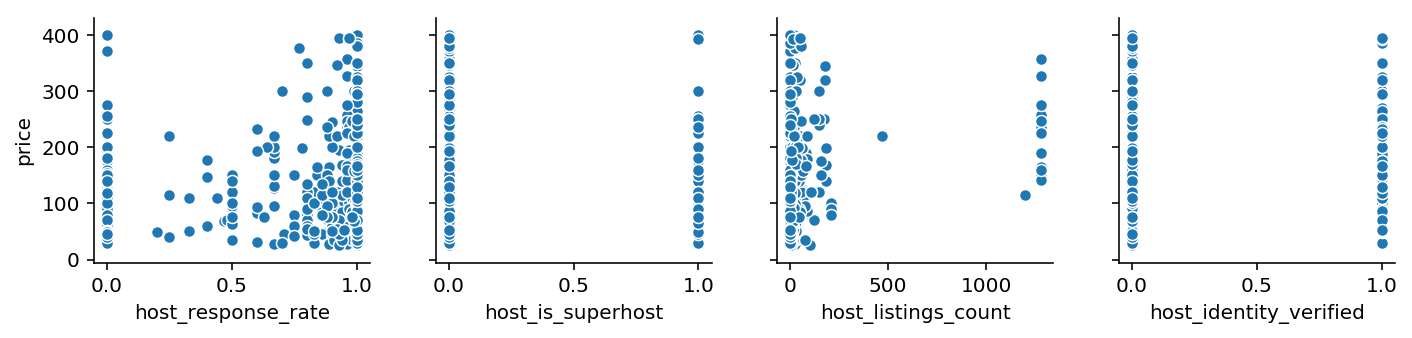

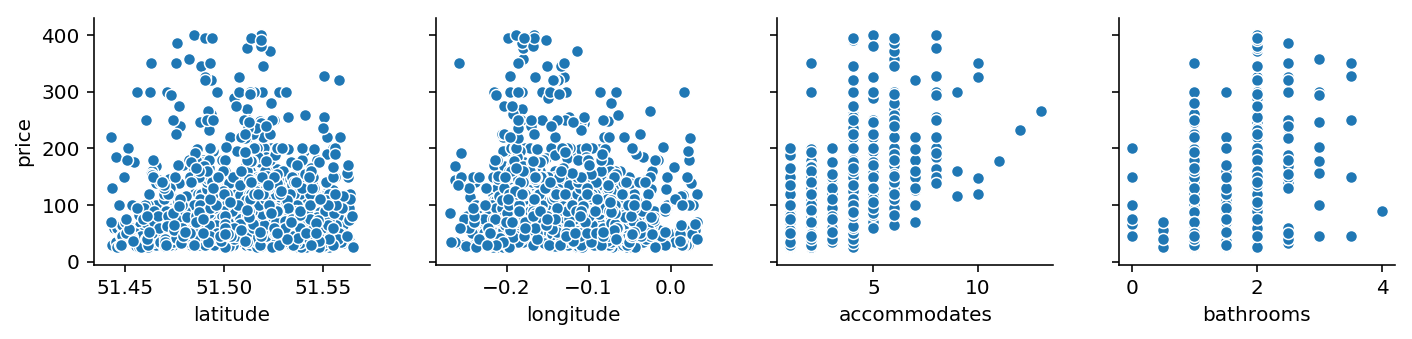

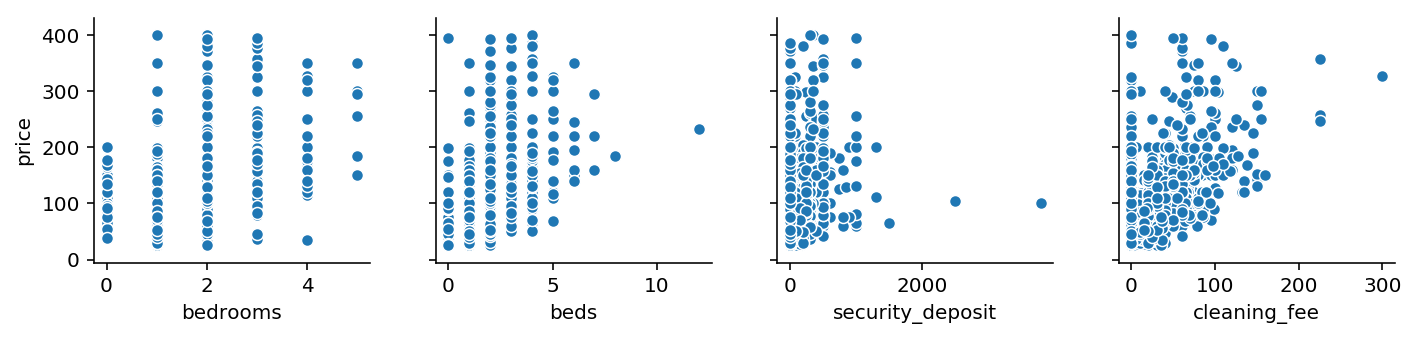

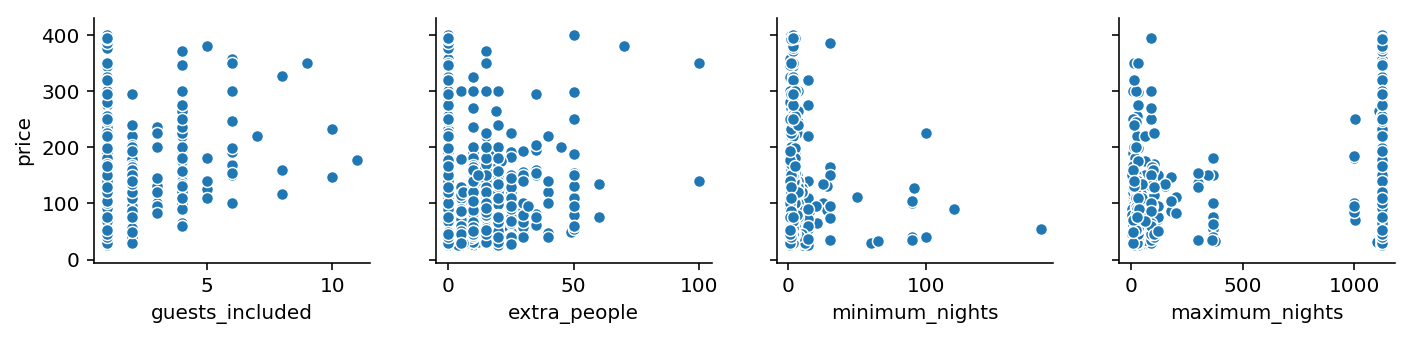

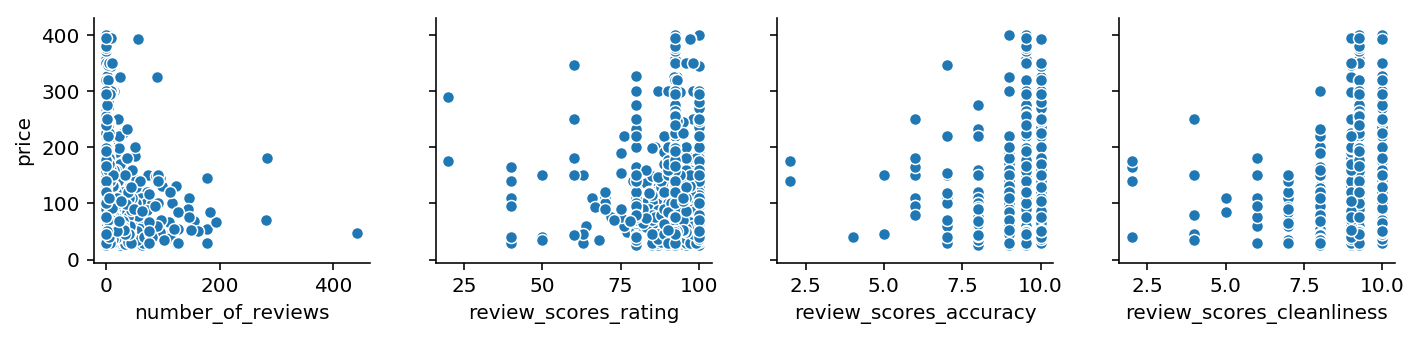

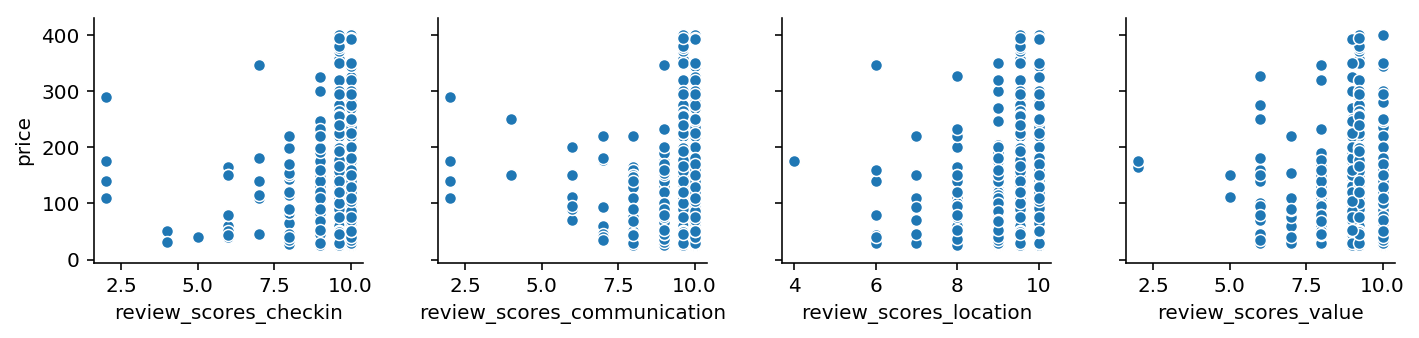

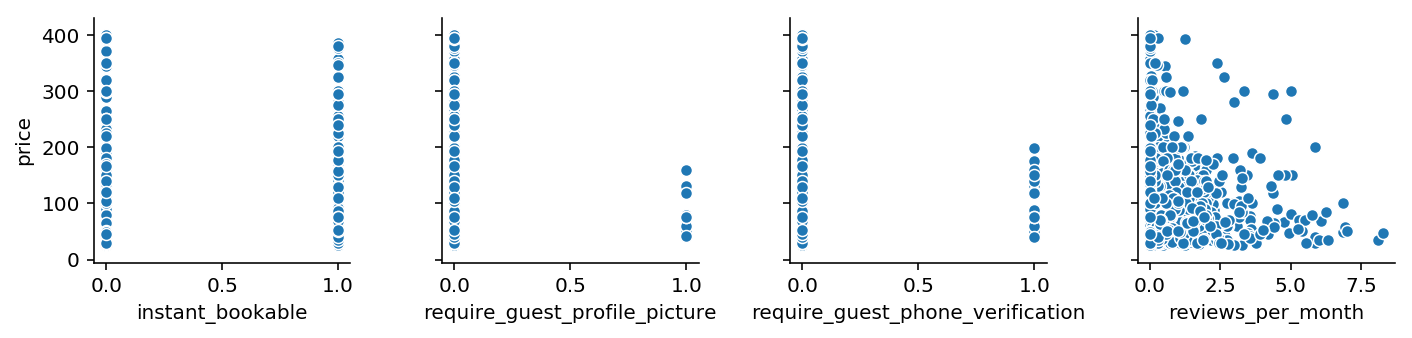

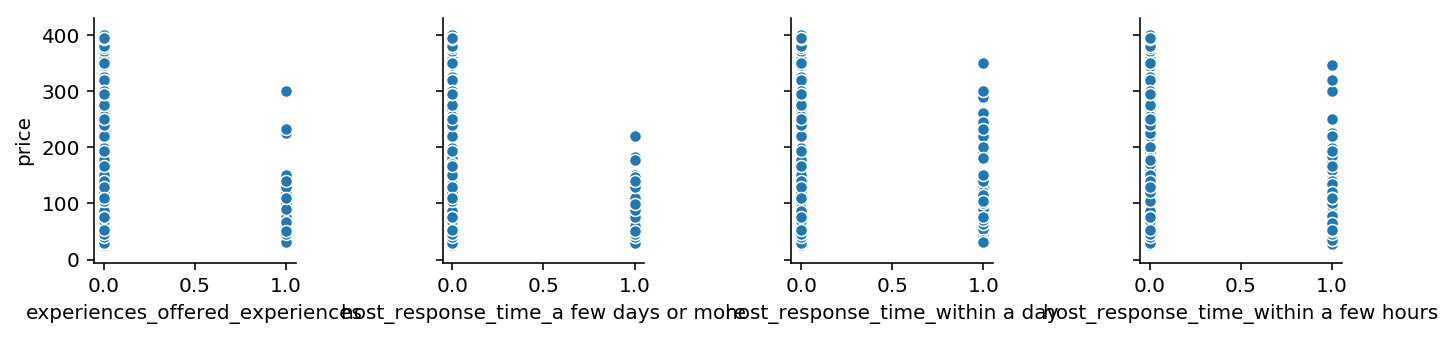

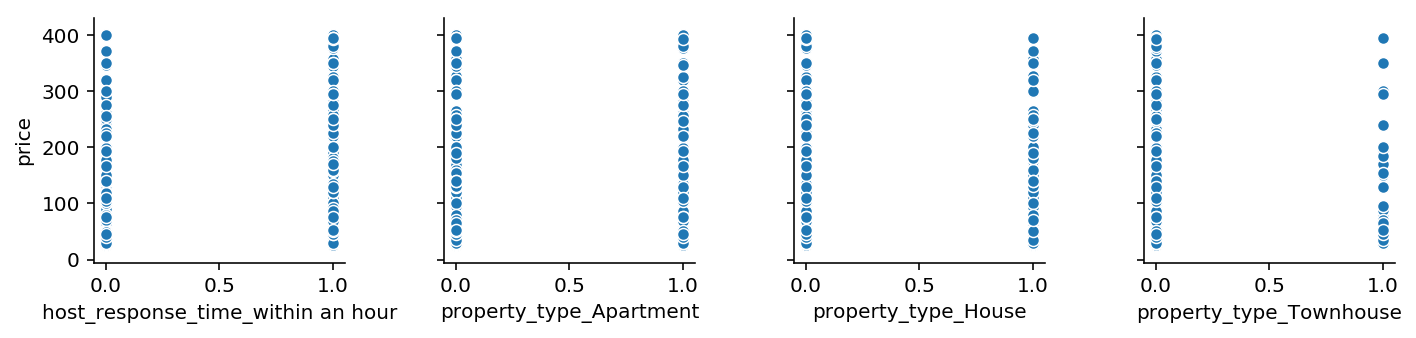

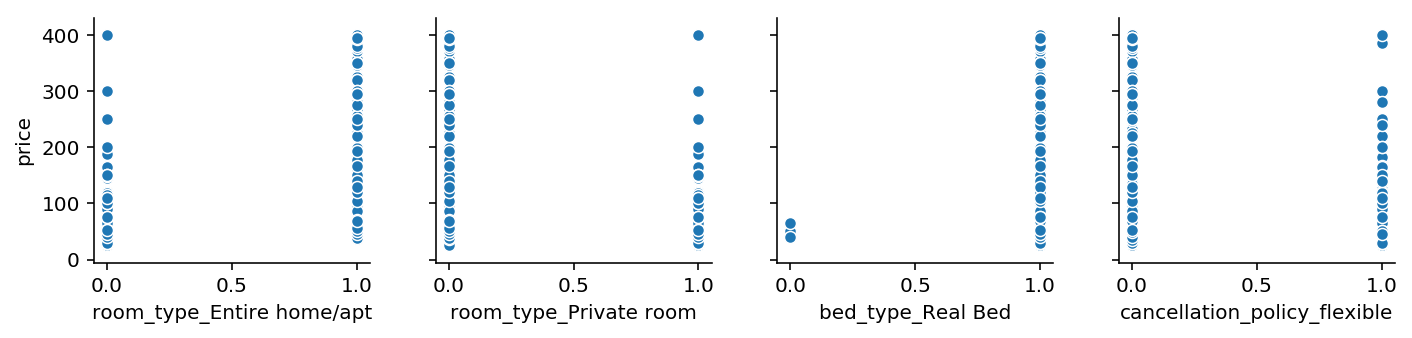

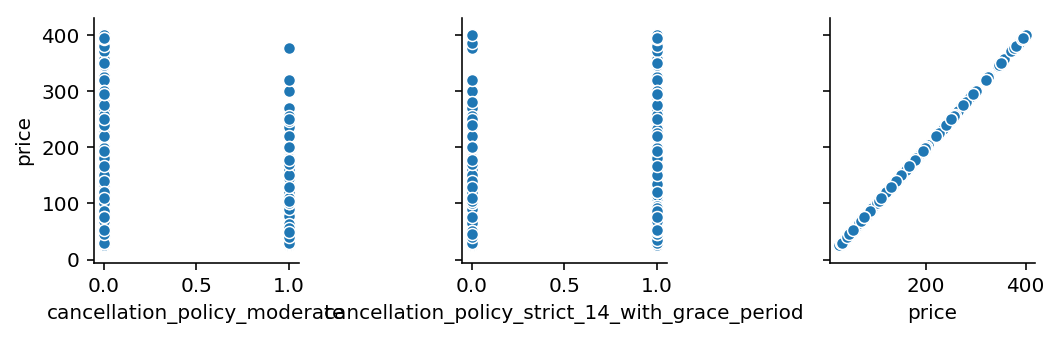

In [54]:

for i in range (0, len(train_clean.columns), 4):
    pairplot = sns.pairplot(train_clean, x_vars = train_clean.columns[i:i+4], y_vars = ['price'])

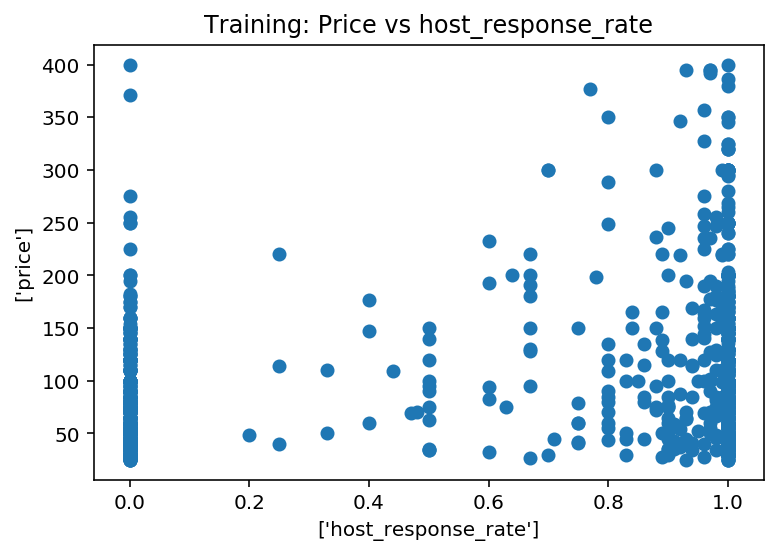

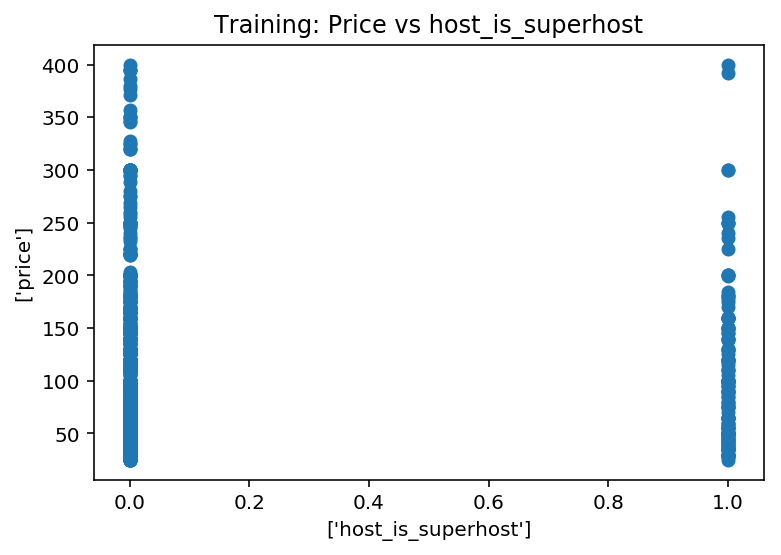

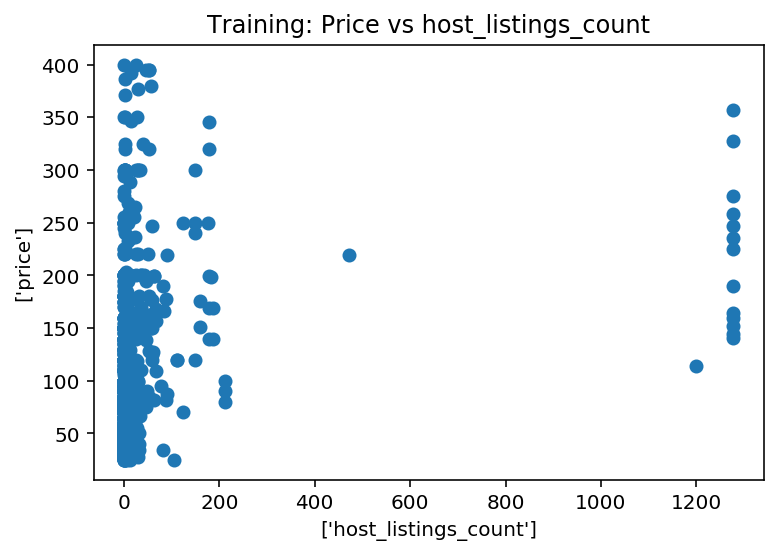

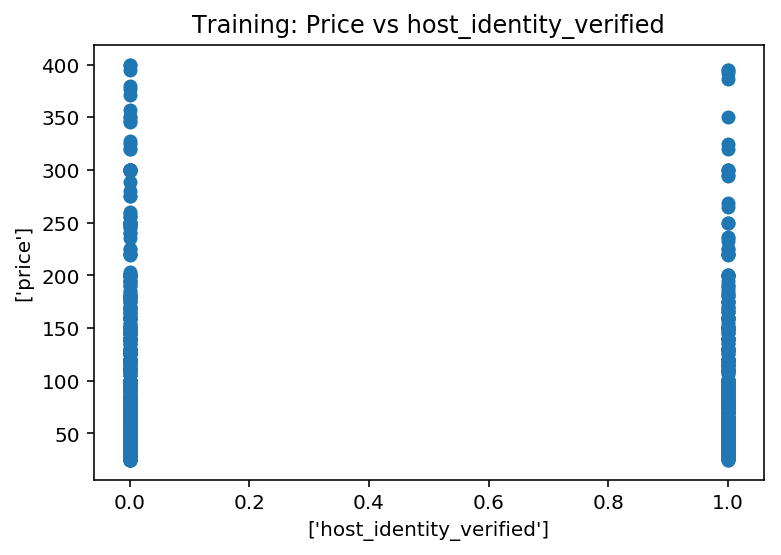

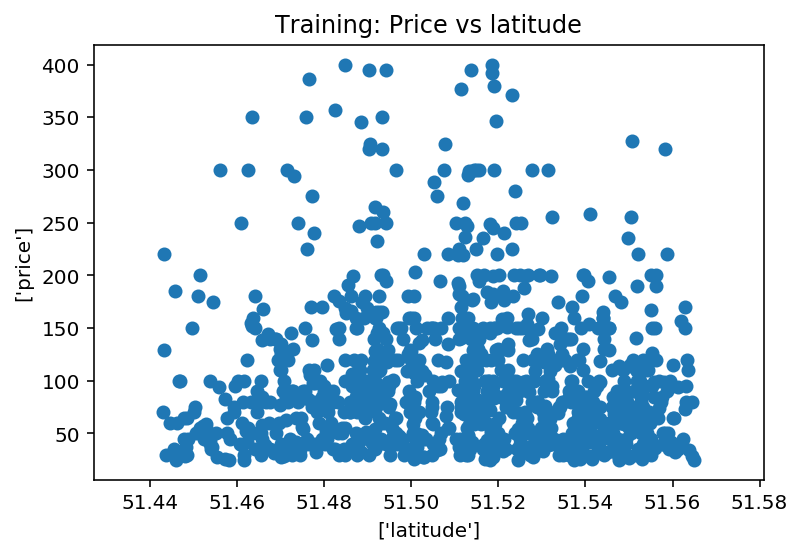

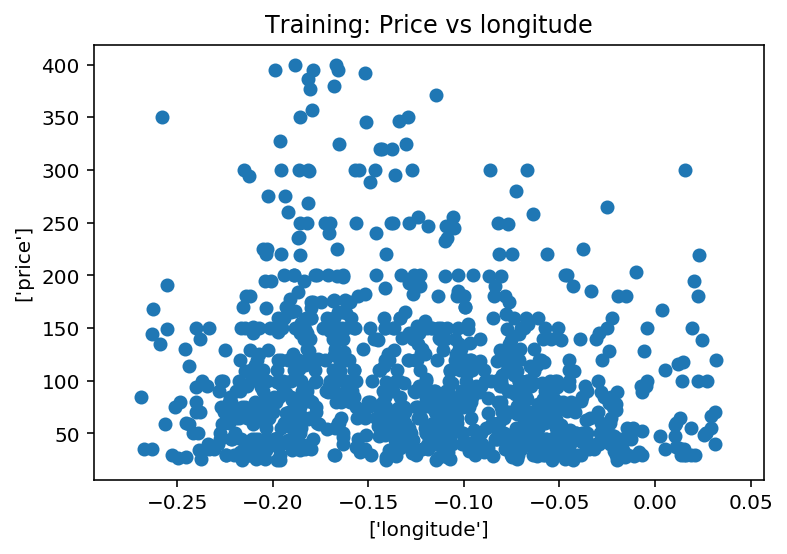

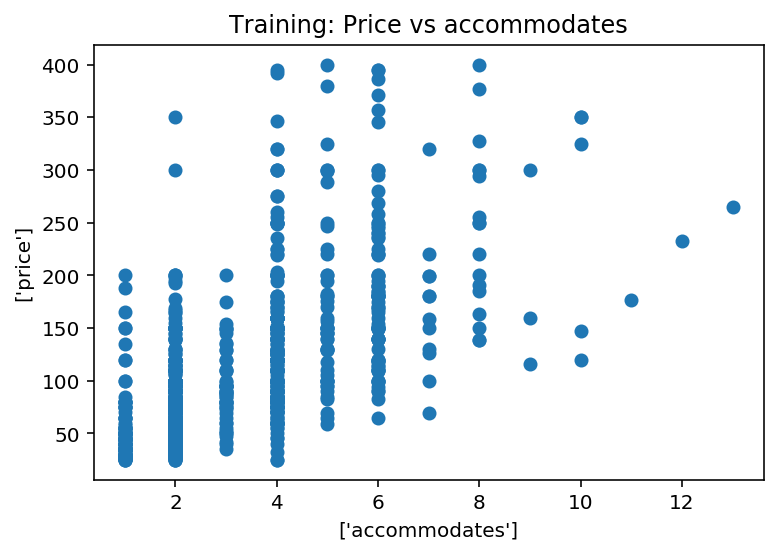

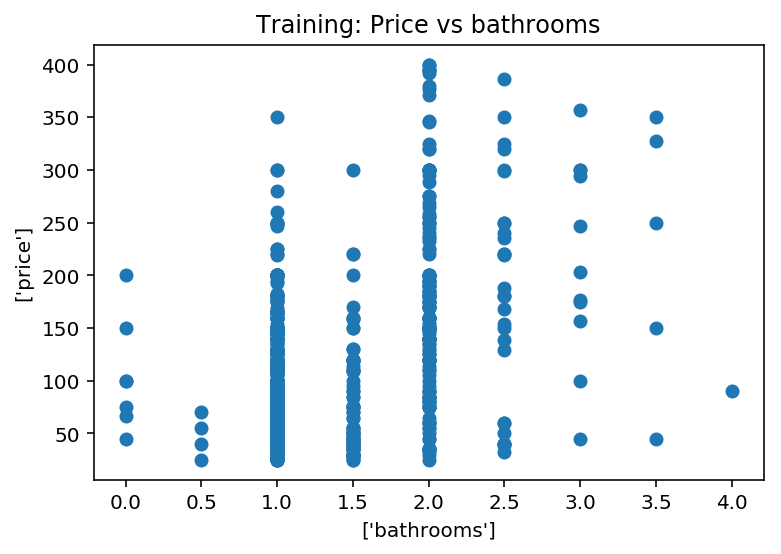

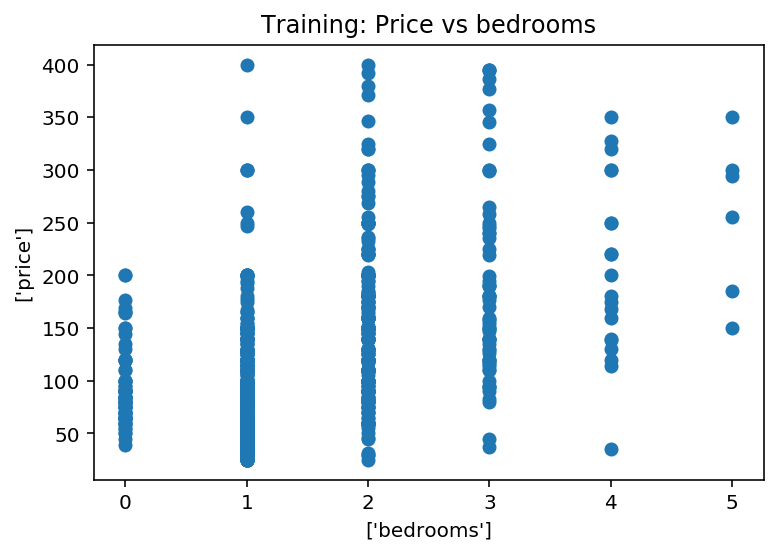

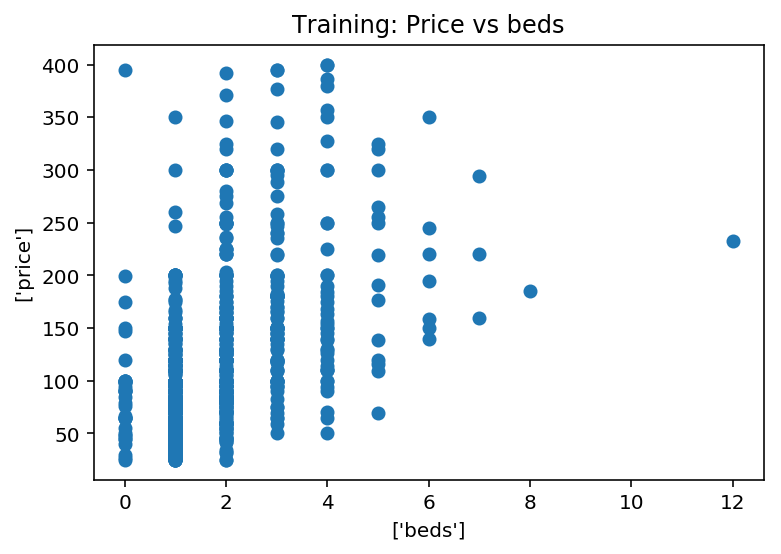

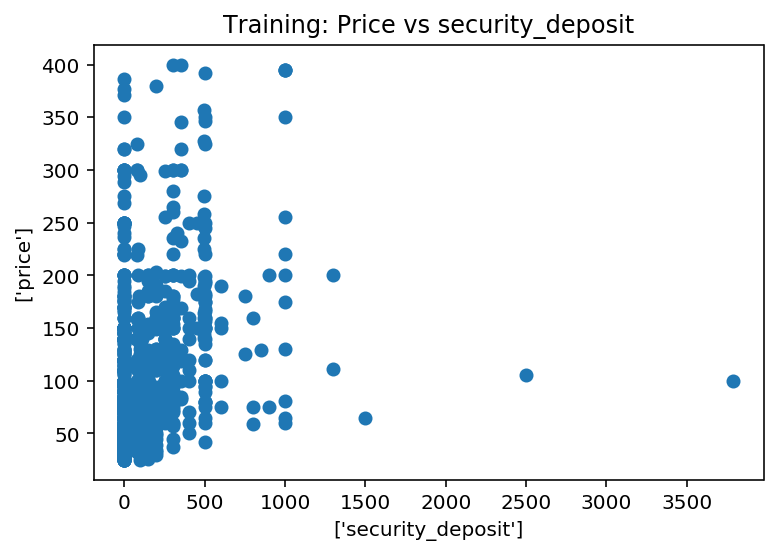

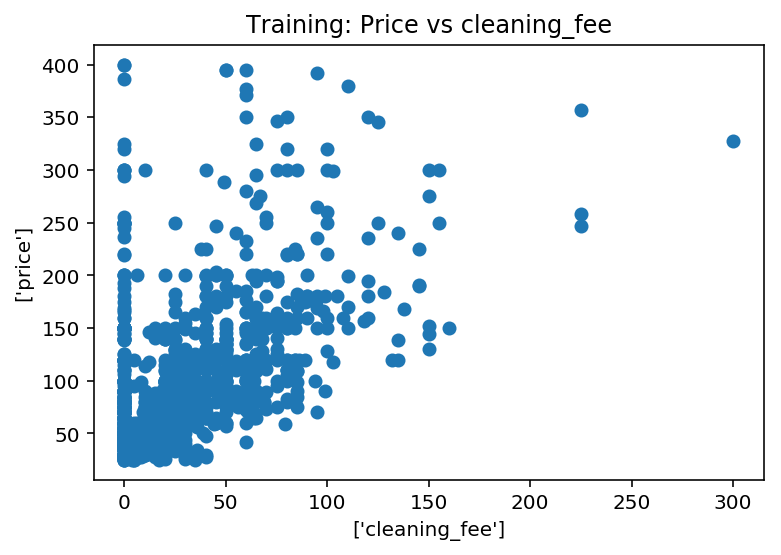

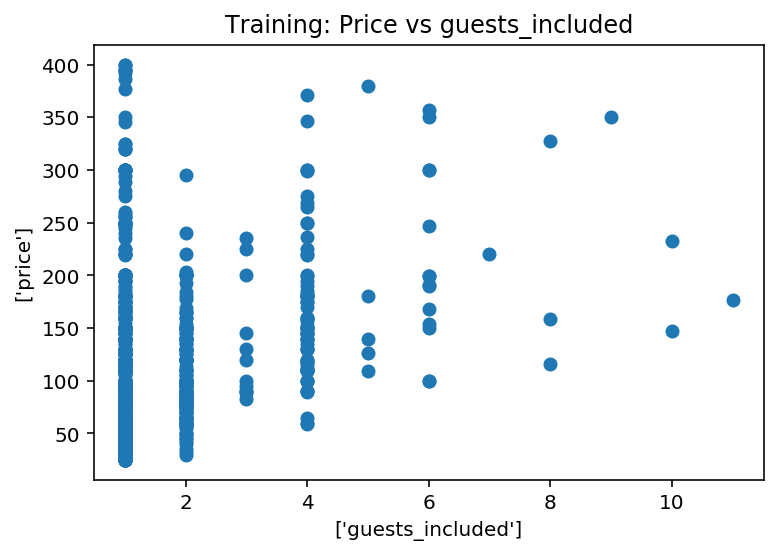

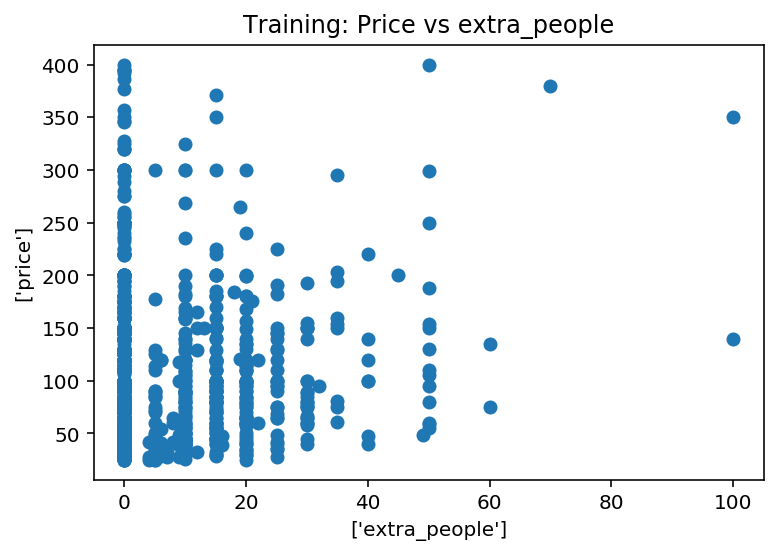

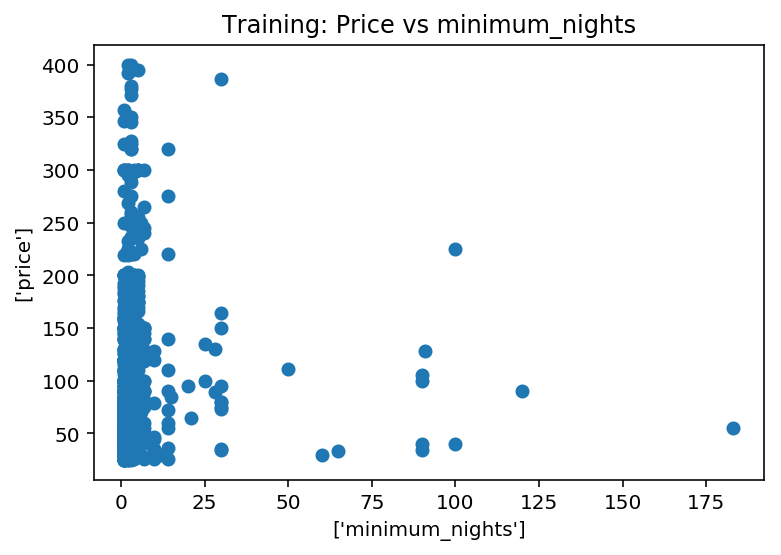

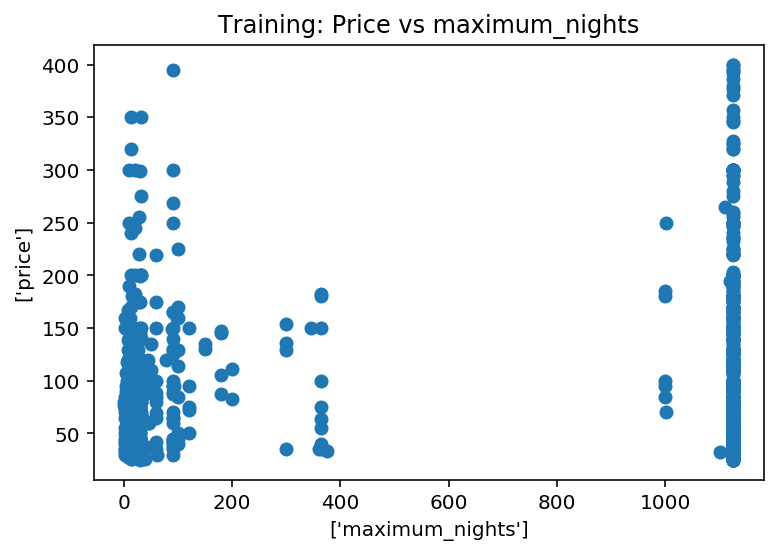

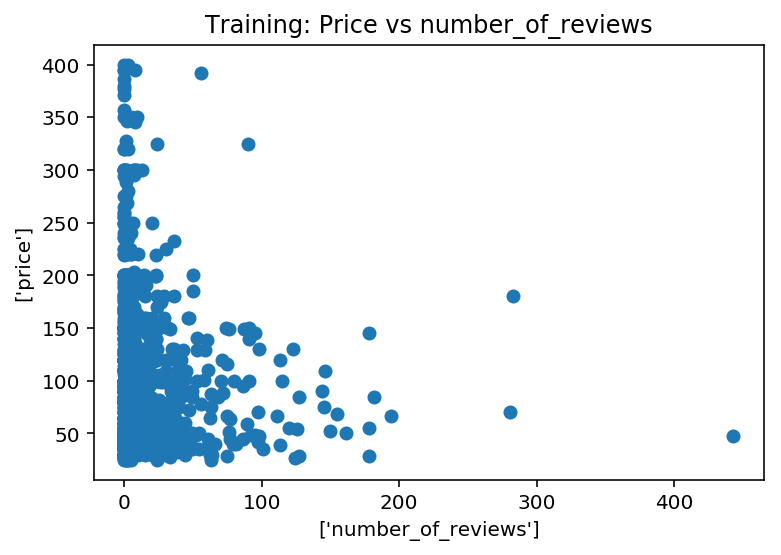

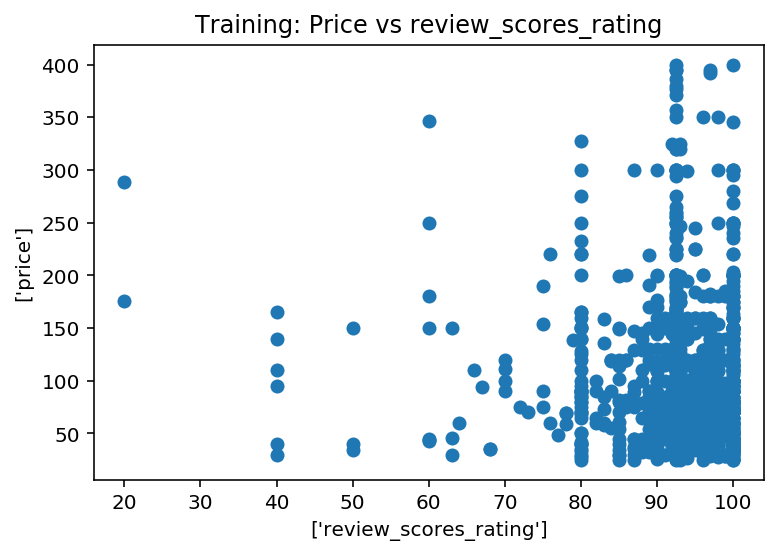

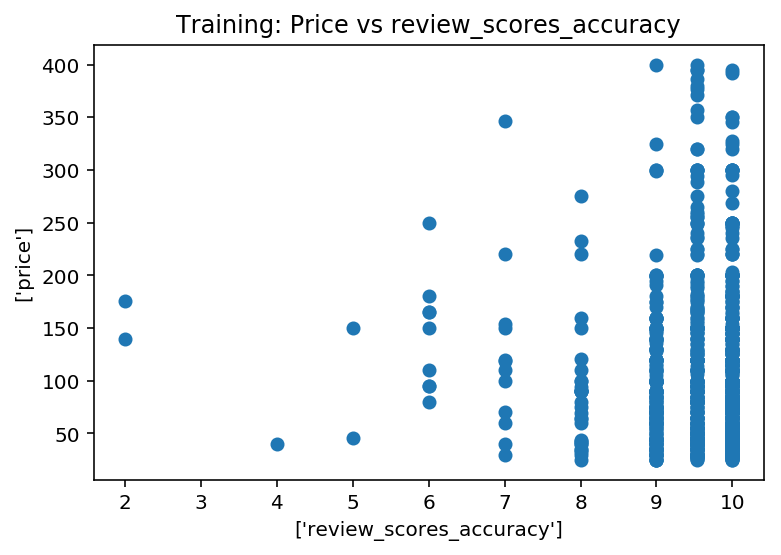

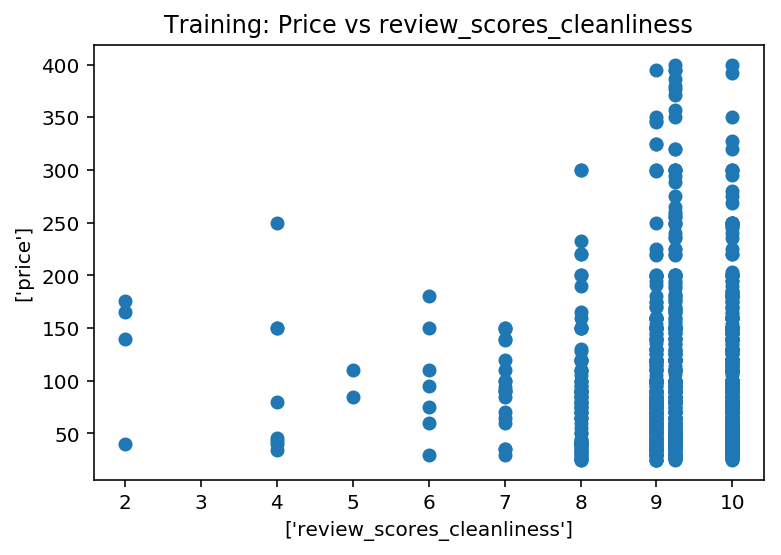

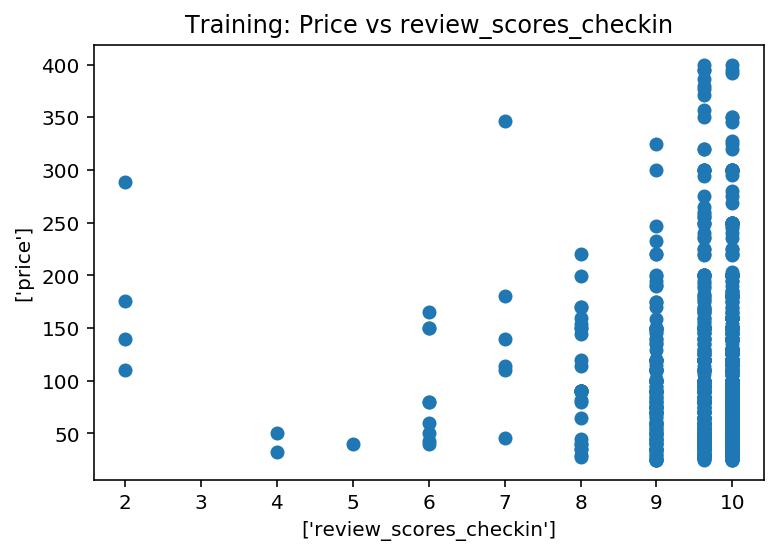

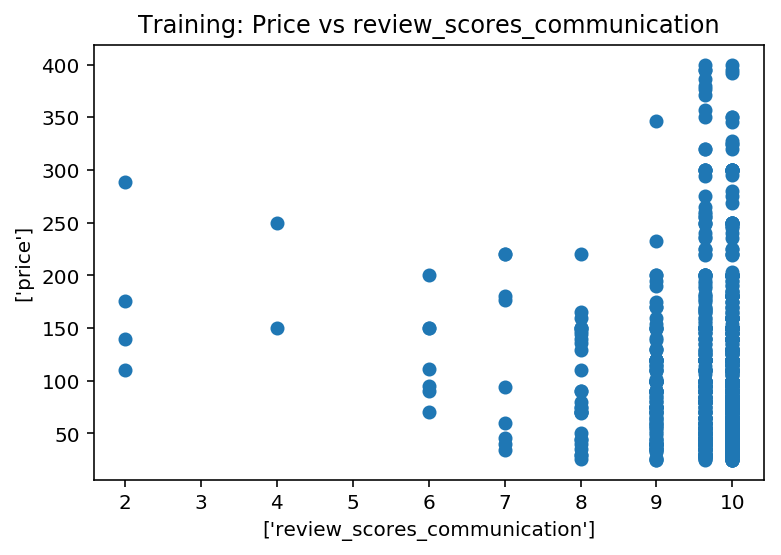

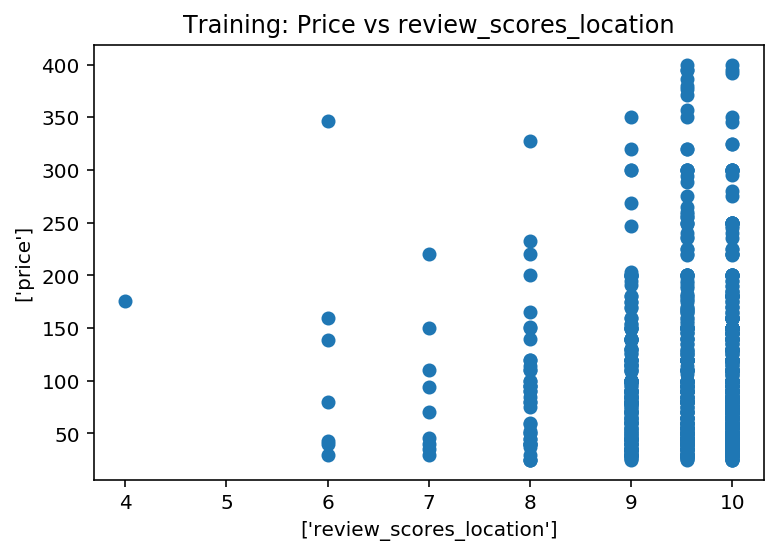

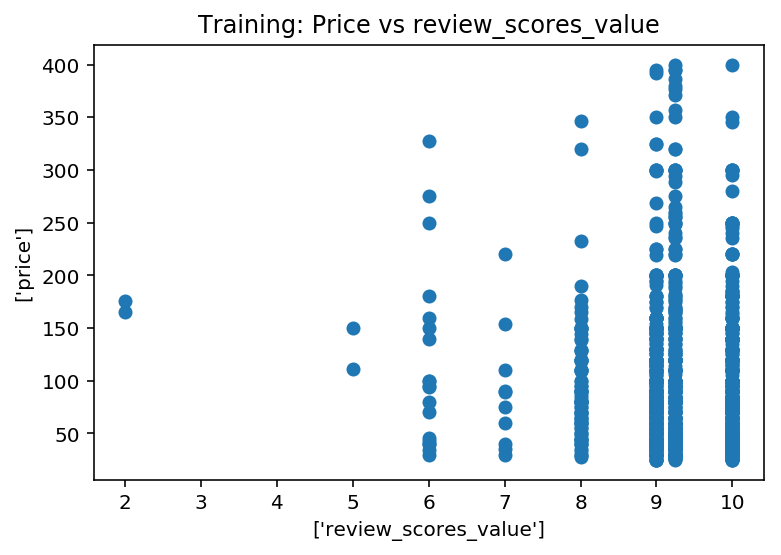

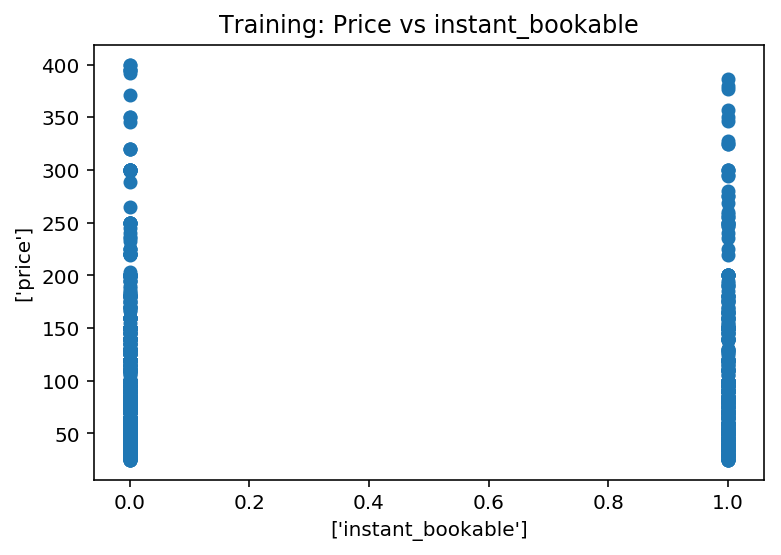

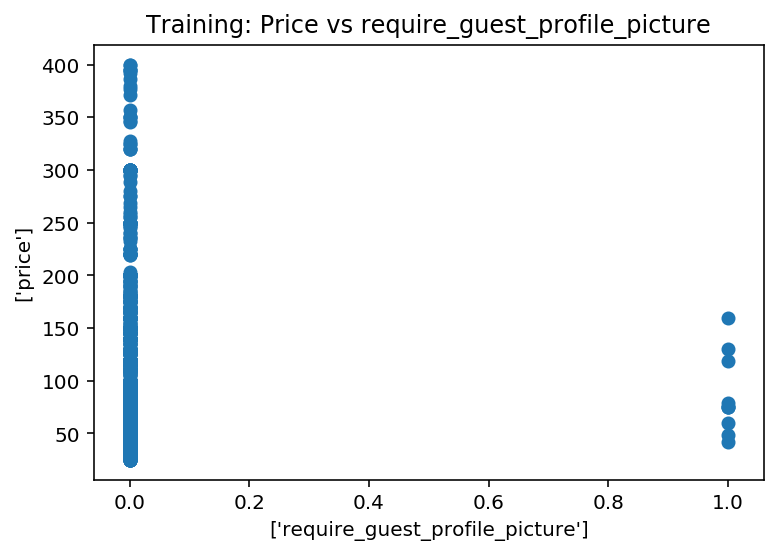

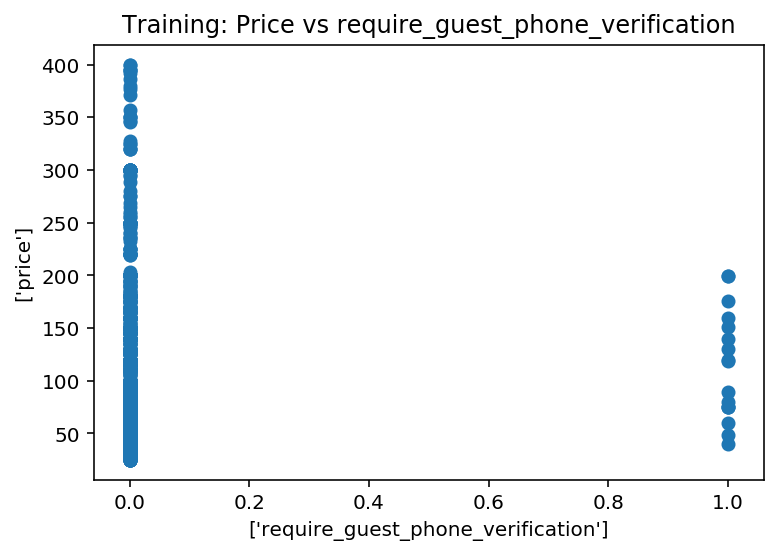

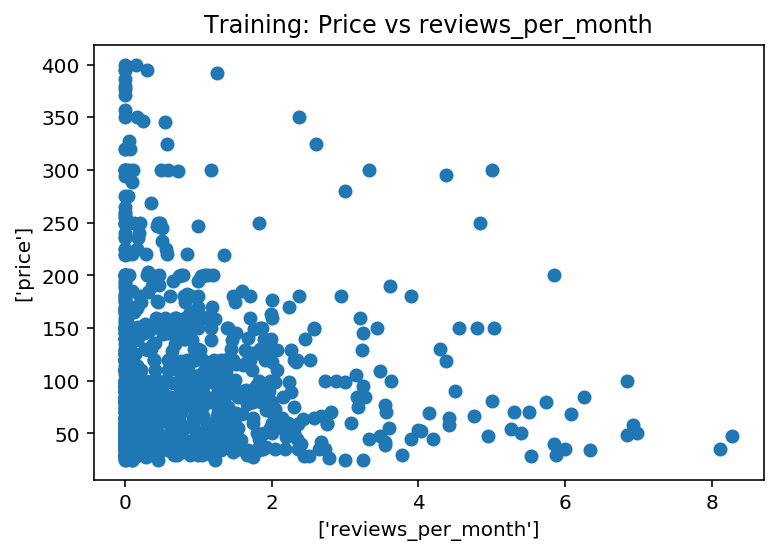

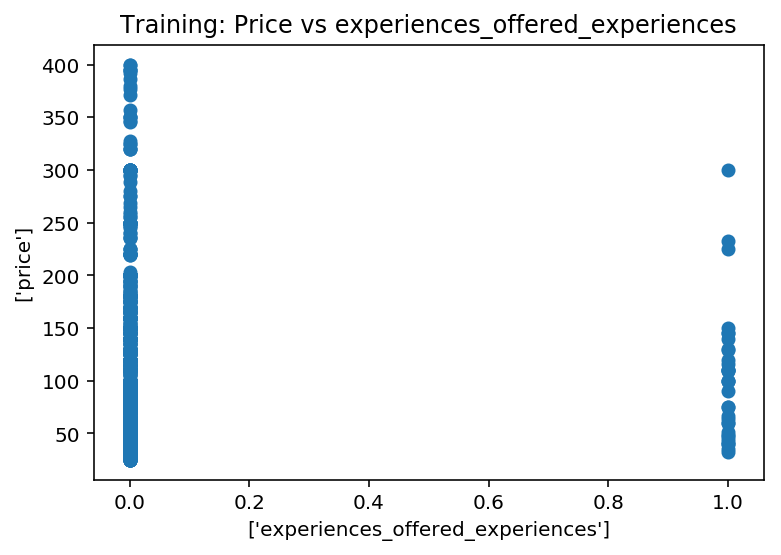

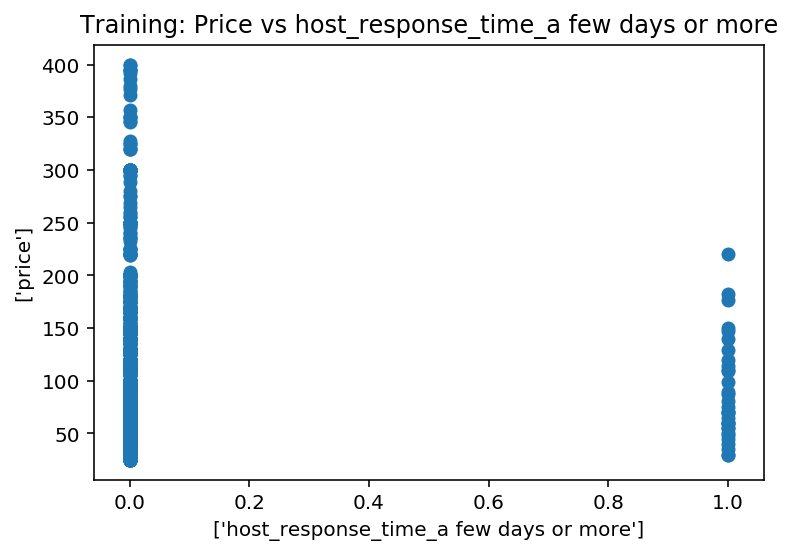

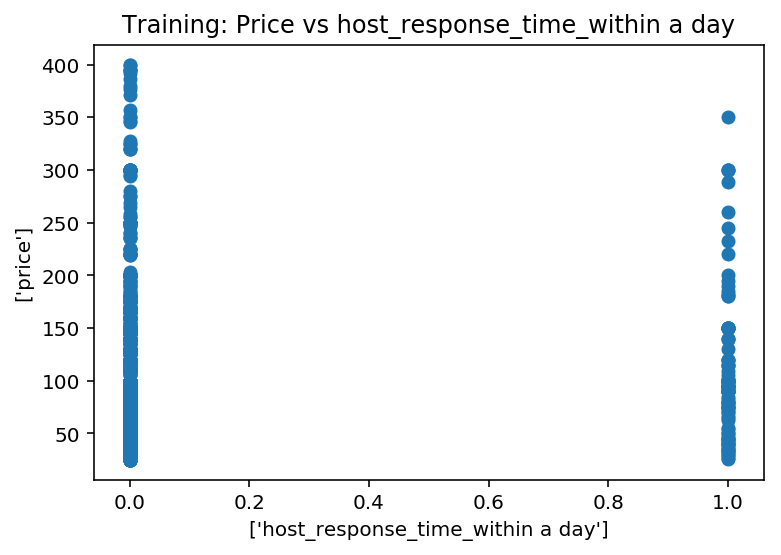

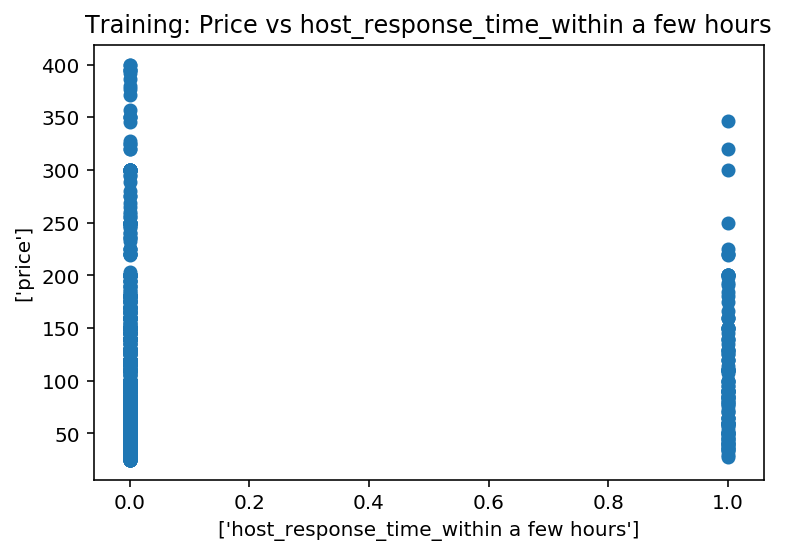

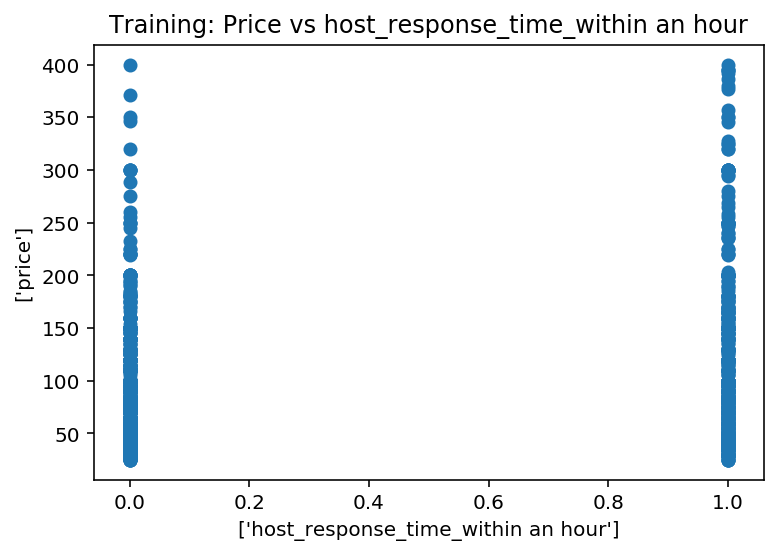

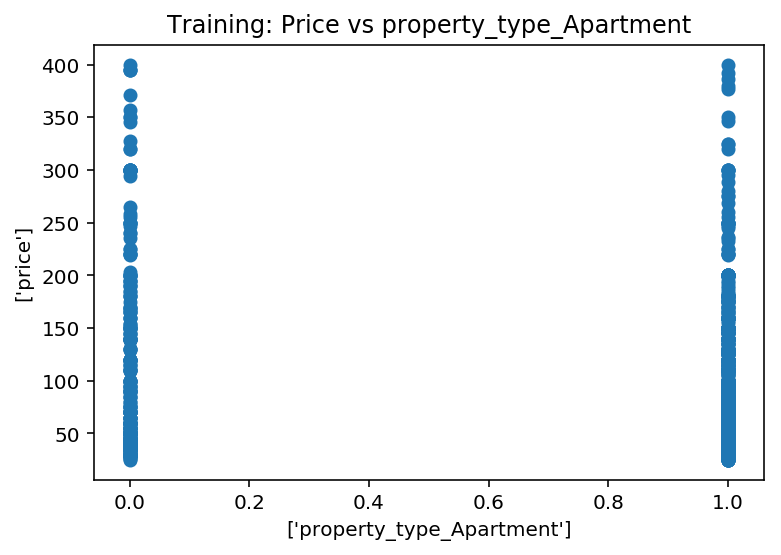

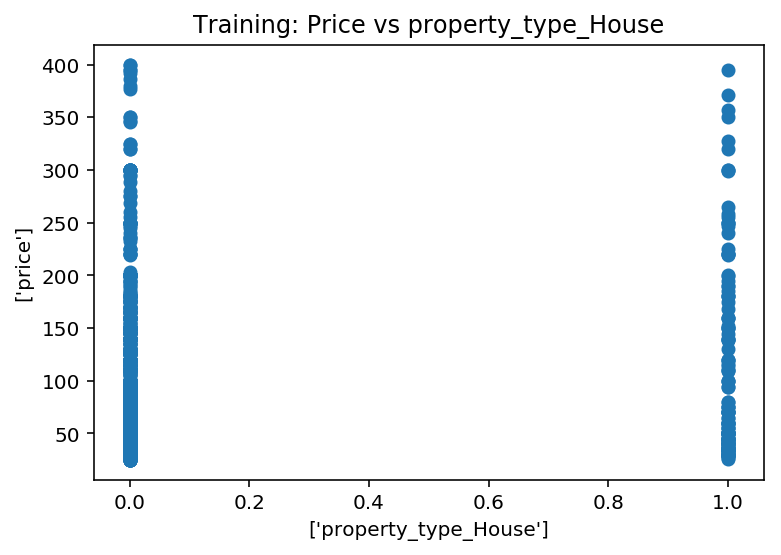

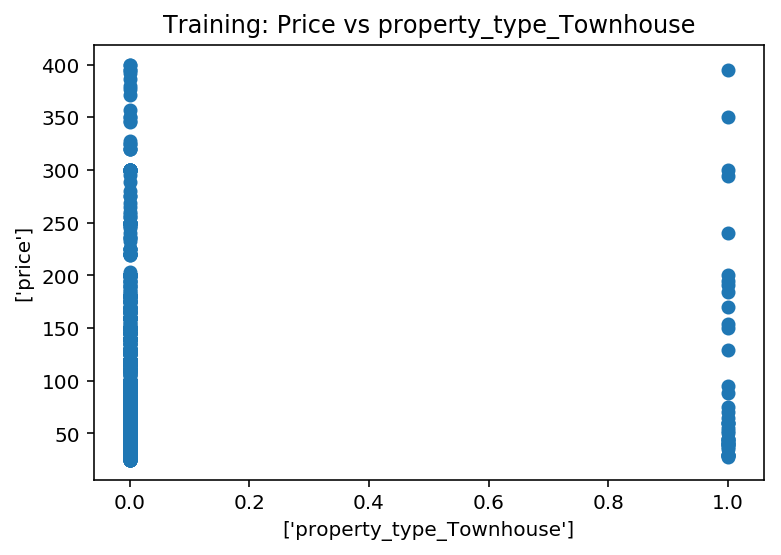

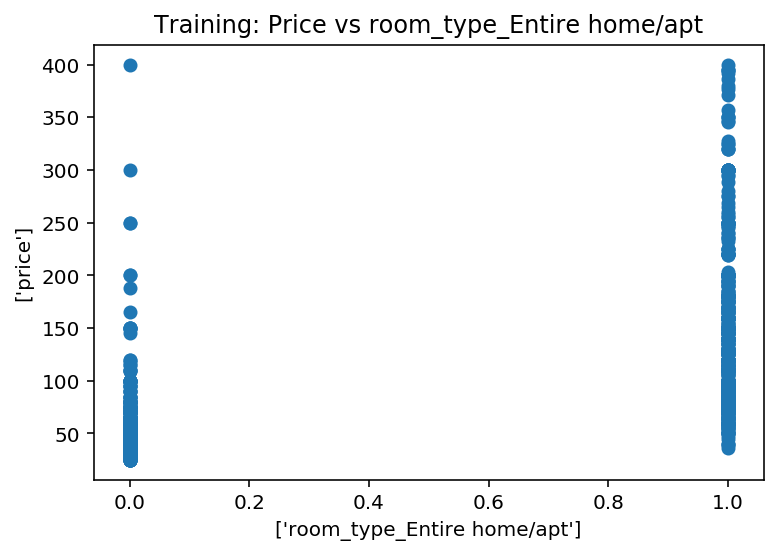

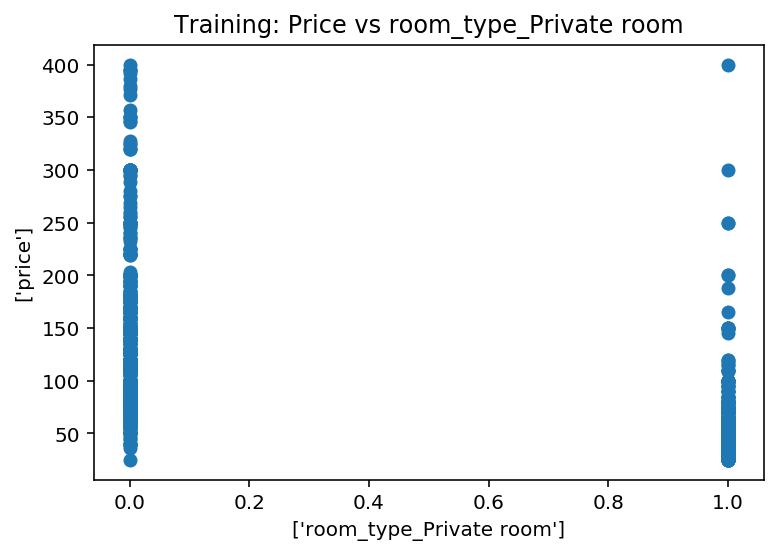

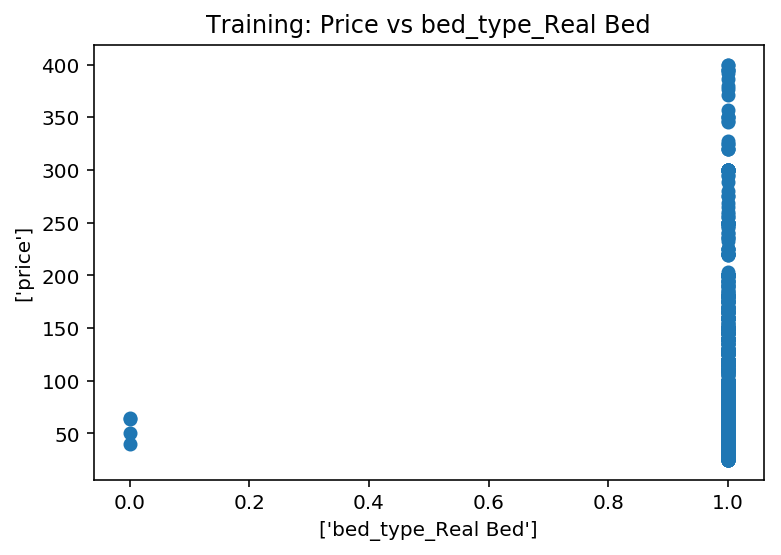

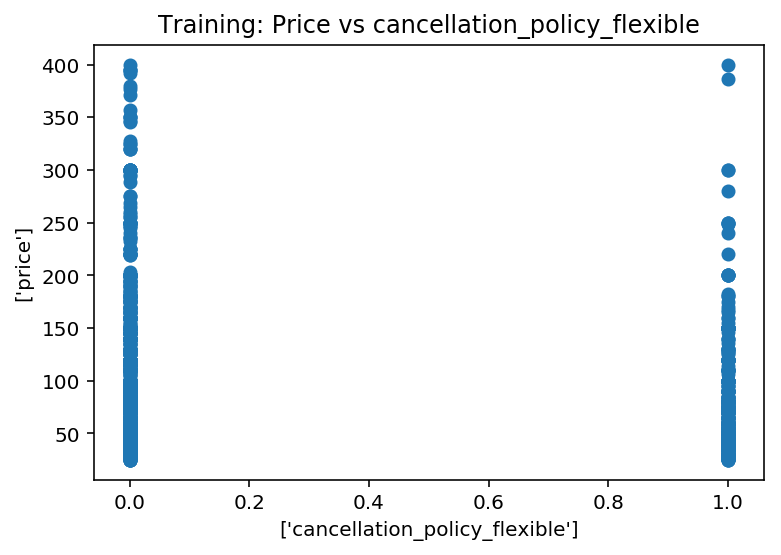

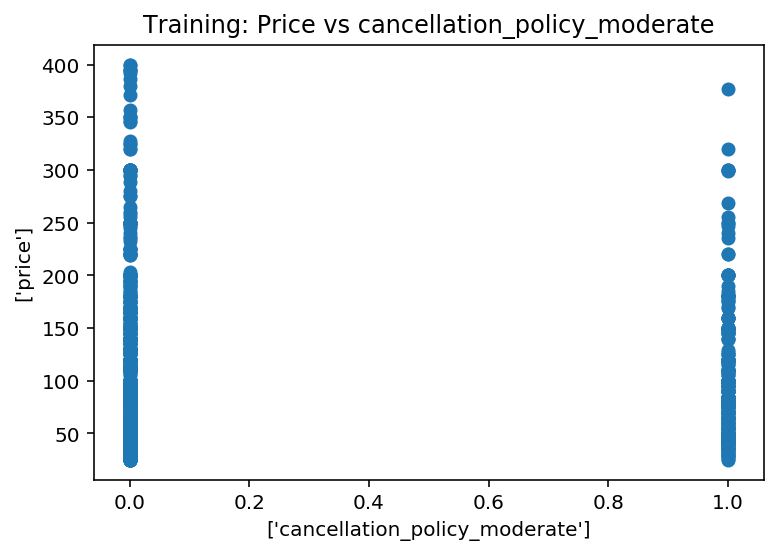

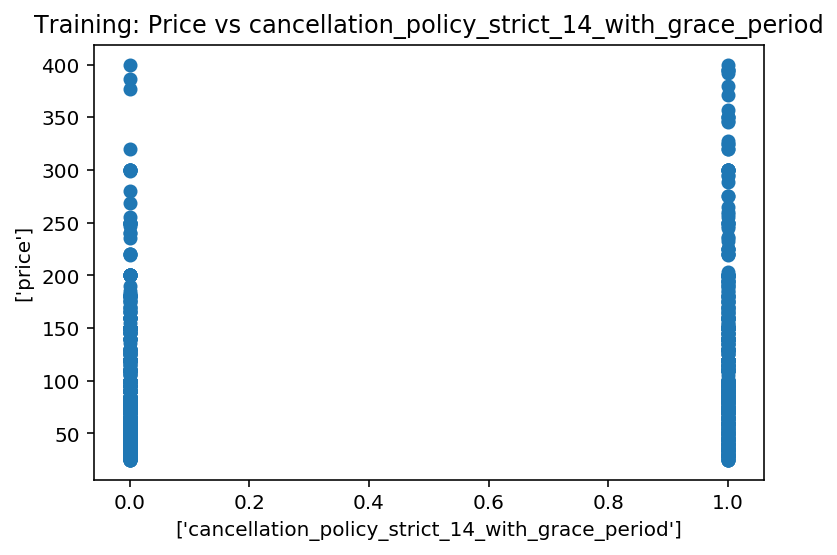

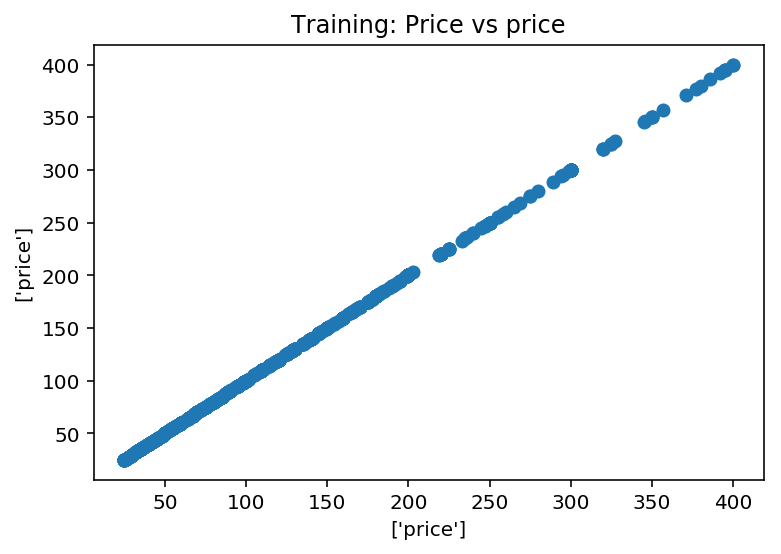

In [55]:
indep_variables = train_clean.columns
dep_variable = ["price"]
# Plot Exploratory Data Analysis
for i in range(len(indep_variables)):
    plt.scatter(train_clean[indep_variables[i]], (train_clean[dep_variable[0]]))
    plt.xlabel(str([indep_variables[i]]))
    plt.ylabel(str([dep_variable[0]]))
    plt.title("Training: Price vs "+str(indep_variables[i]))
    #plt.savefig("price vs "+indep_variables[i])
    plt.show()

In [56]:
corr = train_clean.corr()
print(abs(corr["price"]).sort_values(ascending = False))

price                                              1.000000
accommodates                                       0.649212
room_type_Entire home/apt                          0.547153
room_type_Private room                             0.538836
beds                                               0.531050
bedrooms                                           0.529931
cleaning_fee                                       0.520284
bathrooms                                          0.472093
guests_included                                    0.352264
security_deposit                                   0.299492
cancellation_policy_flexible                       0.236698
host_listings_count                                0.236387
cancellation_policy_strict_14_with_grace_period    0.234128
host_response_rate                                 0.217398
host_response_time_within an hour                  0.182686
longitude                                          0.169498
maximum_nights                          

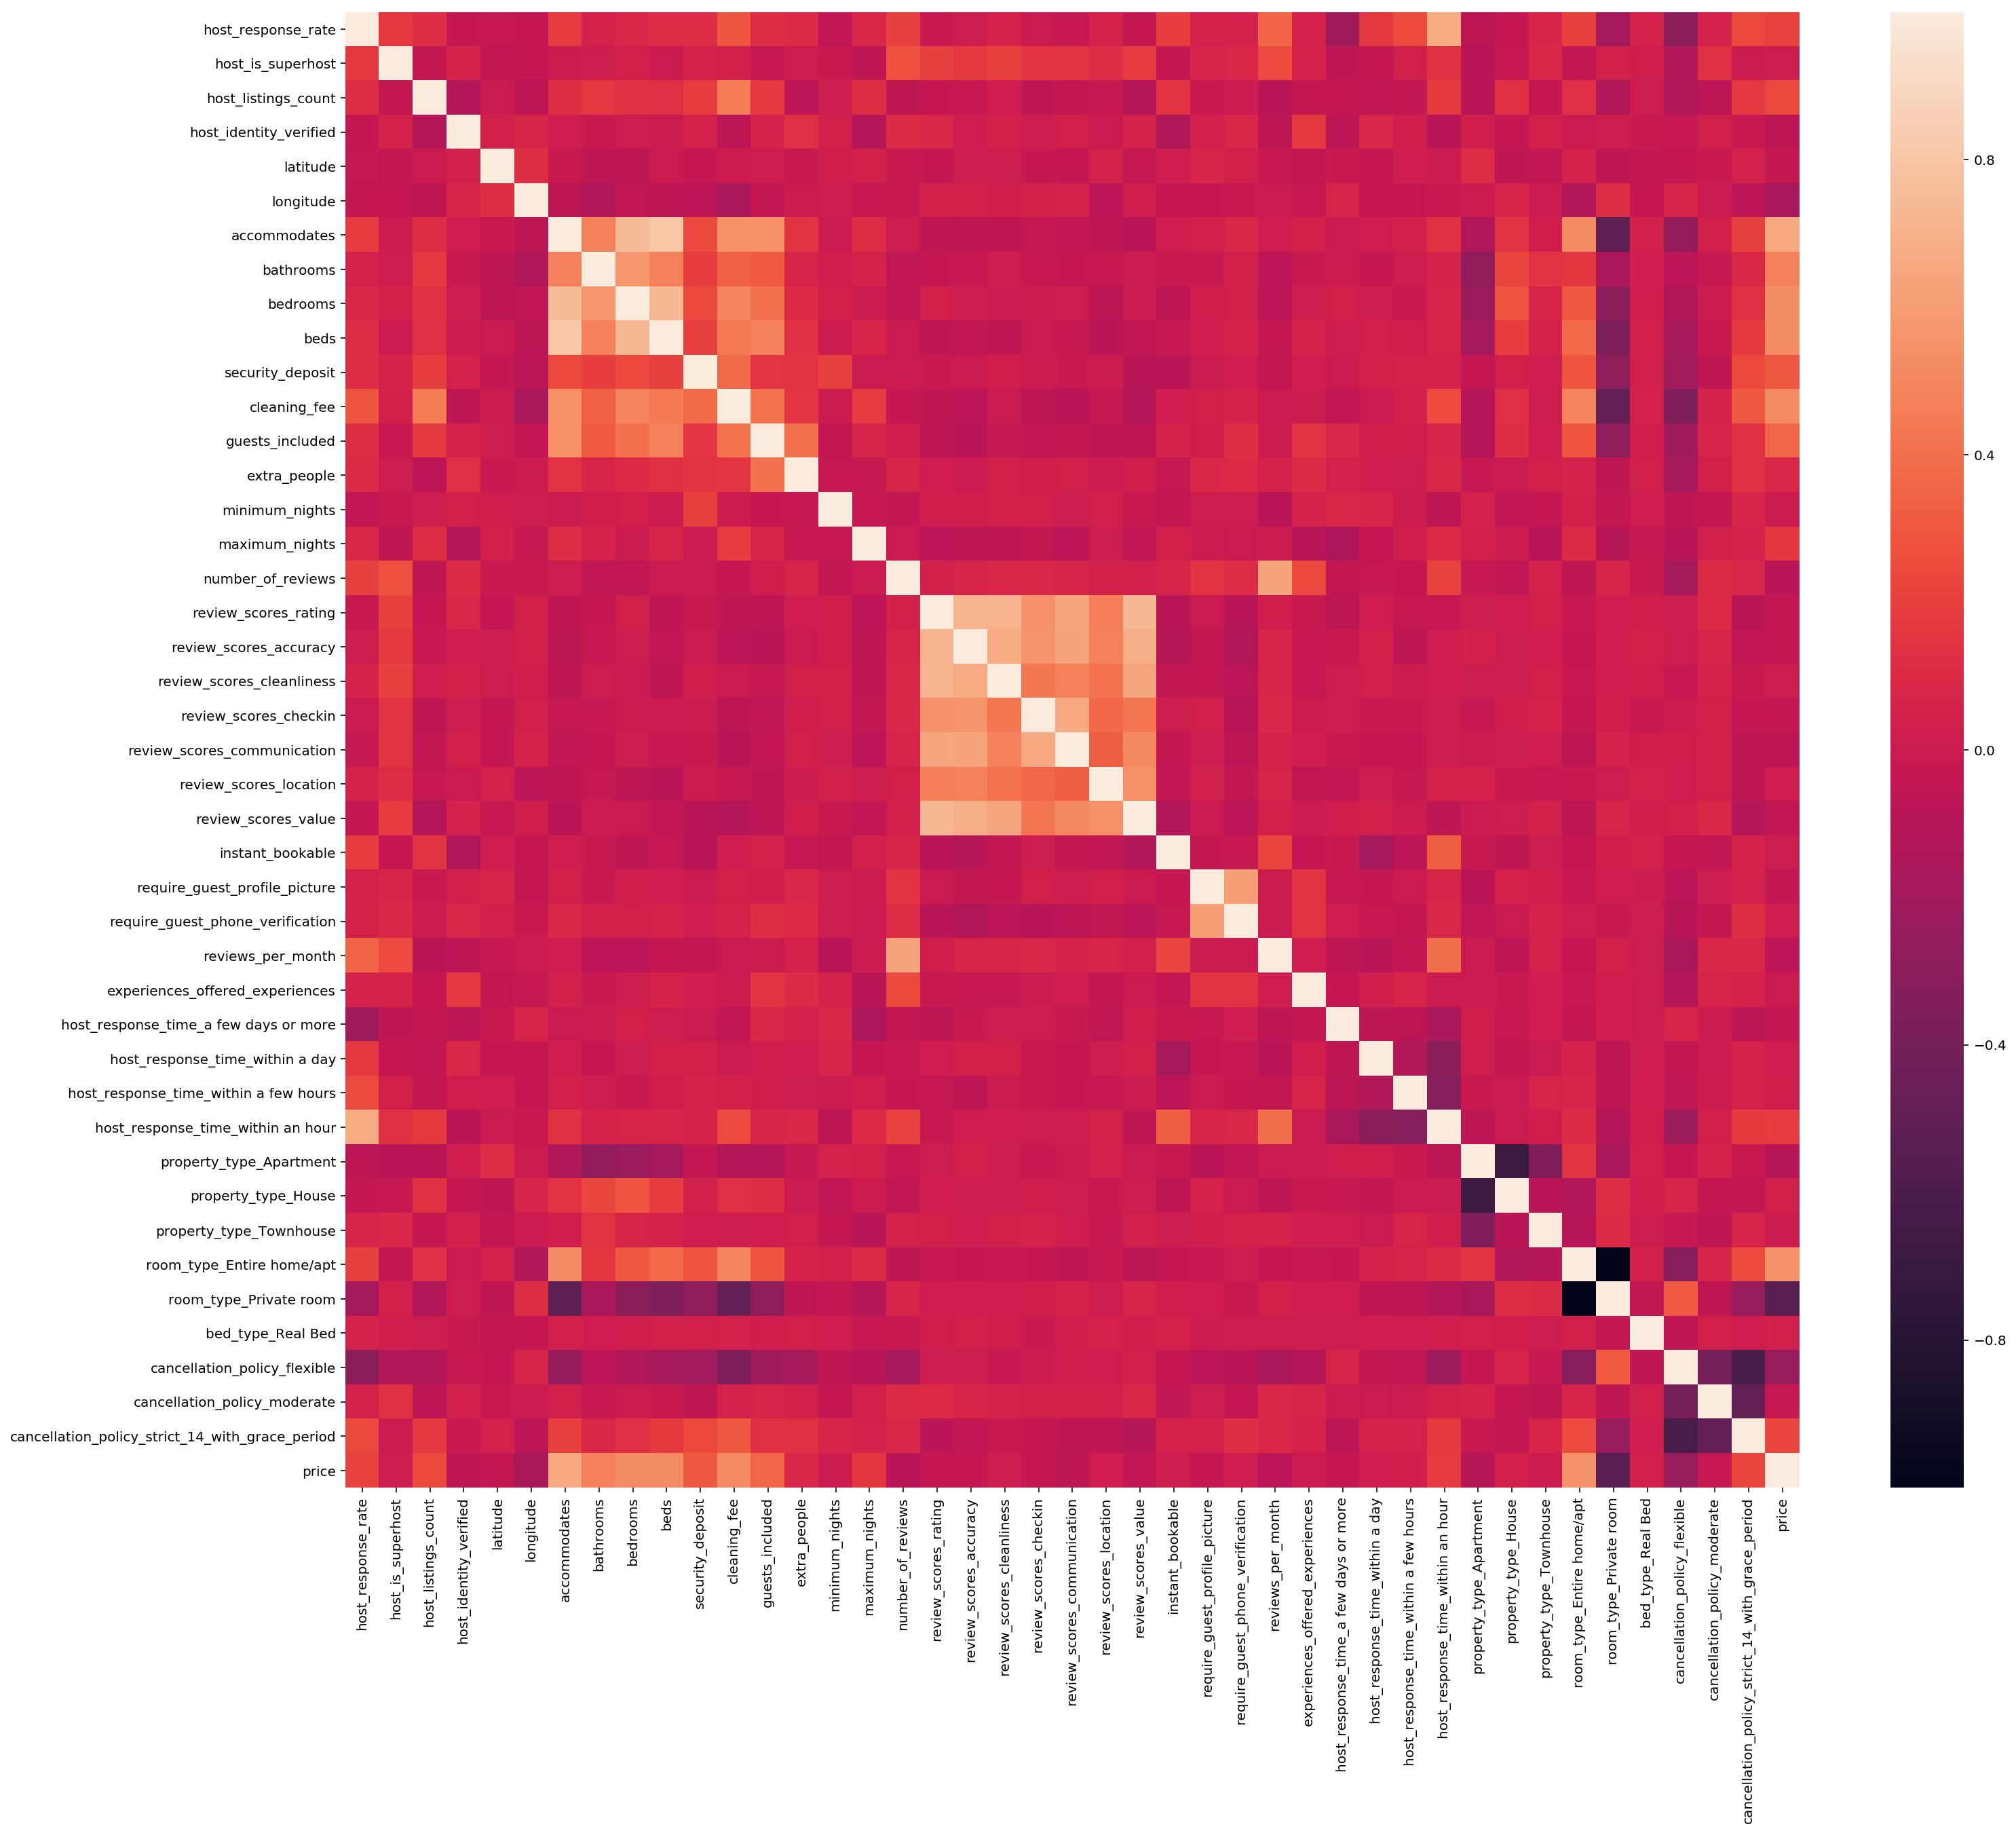

In [57]:
plt.figure(figsize=(24, 20))
heatmap = sns.heatmap(corr,vmin = -1, vmax = 1)

In [58]:
cols = abs(corr).nlargest(11, 'price')['price'].index
corr_most_10 = cols[1:].tolist()
corr_most_10

['accommodates',
 'room_type_Entire home/apt',
 'room_type_Private room',
 'beds',
 'bedrooms',
 'cleaning_fee',
 'bathrooms',
 'guests_included',
 'security_deposit',
 'cancellation_policy_flexible']

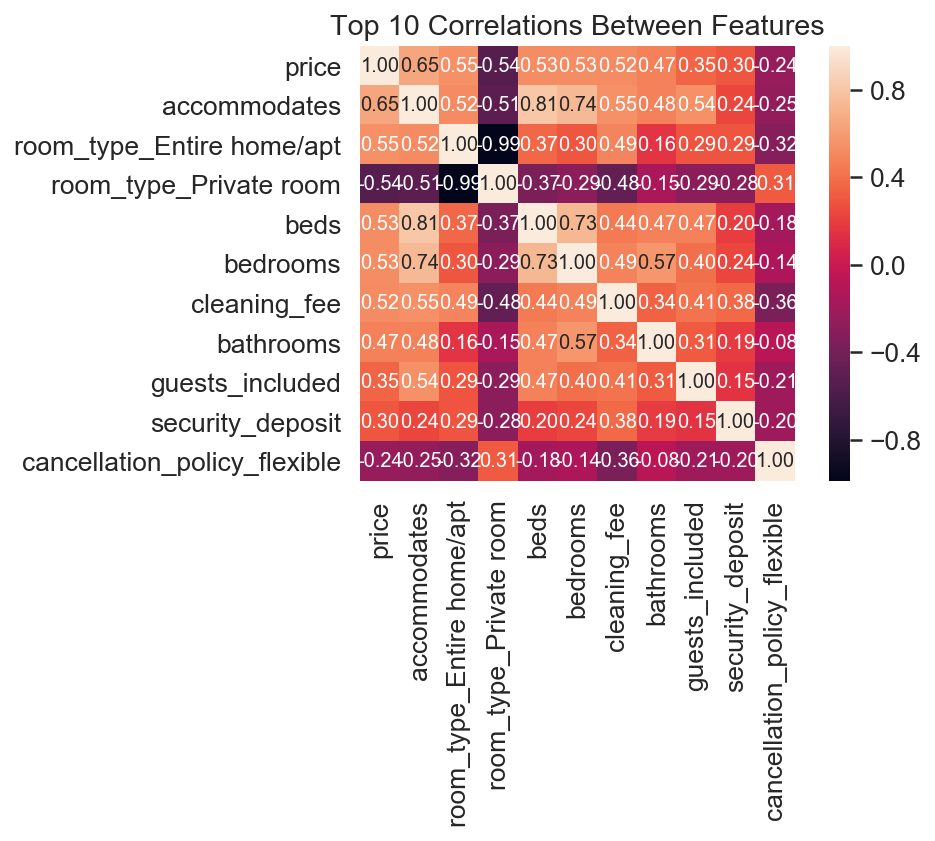

In [59]:
# plot the heatmap
cm = np.corrcoef(train_clean[cols].values.T)
sns.set(font_scale=1.2)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10},
                 yticklabels=cols.values, xticklabels=cols.values)
plt.title('Top 10 Correlations Between Features');

## Feature Engineering

In [63]:
pd.DataFrame({"Column name": [x for x in train_clean ],"Skew":[train_clean[x].skew() for x in train_clean]})

Column name       Skew
0                                host_response_rate  -0.650628
1                                 host_is_superhost   2.139440
2                               host_listings_count   7.811469
3                            host_identity_verified   0.451729
4                                          latitude  -0.248382
5                                         longitude   0.116462
6                                      accommodates   1.397247
7                                         bathrooms   1.696832
8                                          bedrooms   1.406498
9                                              beds   2.358805
10                                 security_deposit   5.752068
11                                     cleaning_fee   1.862883
12                                  guests_included   3.320158
13                                     extra_people   2.508350
14                                   minimum_nights   9.226084
15                                   maximum_nights  -0.517556
16                                number_of_reviews   5.310228
17                             review_scores_rating  -3.425709
18                           review_scores_accuracy  -3.993732
19                        review_scores_cleanliness  -3.262546
20                            review_scores_checkin  -5.205845
21                      review_scores_communication  -5.292605
22                           review_scores_location  -2.763673
23                              review_scores_value  -2.733147
24                                 instant_bookable   0.495194
25                    require_guest_profile_picture   9.864173
26                 require_guest_phone_verification   7.483902
27                                reviews_per_month   2.508207
28                  experiences_offered_experiences   5.150390
29            host_response_time_a few days or more   5.326174
30                  host_response_time_within a day   2.652251
31            host_response_time_within a few hours   2.386754
32                host_response_time_within an hour   0.209448
33                          property_type_Apartment  -1.144150
34                              property_type_House   2.152048
35                          property_type_Townhouse   4.636536
36                        room_type_Entire home/apt  -0.425941
37                           room_type_Private room   0.451729
38                                bed_type_Real Bed -15.739981
39                     cancellation_policy_flexible   0.709763
40                     cancellation_policy_moderate   1.251882
41  cancellation_policy_strict_14_with_grace_period   0.287339
42                                            price   1.645467

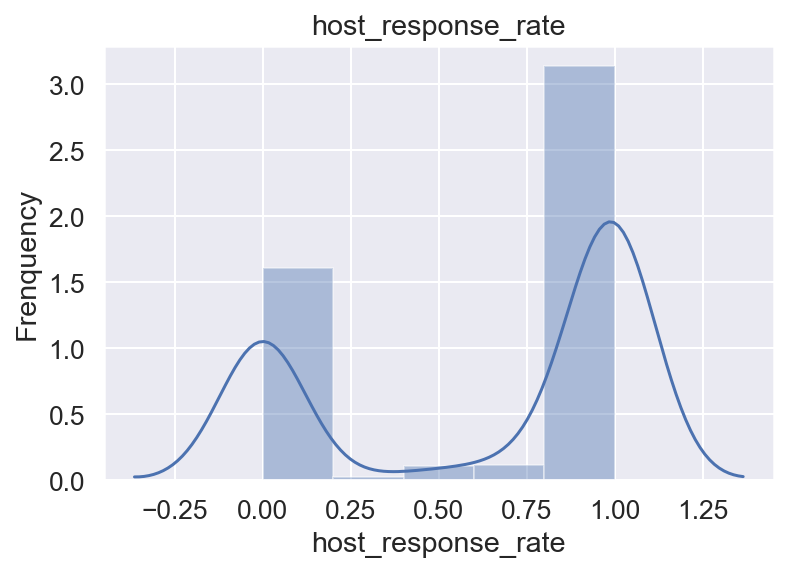

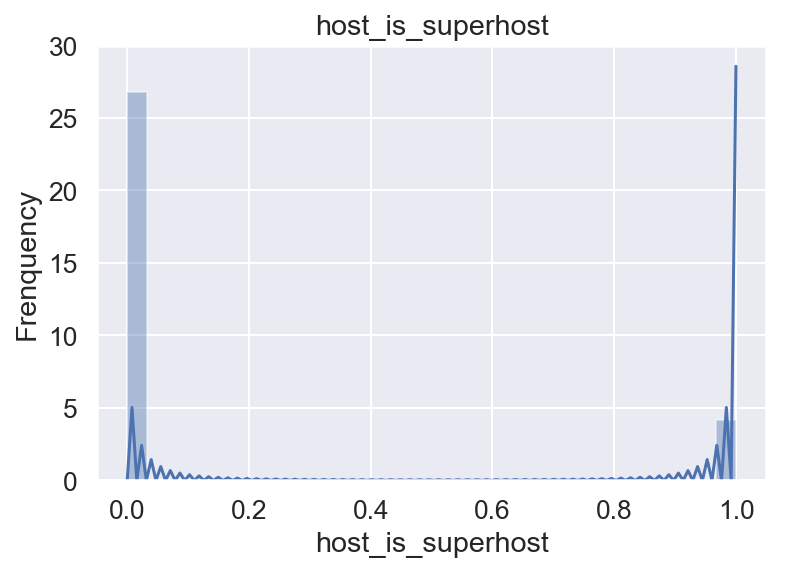

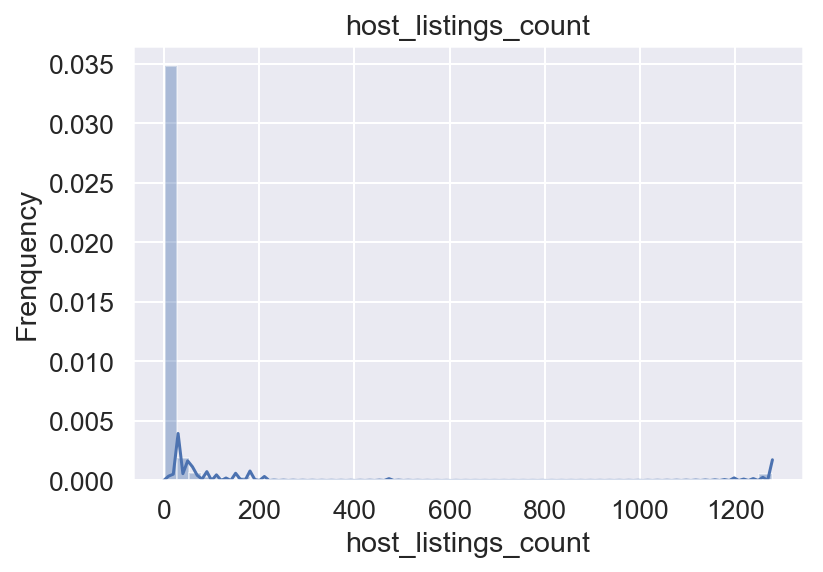

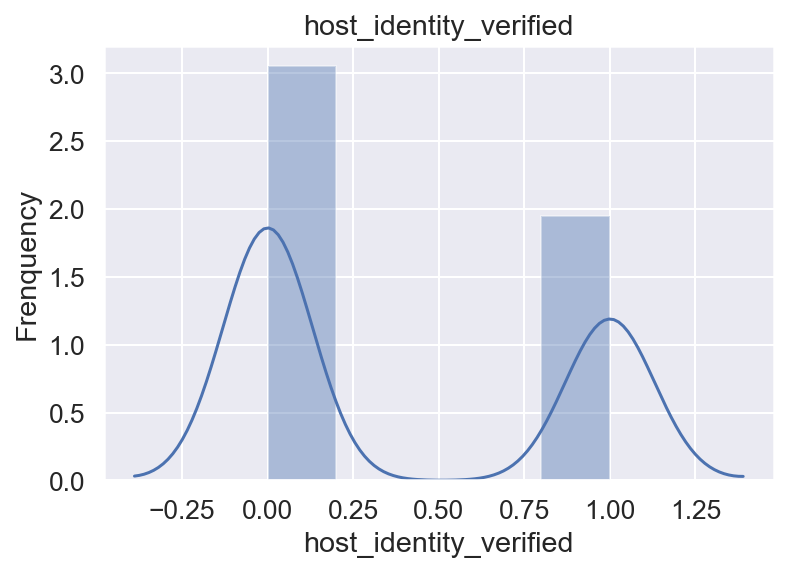

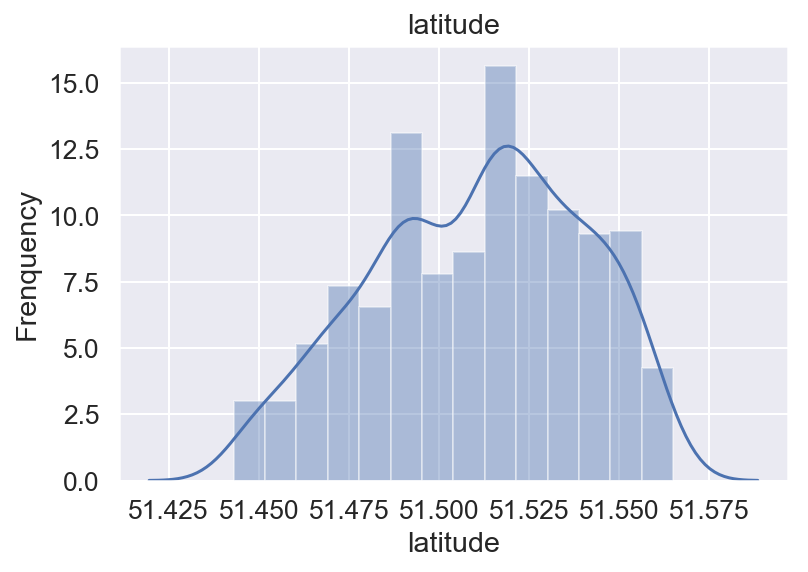

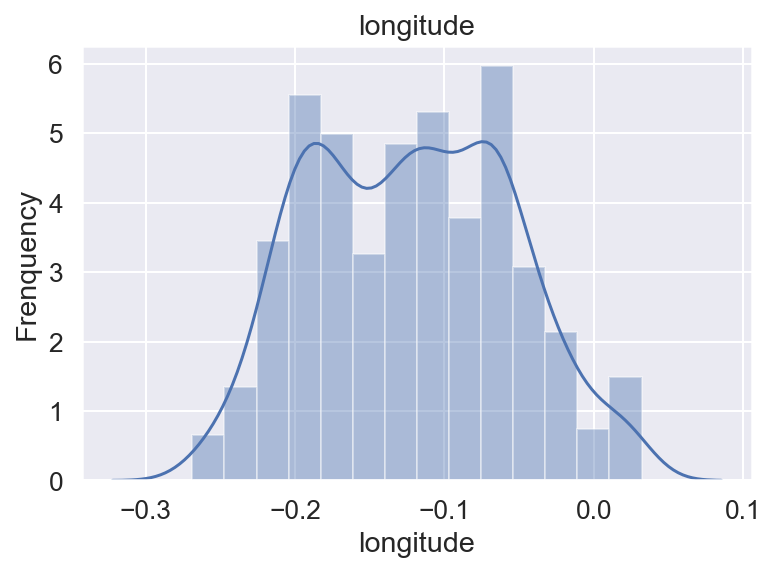

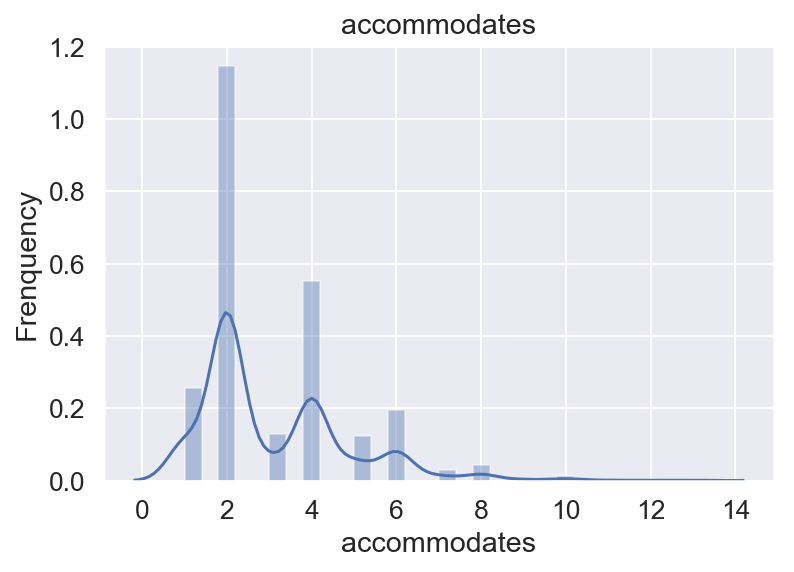

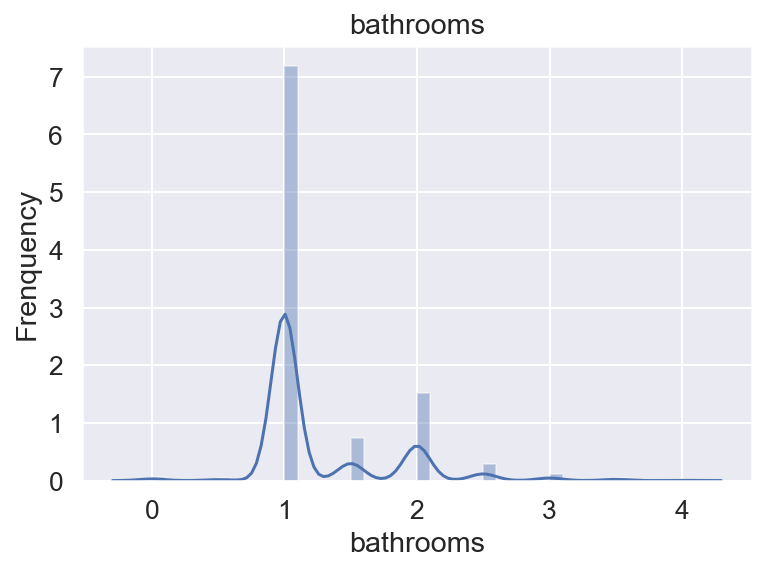

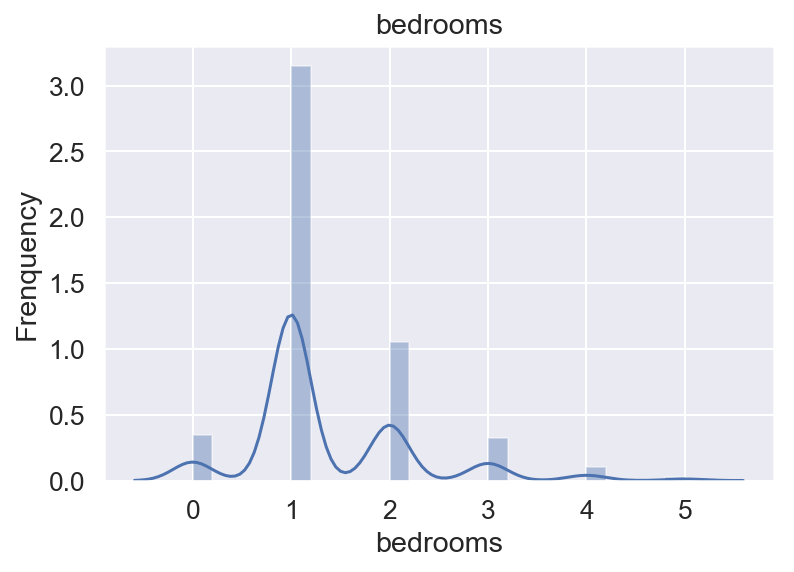

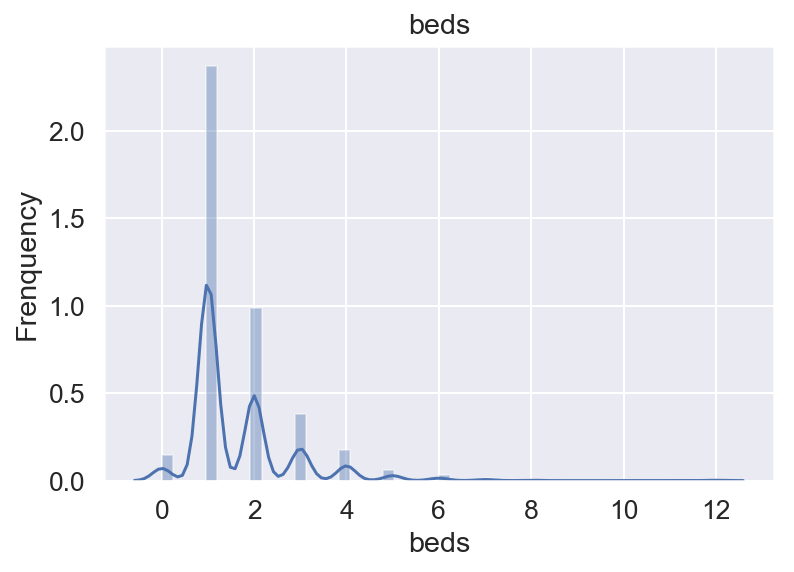

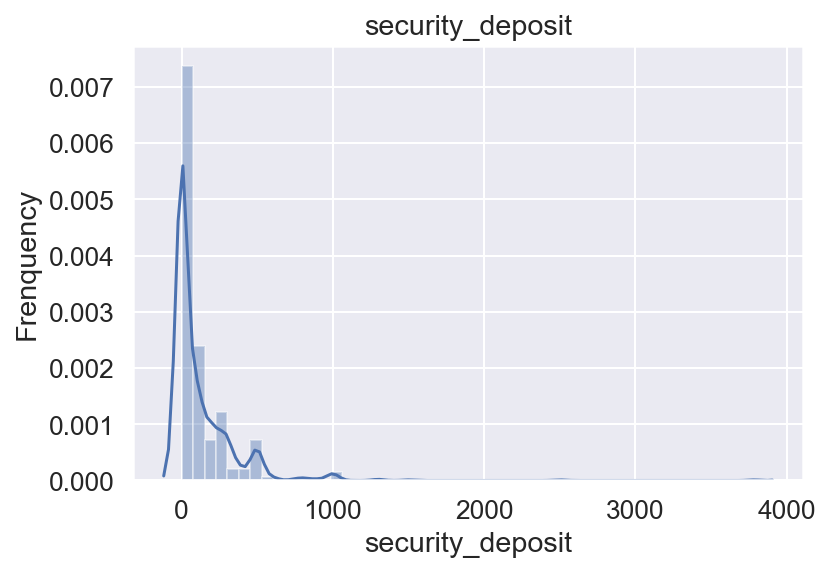

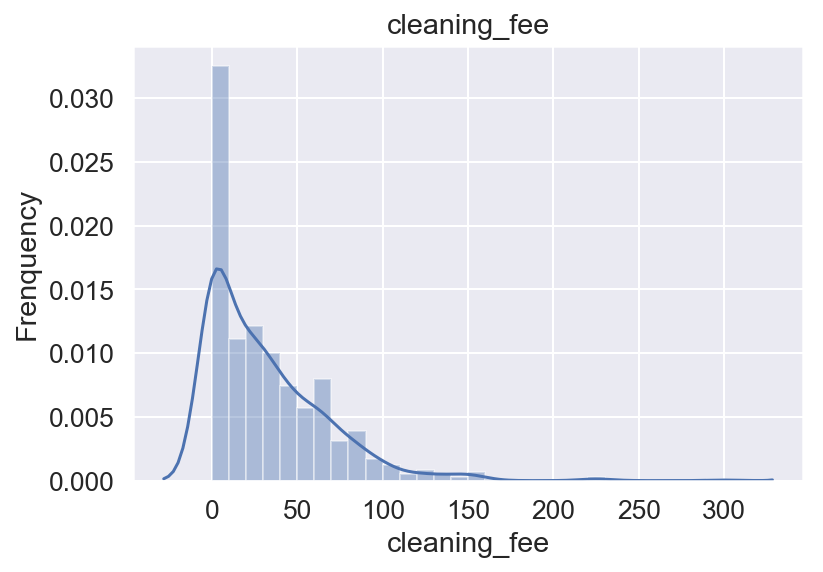

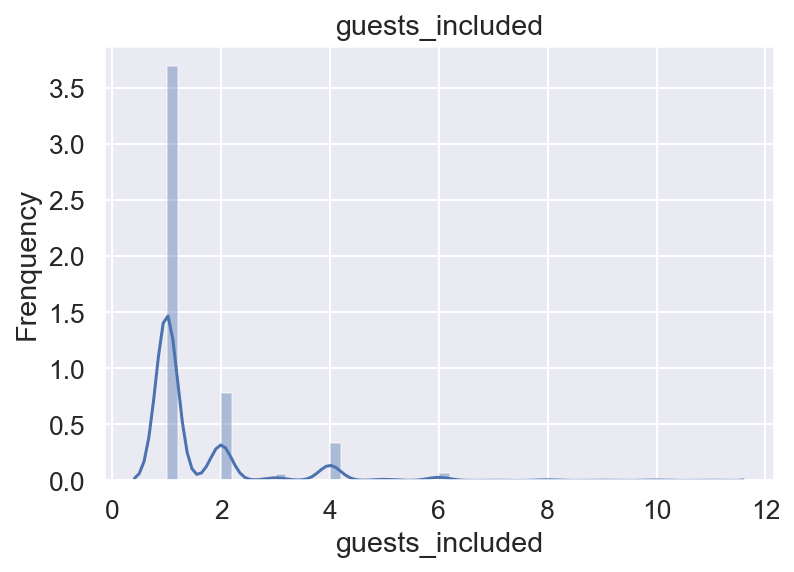

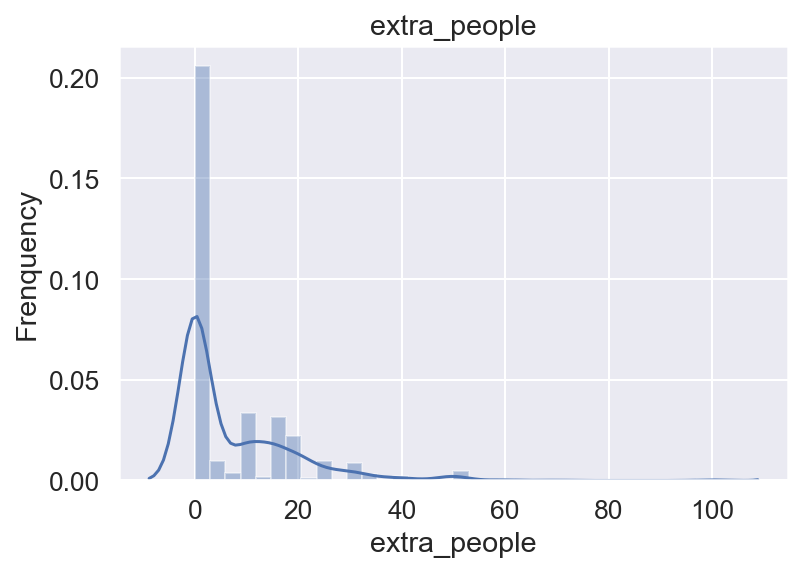

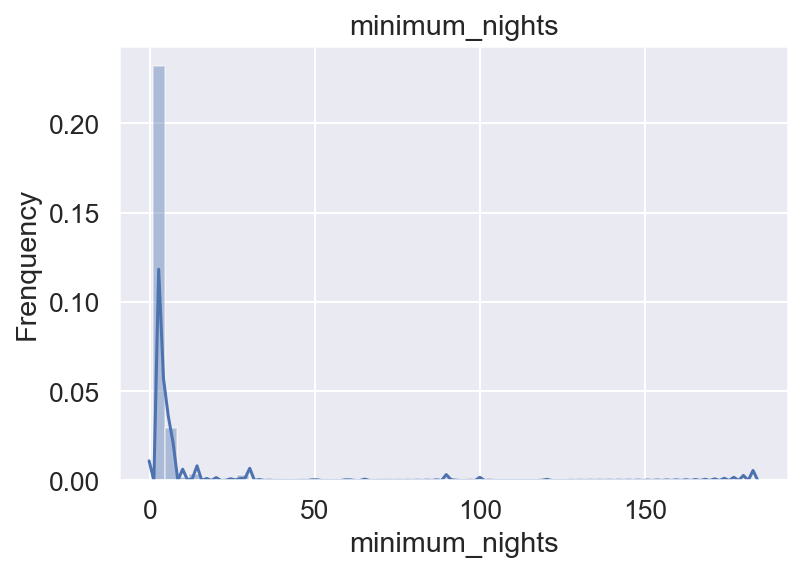

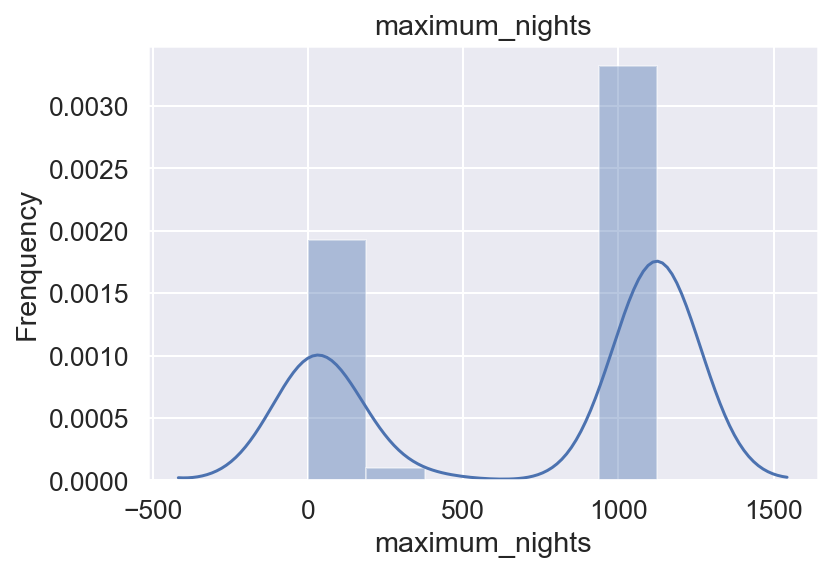

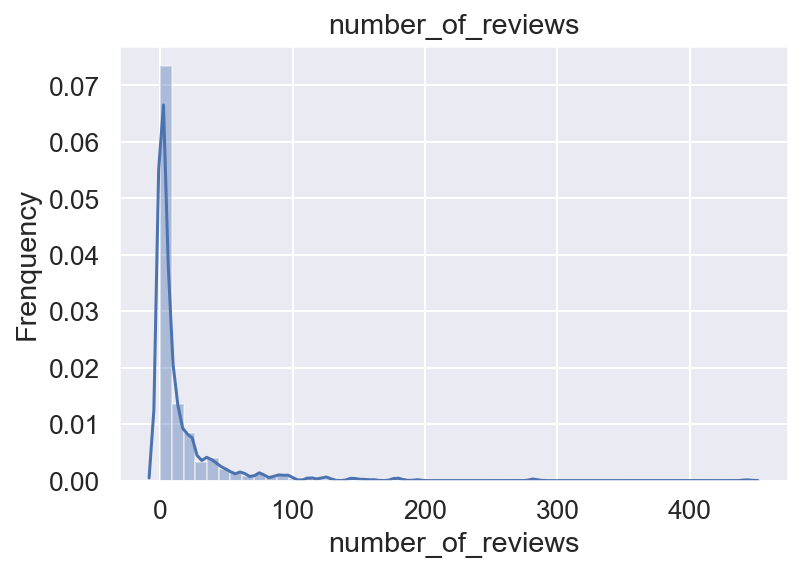

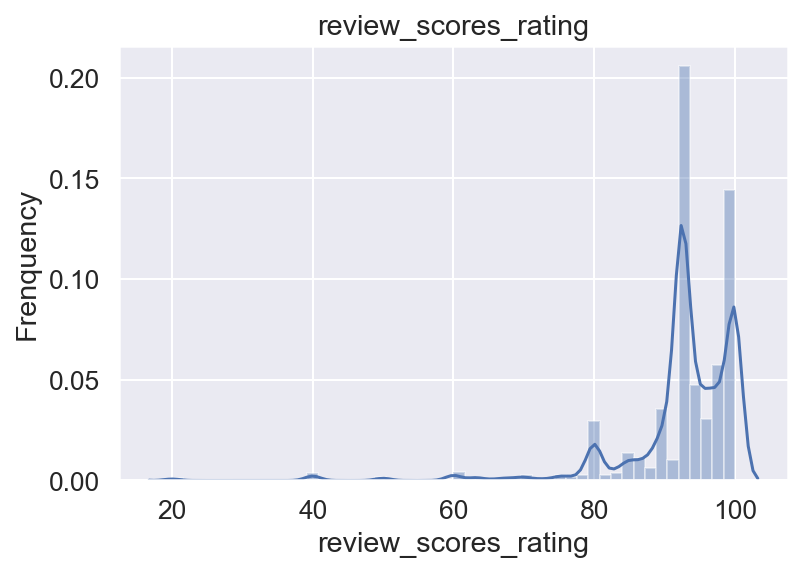

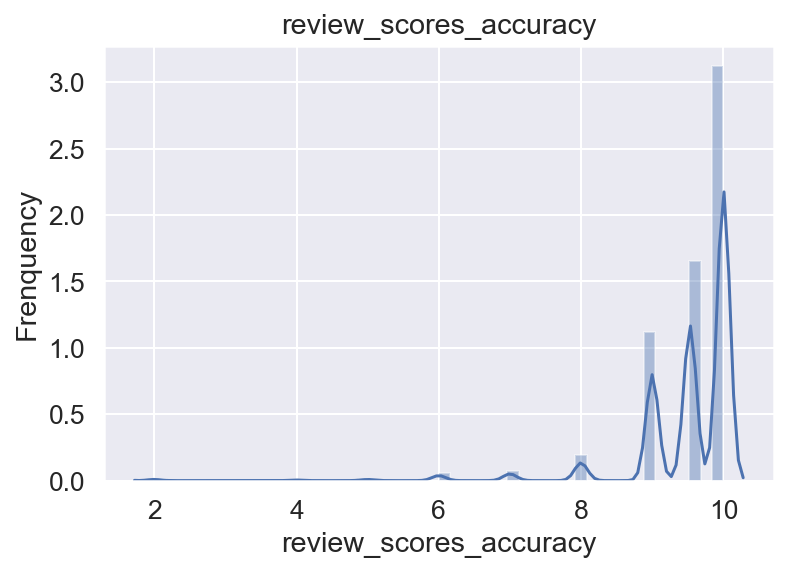

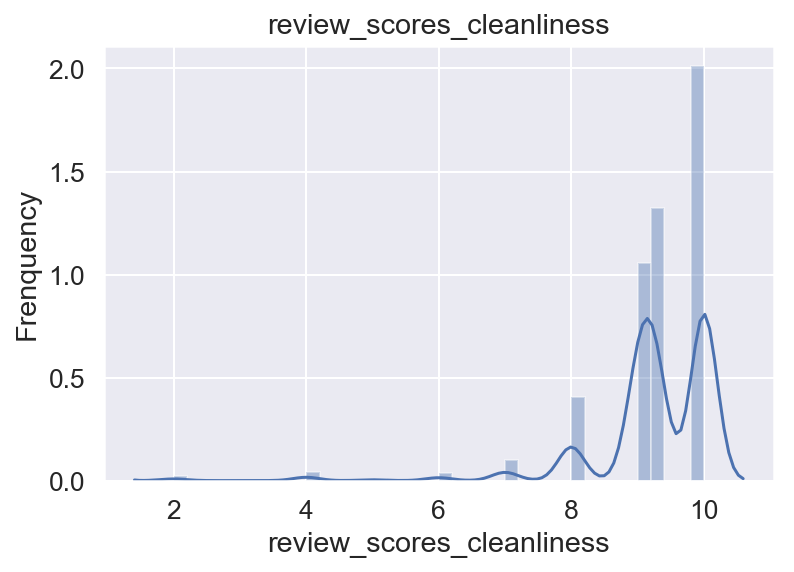

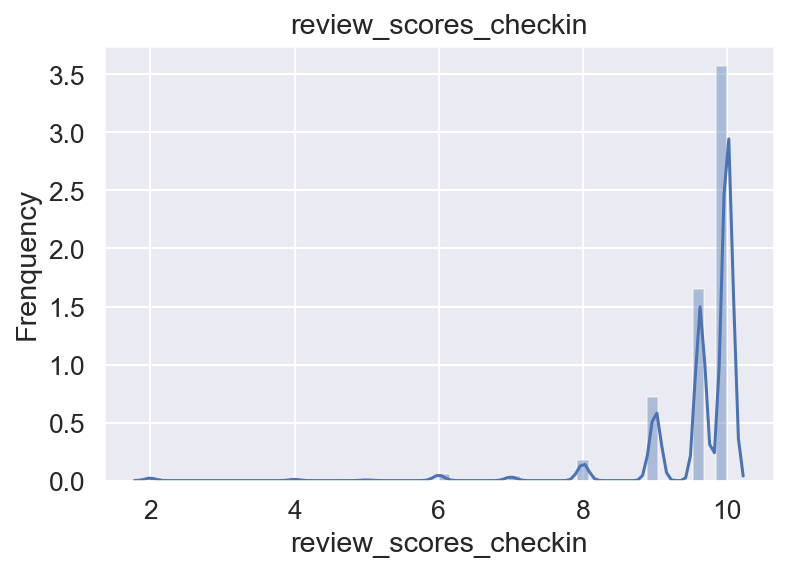

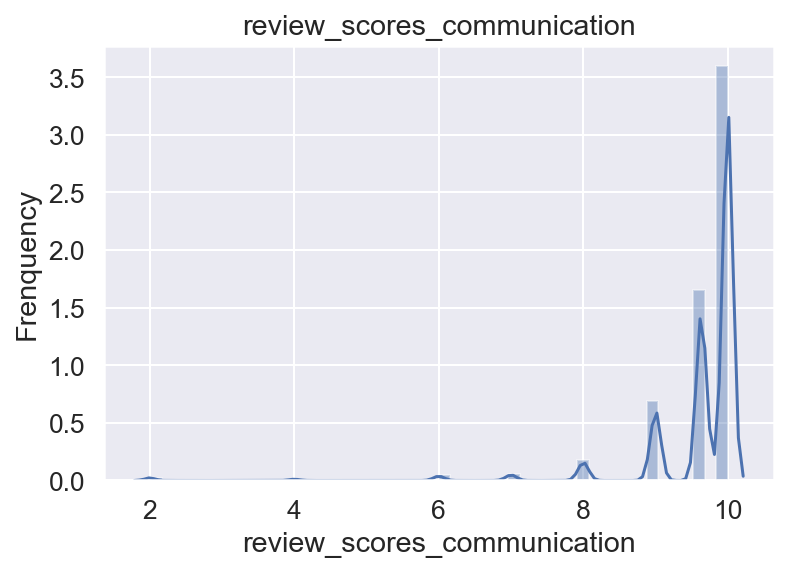

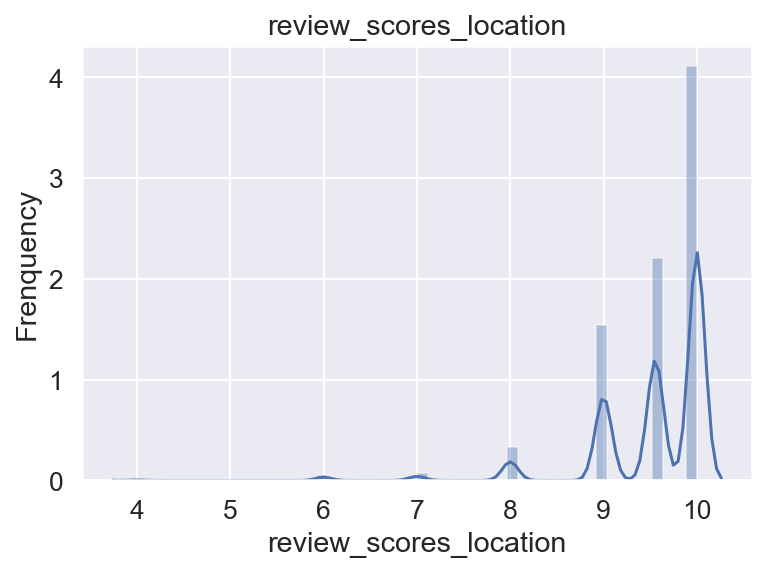

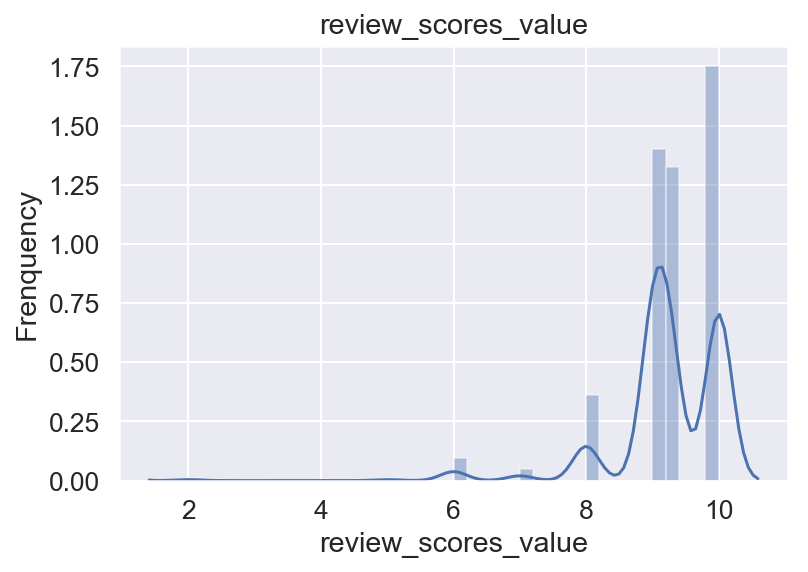

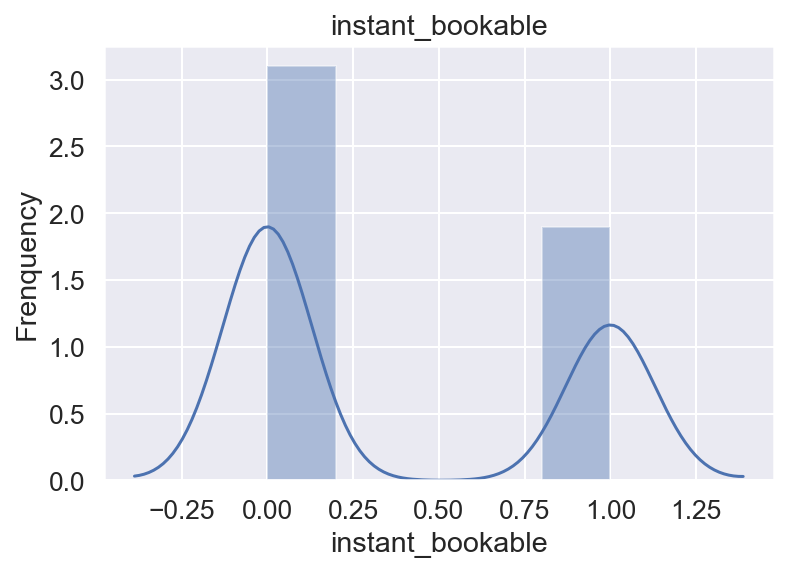

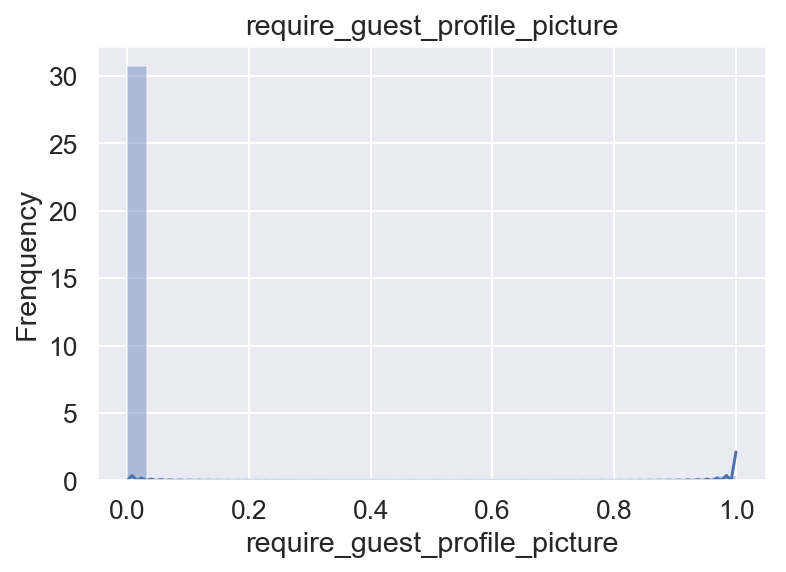

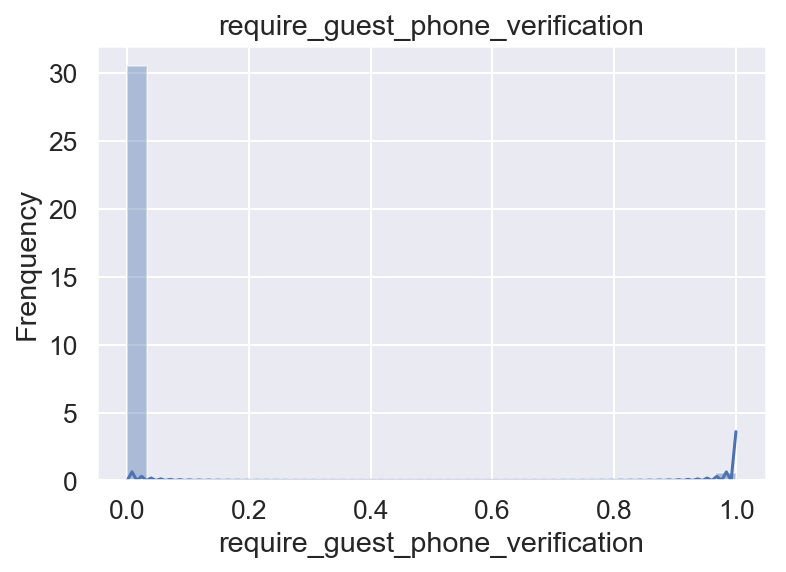

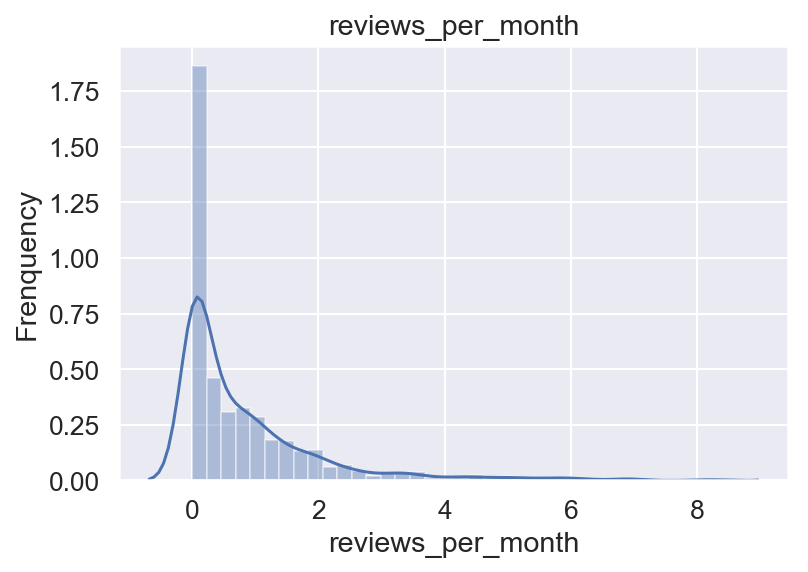

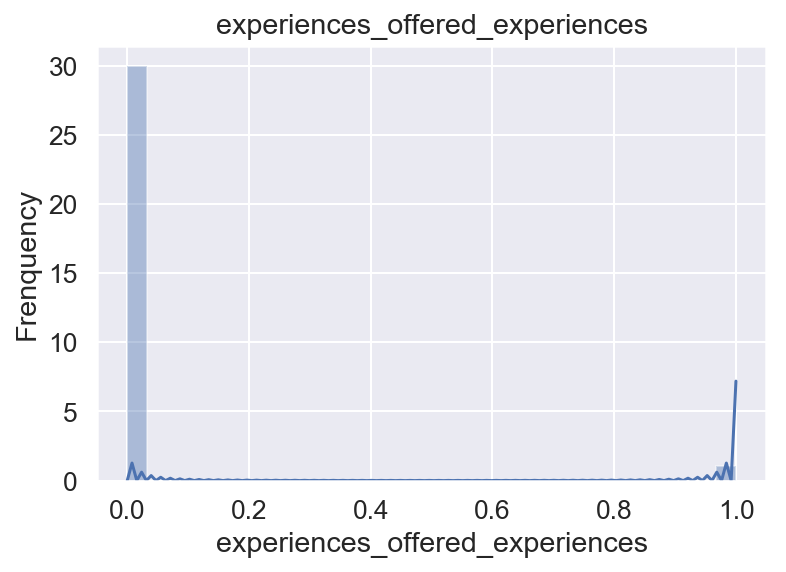

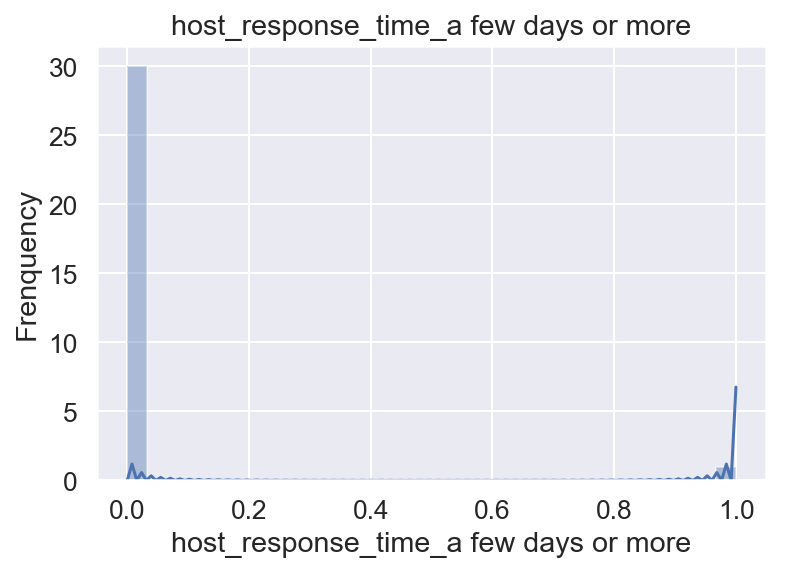

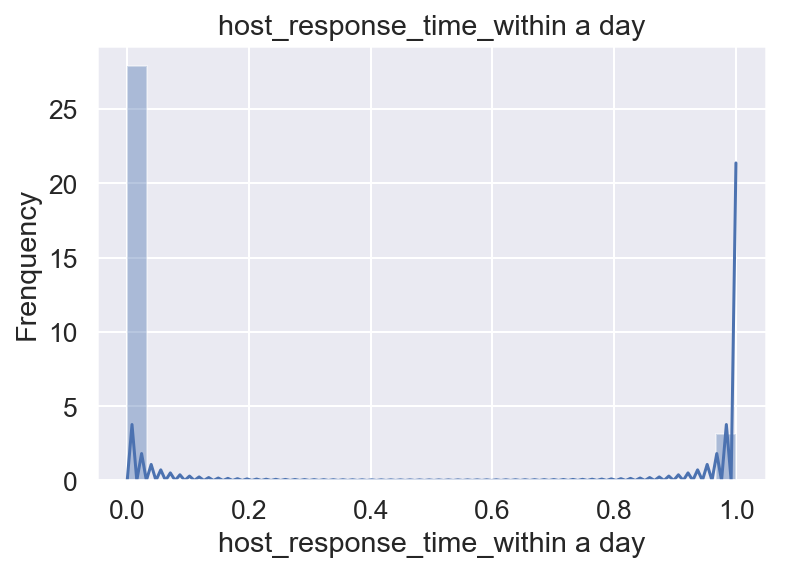

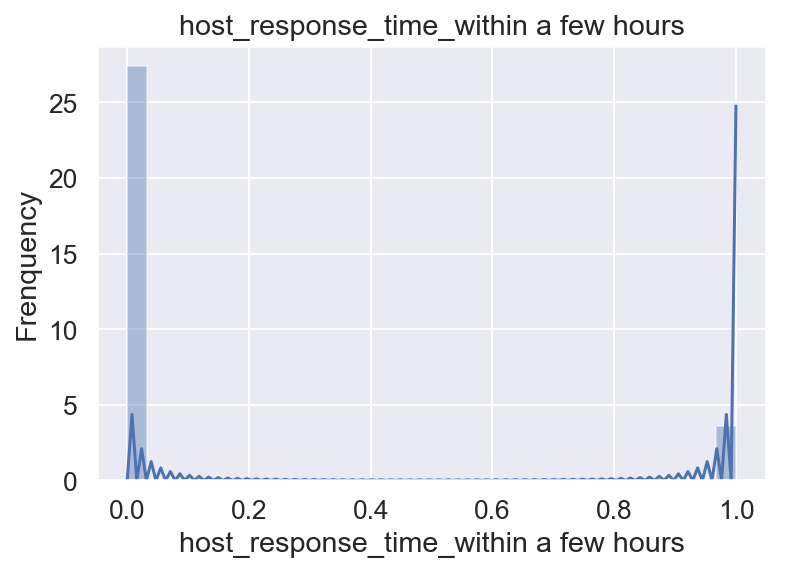

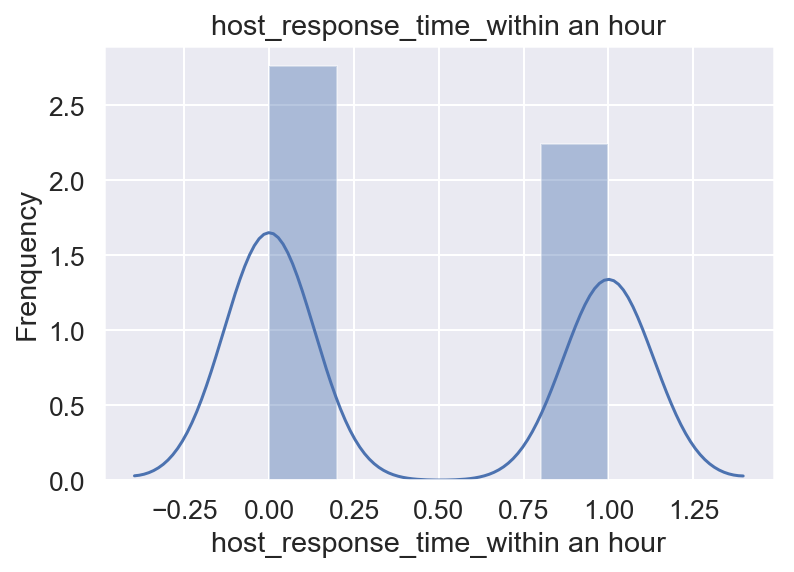

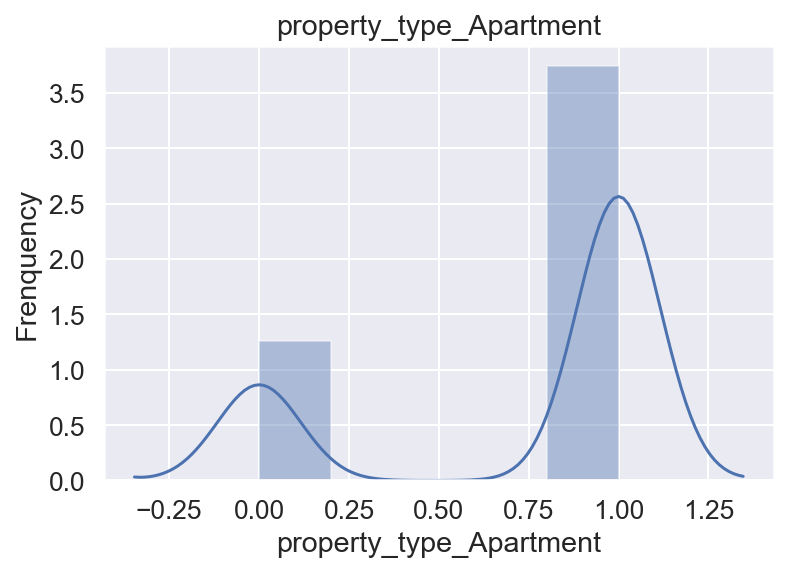

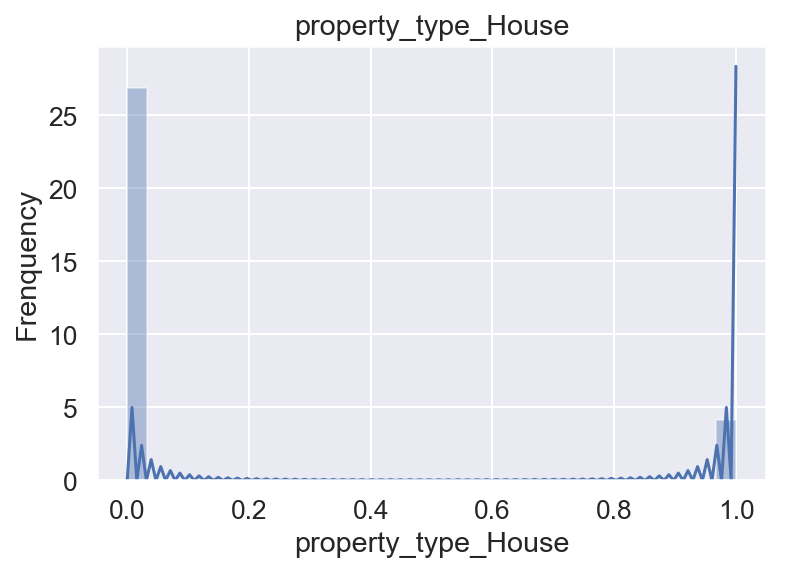

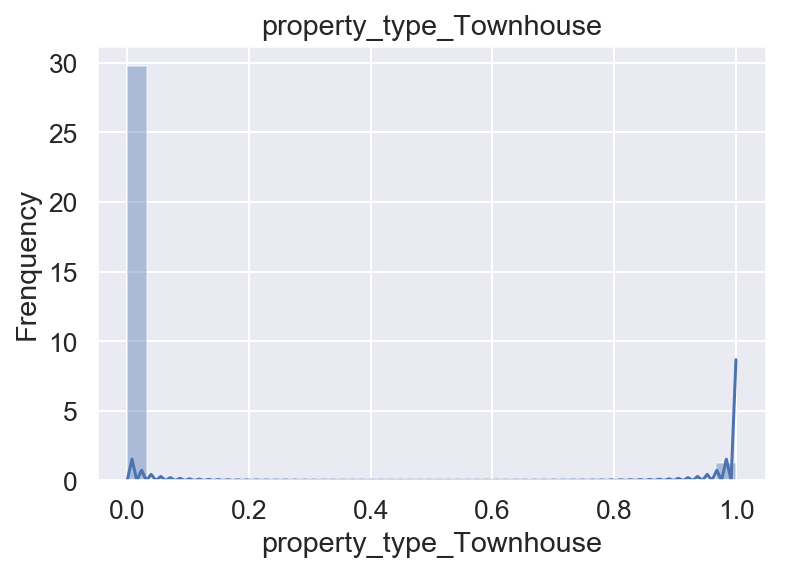

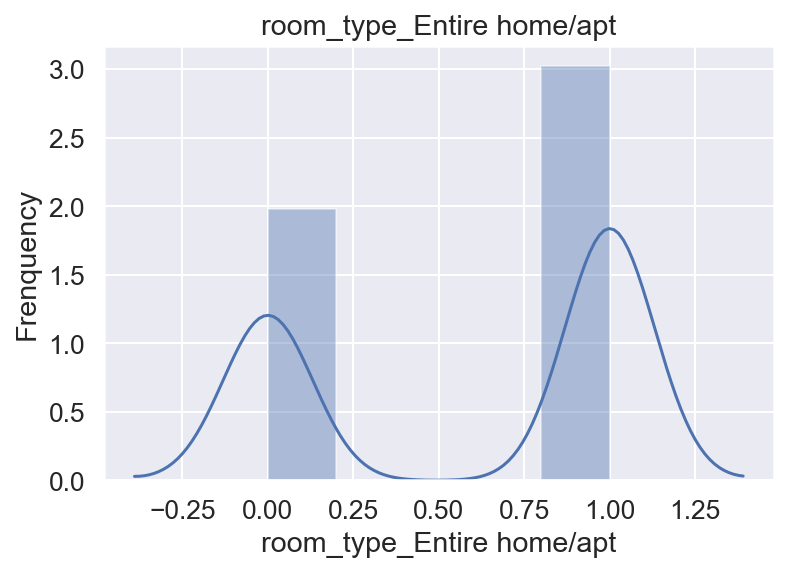

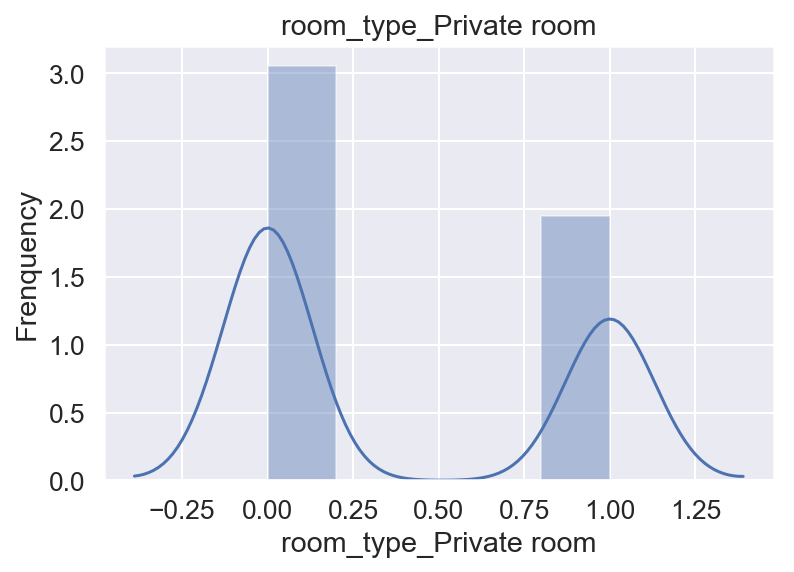

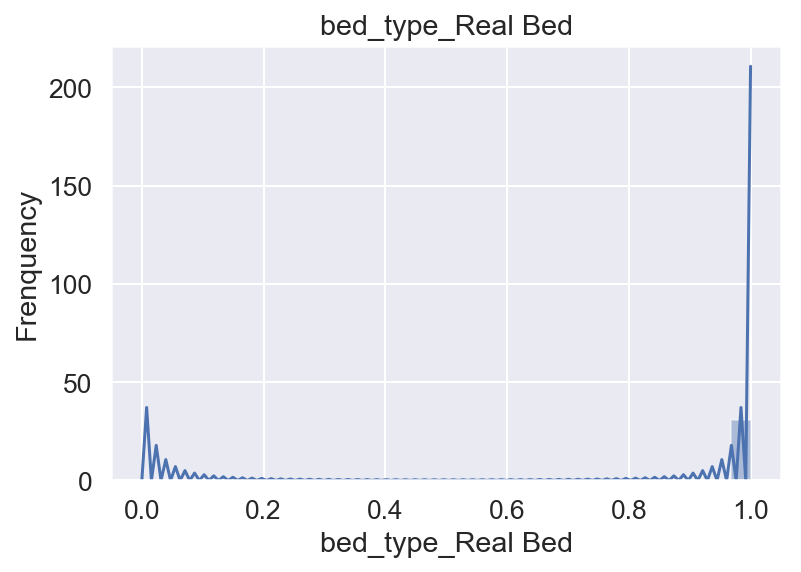

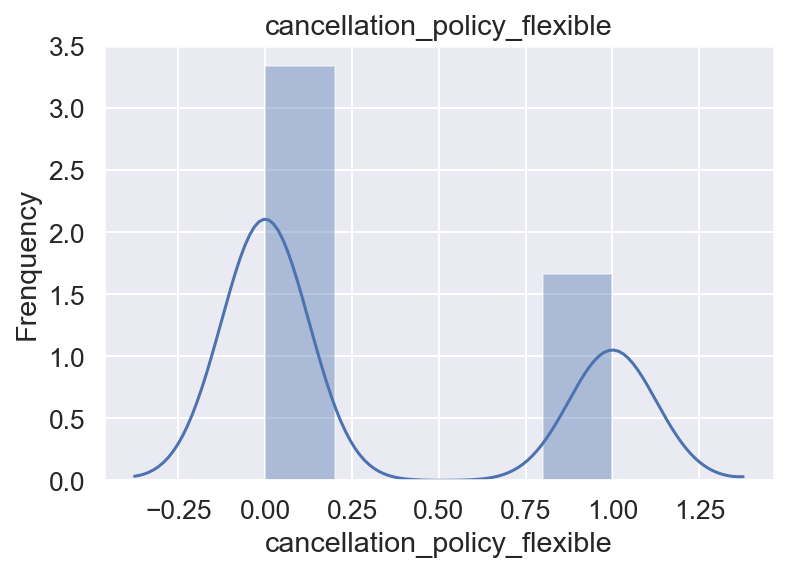

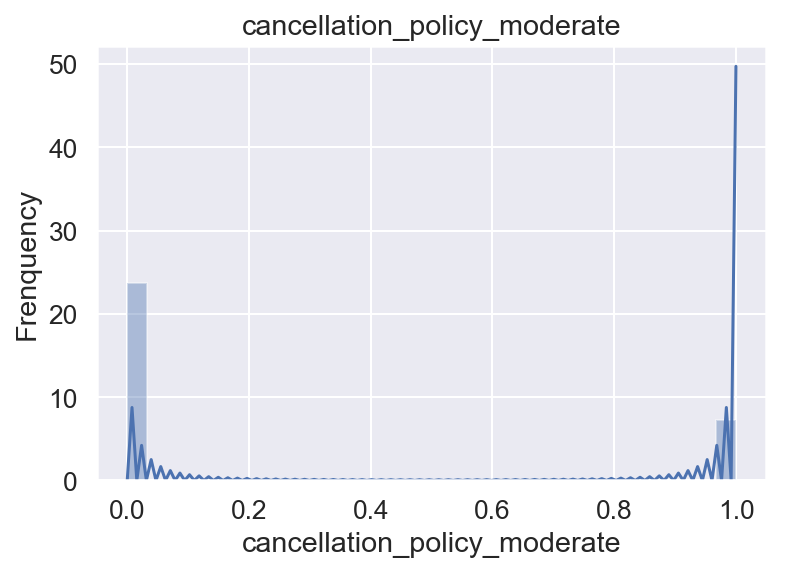

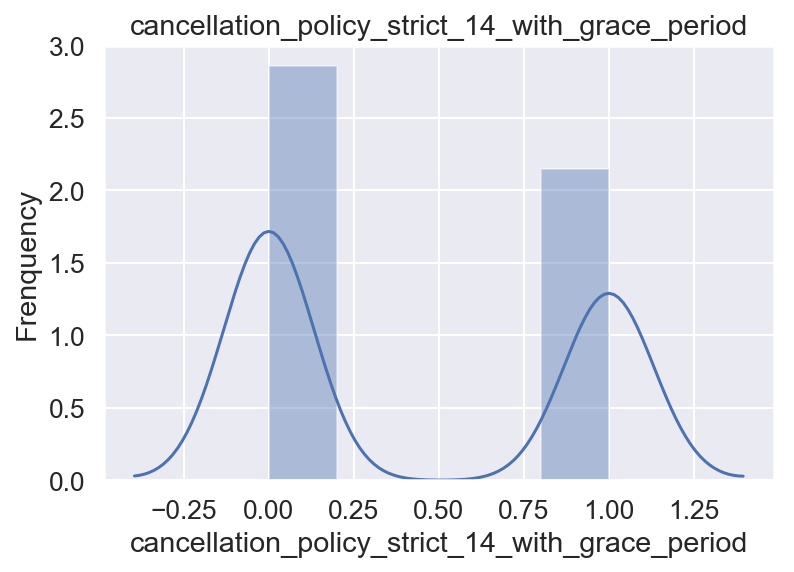

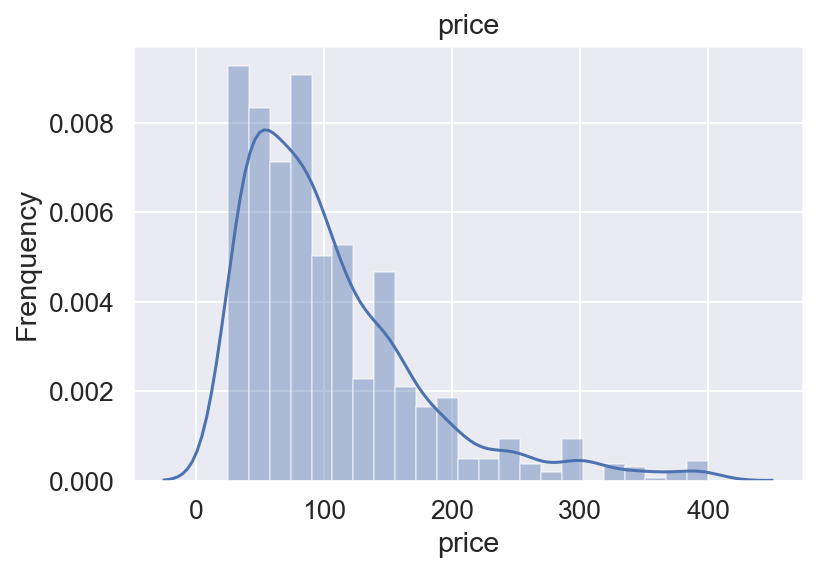

In [64]:
for i in train_clean:
    plt.figure()
    sns.distplot(train_clean[i])
    plt.xlabel(i)
    plt.ylabel('Frenquency')
    plt.title(i)


In [65]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 36 columns):
Id                                  1000 non-null int64
price                               1000 non-null int64
experiences_offered                 1000 non-null object
host_response_time                  698 non-null object
host_response_rate                  698 non-null float64
host_is_superhost                   1000 non-null object
host_listings_count                 1000 non-null int64
host_identity_verified              1000 non-null object
latitude                            1000 non-null float64
longitude                           1000 non-null float64
property_type                       1000 non-null object
room_type                           1000 non-null object
accommodates                        1000 non-null int64
bathrooms                           999 non-null float64
bedrooms                            999 non-null float64
beds                                999 no

In [66]:
Numerical_Variables = ["host_response_rate","host_listings_count","latitude","longitude","accommodates","bathrooms",
"bedrooms","beds","security_deposit","cleaning_fee","guests_included","extra_people","minimum_nights","maximum_nights",                      
"number_of_reviews", "review_scores_rating","review_scores_accuracy","review_scores_cleanliness","review_scores_checkin",             
"review_scores_communication","review_scores_location","review_scores_value","reviews_per_month"]

In [67]:
pd.DataFrame({"Column name": [x for x in corr_most_10 ],"Skew":[train_clean[x].skew() for x in corr_most_10]})

Column name      Skew
0                  accommodates  1.397247
1     room_type_Entire home/apt -0.425941
2        room_type_Private room  0.451729
3                          beds  2.358805
4                      bedrooms  1.406498
5                  cleaning_fee  1.862883
6                     bathrooms  1.696832
7               guests_included  3.320158
8              security_deposit  5.752068
9  cancellation_policy_flexible  0.709763

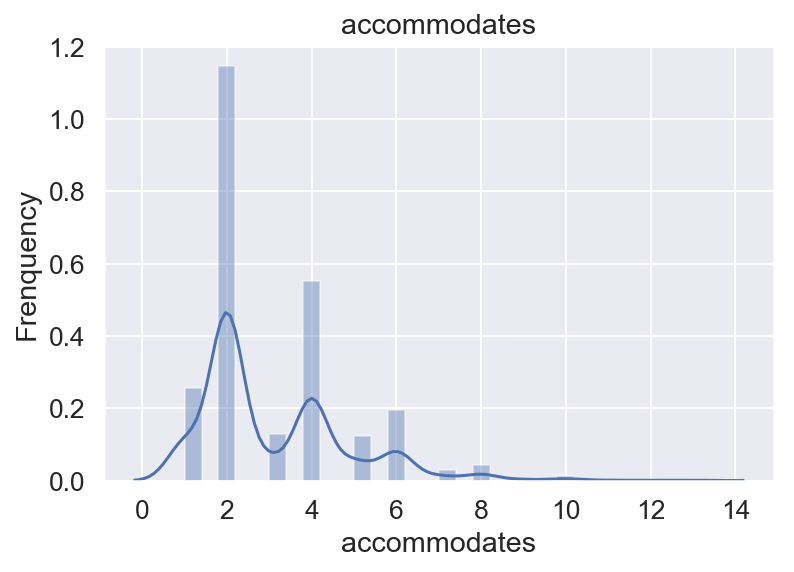

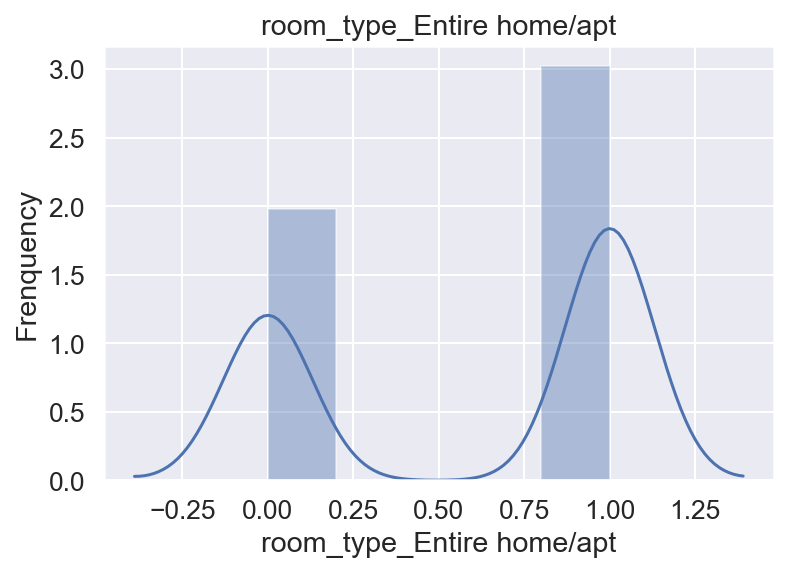

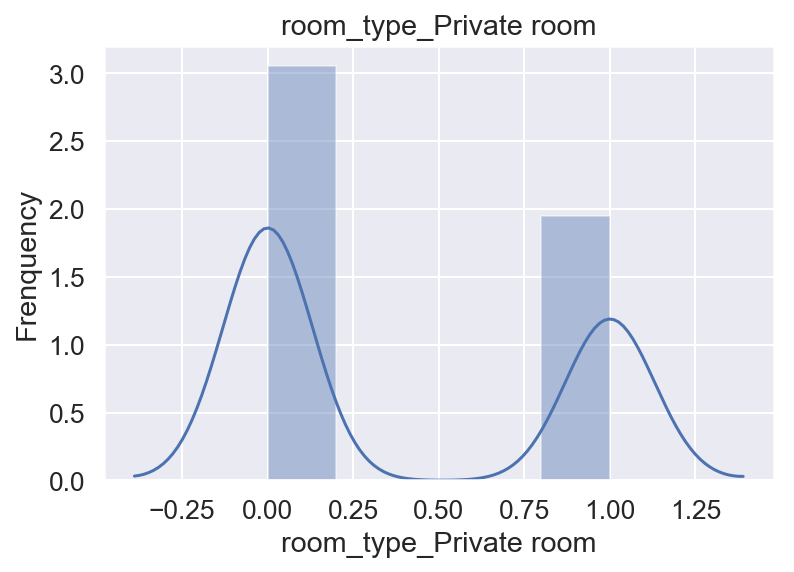

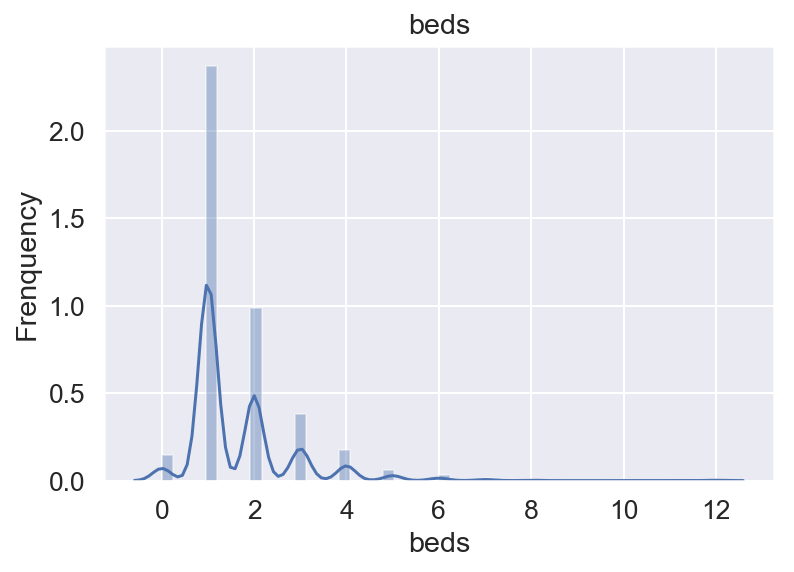

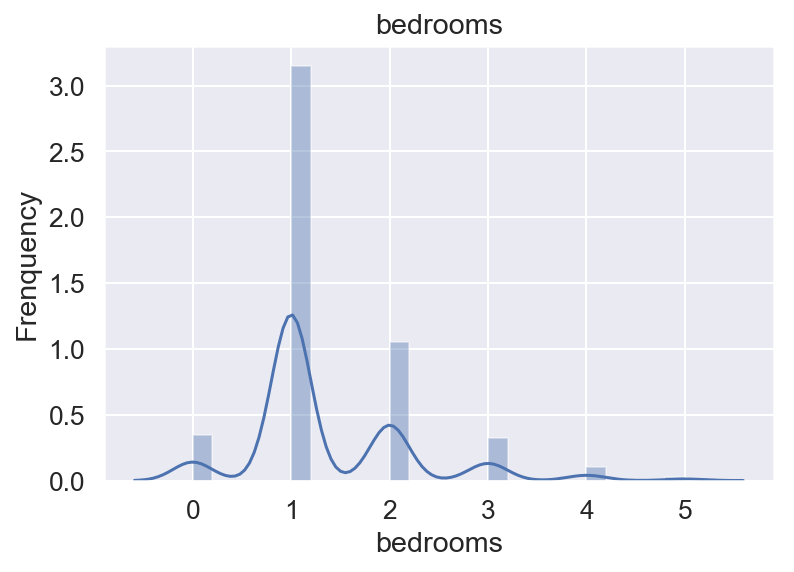

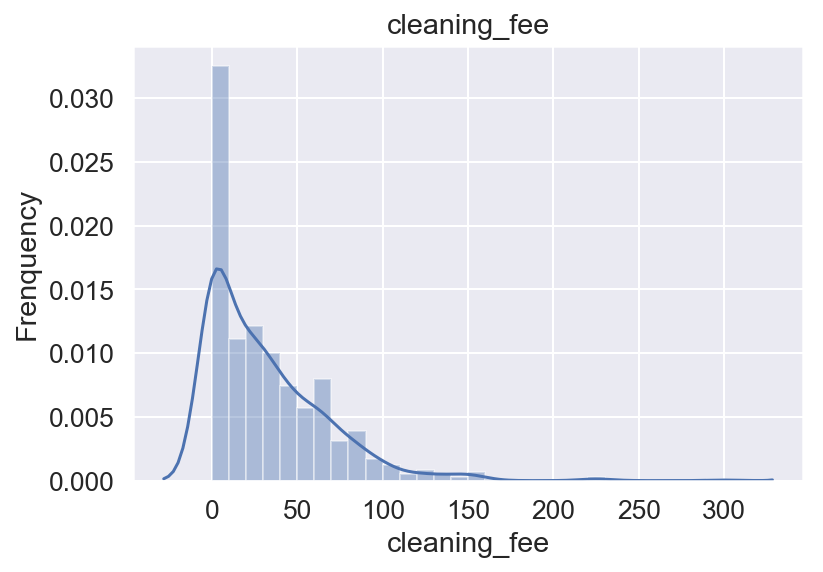

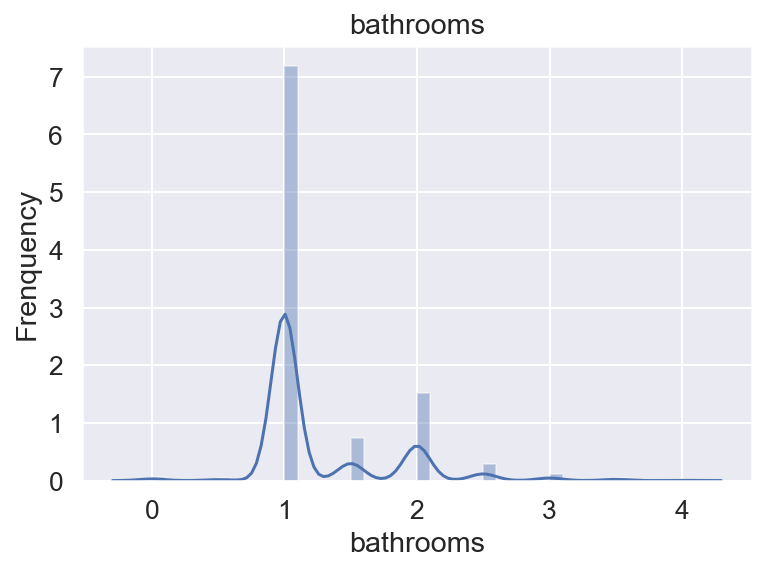

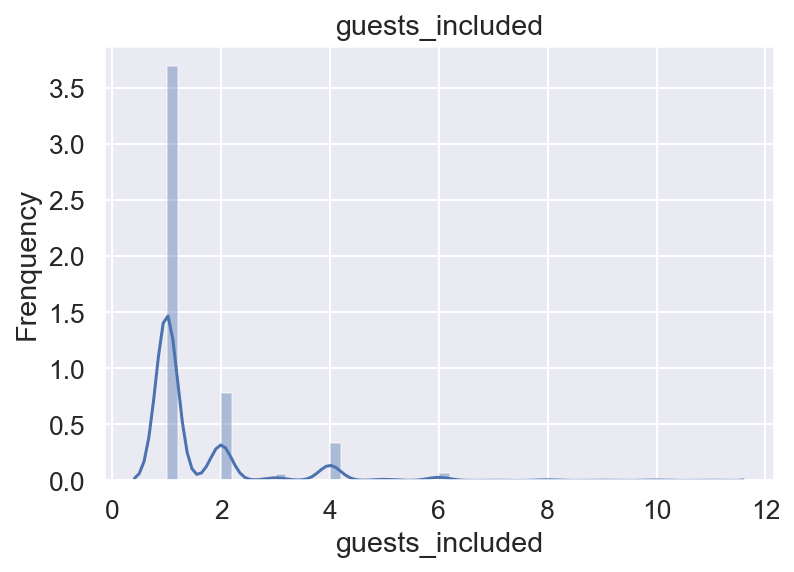

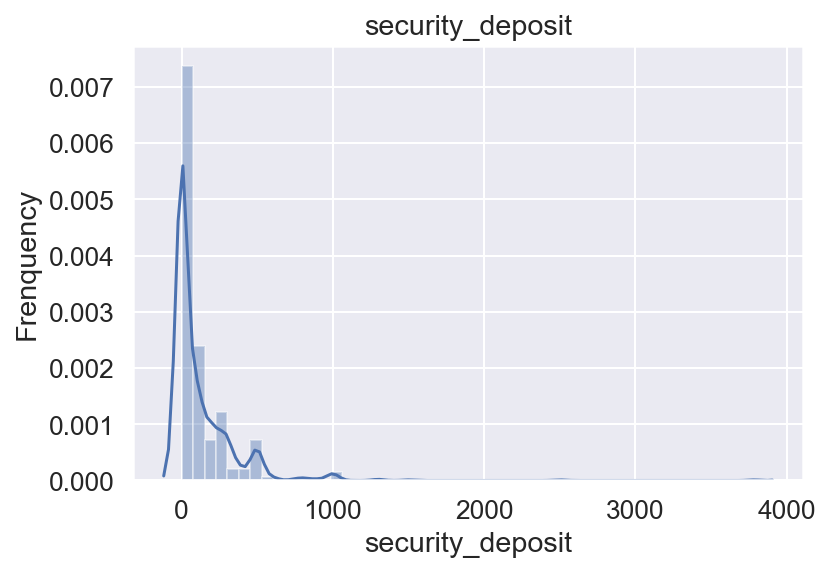

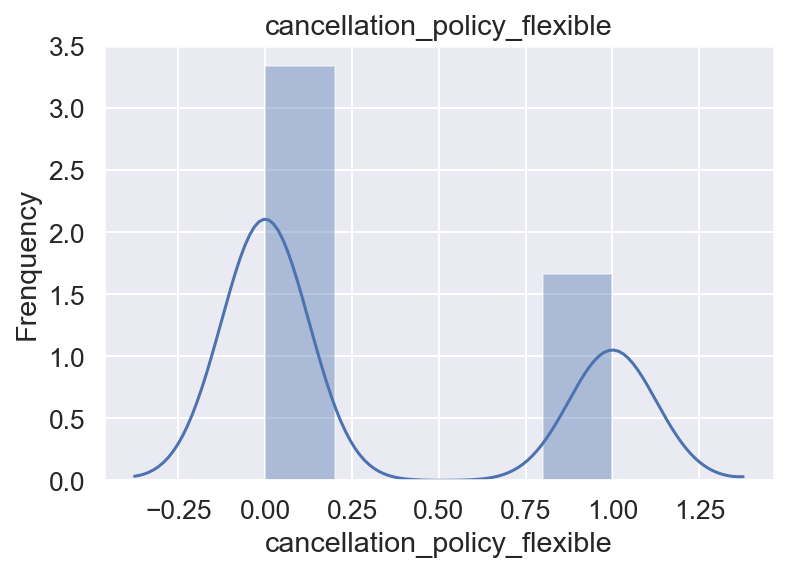

In [68]:
for i in corr_most_10:
    plt.figure()
    sns.distplot(train_clean[i])
    plt.xlabel(i)
    plt.ylabel('Frenquency')
    plt.title(i)


In [312]:
train_eng = train_clean.copy()


1.3972469984921403


0.1201989338342799

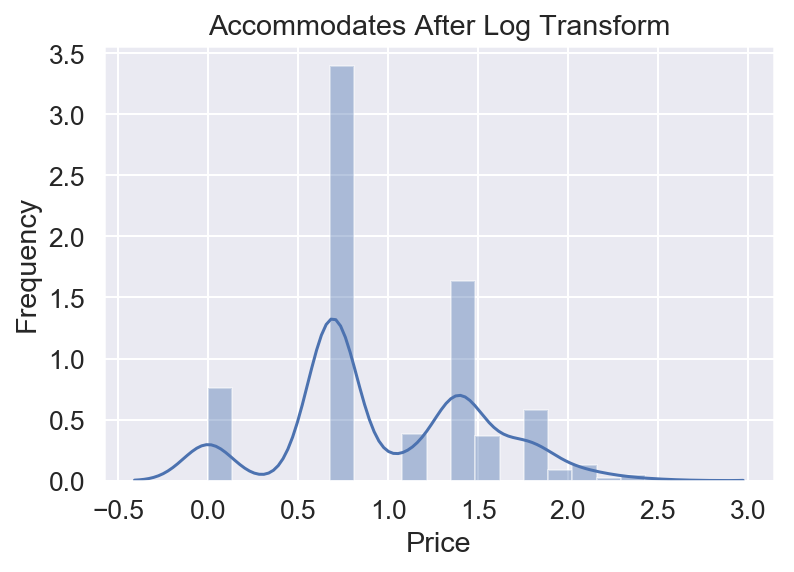

In [69]:
print(train_clean['accommodates'].skew())
sns.distplot(np.log(train_clean['accommodates']))
plt.xlabel('Price')
plt.ylabel ('Frequency')
plt.title('Accommodates After Log Transform')
np.log(train_clean['accommodates']).skew()

In [80]:
train_eng["accommodates"] = np.log(train_clean["accommodates"])

2.358804897966985


0.29629135900795345

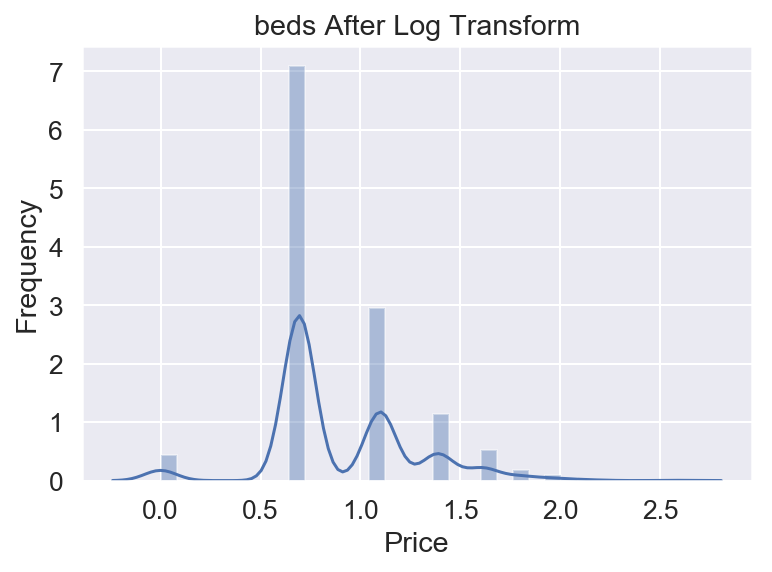

In [70]:
print(train_clean['beds'].skew())
sns.distplot(np.log1p(train_clean['beds']))
plt.xlabel('Price')
plt.ylabel ('Frequency')
plt.title('beds After Log Transform')
np.sqrt(train_clean['beds']).skew()

In [81]:
train_eng["beds"] = np.sqrt(train_clean["beds"])

1.4064980169220351


-0.03661135707911688

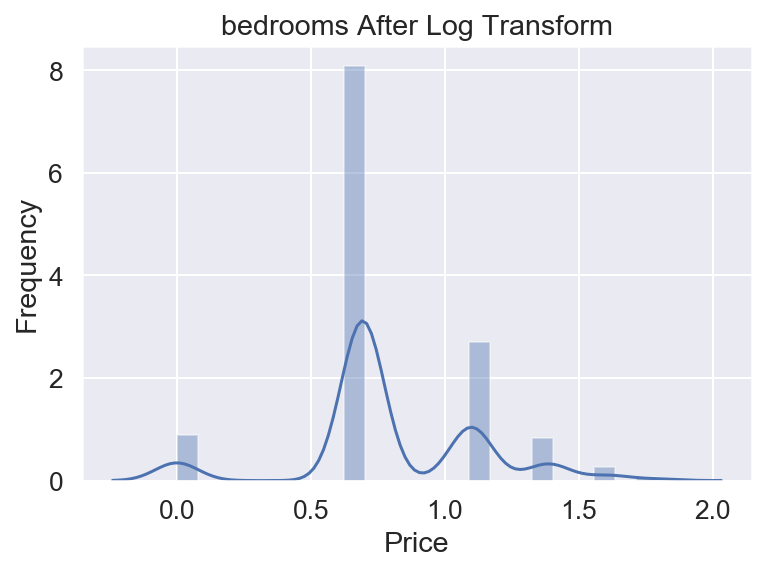

In [71]:
print(train_clean['bedrooms'].skew())
sns.distplot(np.log1p(train_clean['bedrooms']))
plt.xlabel('Price')
plt.ylabel ('Frequency')
plt.title('bedrooms After Log Transform')
np.log1p(train_clean['bedrooms']).skew()

In [82]:
train_eng["bedrooms"] = np.log1p(train_clean["bedrooms"])

1.86288267436427


0.1623754068374208

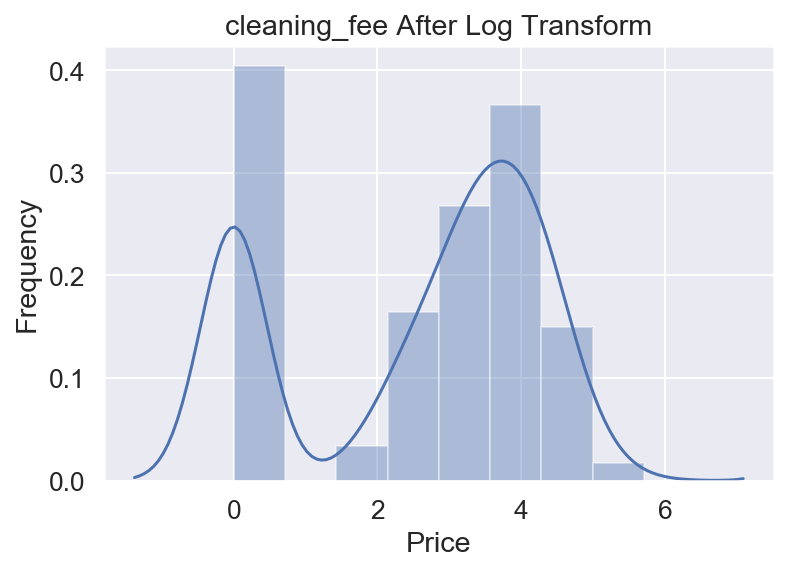

In [72]:
print(train_clean['cleaning_fee'].skew())
sns.distplot(np.log1p(train_clean['cleaning_fee']))
plt.xlabel('Price')
plt.ylabel ('Frequency')
plt.title('cleaning_fee After Log Transform')
np.sqrt(train_clean['cleaning_fee']).skew()

In [83]:
train_eng["cleaning_fee"] = np.sqrt(train_clean["cleaning_fee"])

1.696831909869311


0.3316894841476602

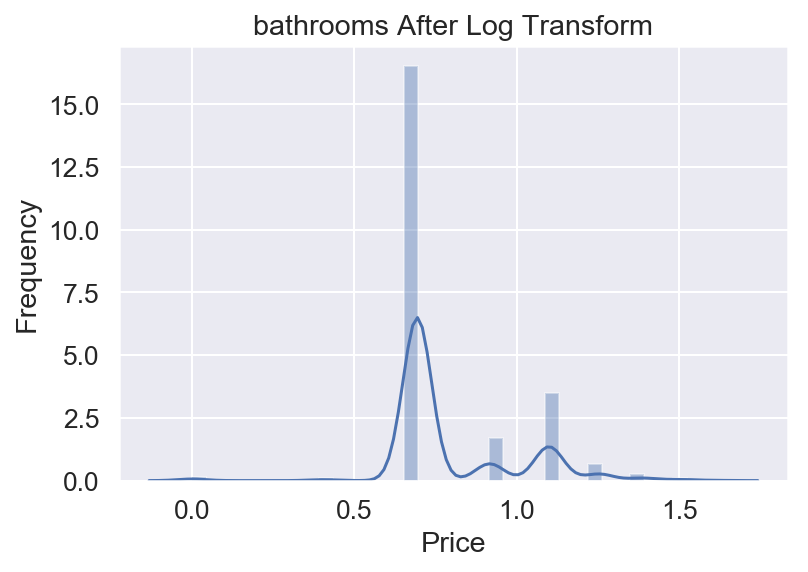

In [73]:
print(train_clean['bathrooms'].skew())
sns.distplot(np.log1p(train_clean['bathrooms']))
plt.xlabel('Price')
plt.ylabel ('Frequency')
plt.title('bathrooms After Log Transform')
np.sqrt(train_clean['bathrooms']).skew()

In [84]:
train_eng["bathrooms"] = np.sqrt(train_clean["bathrooms"])

3.320157575839661


2.0895590791569876

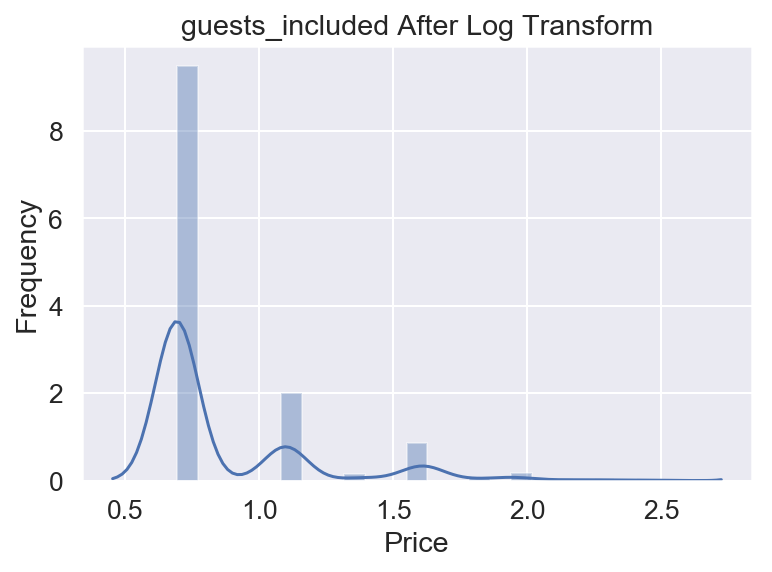

In [74]:
print(train_clean['guests_included'].skew())
sns.distplot(np.log1p(train_clean['guests_included']))
plt.xlabel('Price')
plt.ylabel ('Frequency')
plt.title('guests_included After Log Transform')
np.log1p(train_clean['guests_included']).skew()

In [ ]:
train_eng["guests_included"] = np.sqrt(train_clean["guests_included"])

5.752067631415604


0.3126218087509391

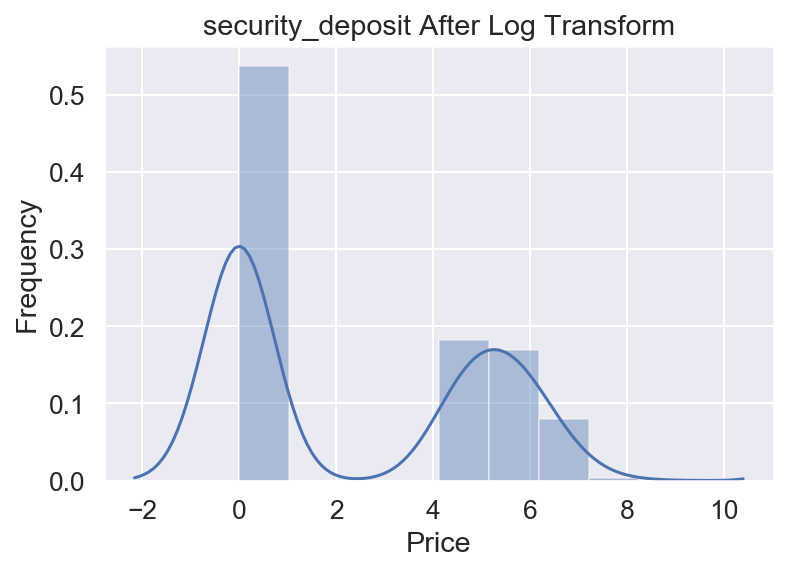

In [75]:
print(train_clean['security_deposit'].skew())
sns.distplot(np.log1p(train_clean['security_deposit']))
plt.xlabel('Price')
plt.ylabel ('Frequency')
plt.title('security_deposit After Log Transform')
np.log1p(train_clean['security_deposit']).skew()

In [93]:
train_eng["security_deposit"] = np.log1p(train_clean["security_deposit"])

1.6454669493901388

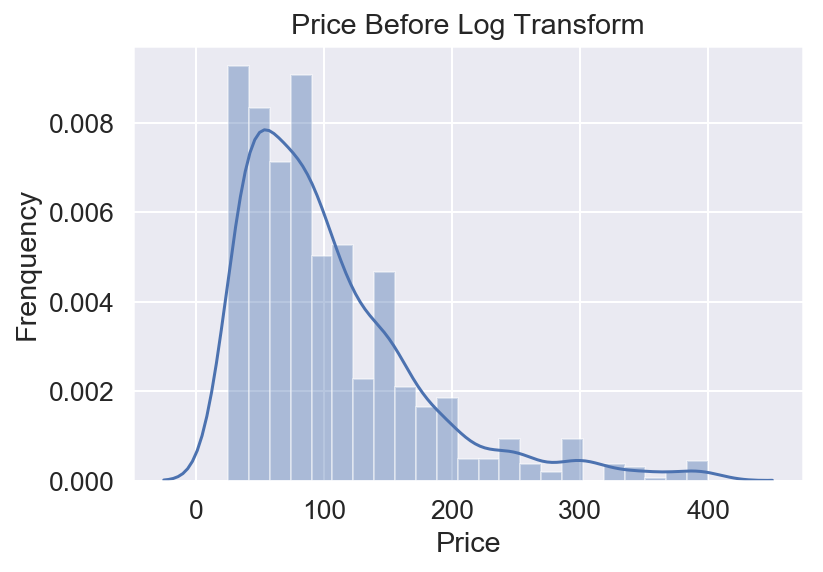

In [96]:
sns.distplot(train_clean['price'])
plt.xlabel('Price')
plt.ylabel('Frenquency')
plt.title('Price Before Log Transform')
train_clean['price'].skew()

0.14476973309661553

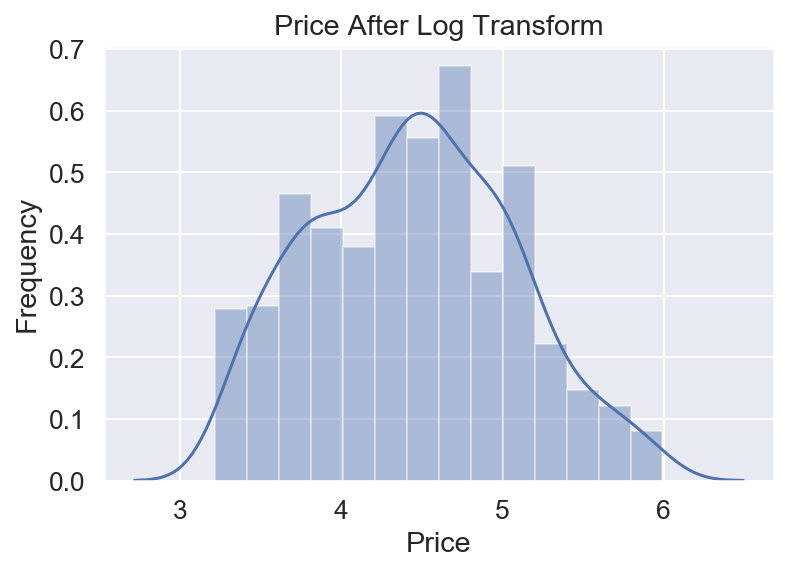

In [97]:
sns.distplot(np.log(train_clean['price']))
plt.xlabel('Price')
plt.ylabel ('Frequency')
plt.title('Price After Log Transform')
np.log(train_clean['price']).skew()

In [314]:
train_eng["price"] = np.log(train_clean["price"])

In [316]:
test_eng = test_clean.copy()
test_eng["accommodates"] = np.log(test_clean["accommodates"])
test_eng["beds"] = np.sqrt(test_clean["beds"])
test_eng["bedrooms"] = np.log1p(test_clean["bedrooms"])
test_eng["cleaning_fee"] = np.sqrt(test_clean["cleaning_fee"])
test_eng["bathrooms"] = np.sqrt(test_clean["bathrooms"])
test_eng["guests_included"] = np.log1p(test_clean["guests_included"])


## Model 

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score,  mean_absolute_error

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNetCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
import xgboost as xgb
import lightgbm as lgb
from mlxtend.regressor import StackingCVRegressor

In [114]:
response='price'
predictors=list(train_eng.columns.values[:-1])

# Randomly split indexes
index_train, index_test  = train_test_split(np.array(train_eng.index), train_size=0.8, random_state=0)

# Write training and test sets 
train = train_eng.loc[index_train,:].copy()
test =  train_eng.loc[index_test,:].copy()

# # Write training and test response vectors
y_train = train[response]
y_test = test[response]


# Write training and test design matrices
X_train = train[predictors].copy()
X_train_10 = train[corr_most_10].copy()
X_test = test[predictors].copy()
X_test_10 = test[corr_most_10].copy()

def rmse(y_pred,y_test):
    return np.sqrt(mean_squared_error(y_pred, y_test))


## OLS

In [200]:
ols = LinearRegression(fit_intercept = True)
reg = ols.fit(X_train, y_train)
print(reg.coef_)
print(reg.intercept_)

[ 1.27107910e-01  2.54436760e-03  2.21415071e-04 -4.96226113e-02
 -7.11203348e-01 -6.12661646e-01  3.12536481e-01  2.50513899e-01
  2.21814786e-01  3.71200760e-03  4.76512812e-03  1.35376158e-03
  4.80406871e-03  3.70141592e-05 -2.40565400e-03  1.02123914e-04
 -6.48773990e-04 -1.57032727e-03 -2.10525593e-02  5.59146138e-02
  1.60101980e-02 -2.78494639e-02  9.36469045e-02 -3.40599666e-02
 -4.85274804e-02 -2.31392949e-01 -2.31356463e-03 -3.51506795e-02
  1.23502651e-01  9.48677979e-02 -2.98494643e-02 -6.31694676e-02
  4.87359381e-03 -1.76207269e-01 -2.80605239e-01 -2.08309718e-01
  5.16800306e-01 -6.45981431e-03  2.74569907e-01 -5.44876756e-01
 -5.78967055e-01 -5.16496863e-01]
39.64004968372558


In [202]:
y_pred_ols = reg.predict(X_test)
RMSE_ols1 = rmse(np.exp(y_pred_ols), y_test)
print("RMSE",RMSE_ols1)
r2_ols1 = r2_score(y_test,y_pred_ols)
print("R2",r2_ols1)

RMSE 102.57686023250936
R2 0.6409890728675858


In [164]:
ols2 = LinearRegression(fit_intercept = True)
reg2 = ols2.fit(X_train_10, y_train)
print(reg.coef_)
print(reg.intercept_)

[ 0.31871069  0.5238345  -0.02817074  0.01213777  0.11384099  0.01372788
  0.30334617  0.00884438  0.00656414  0.00125765]
3.297011313845935


In [195]:
y_pred_ols = reg2.predict(X_test_10)
RMSE_ols2 = rmse(np.exp(y_pred_ols), y_test)
print("RMSE",RMSE_ols2)
r2_ols2 = r2_score(y_test,y_pred_ols)
print("R2",r2_ols2)

RMSE 98.12013986520823
R2 0.6338779485919681


# Regularised Linear Models


# Lasso

In [207]:
alpha = list(np.logspace(-15, 15, 151, base=2))

lasso = Pipeline((
    ('scaler', StandardScaler()),
    ('estimator', LassoCV(cv=5,random_state=0,alphas = alpha)),
))

lasso.fit(X_train, y_train)


Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('estimator', LassoCV(alphas=[3.0517578125e-05, 3.505549179068098e-05, 4.026818575356734e-05, 4.625599873383782e-05, 5.313418965430448e-05, 6.103515625e-05, 7.011098358136196e-05, 8.053637150713468e-05, 9.251199746767564e-0...e=False,
    precompute='auto', random_state=0, selection='cyclic', tol=0.0001,
    verbose=False))])

In [233]:
y_pred_lasso= lasso.predict(X_test)
RMSE_lasso = rmse(np.exp(y_pred_lasso), y_test)
print("RMSE",RMSE_lasso)
r2_ols2 = r2_score(y_test,y_pred_lasso)
print("R2",r2_ols2)


RMSE 101.20144835382753
R2 0.646810048386077


In [209]:
lasso2 = Pipeline((
    ('scaler', StandardScaler()),
    ('estimator', LassoCV(cv=5,random_state=0,alphas = alpha)),
))

lasso2.fit(X_train_10, y_train)


Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('estimator', LassoCV(alphas=[3.0517578125e-05, 3.505549179068098e-05, 4.026818575356734e-05, 4.625599873383782e-05, 5.313418965430448e-05, 6.103515625e-05, 7.011098358136196e-05, 8.053637150713468e-05, 9.251199746767564e-0...e=False,
    precompute='auto', random_state=0, selection='cyclic', tol=0.0001,
    verbose=False))])

In [232]:
y_pred_lasso= lasso2.predict(X_test_10)
RMSE_lasso2 = rmse(np.exp(y_pred_lasso), y_test)
print("RMSE",RMSE_lasso2)
r2_ols2 = r2_score(y_test,y_pred_lasso)
print("R2",r2_ols2)

RMSE 97.47409118642999
R2 0.6317303409308854


# Ridge Regression


In [214]:
alphas = list(np.logspace(-15, 15, 151, base=2))

ridge = Pipeline((
    ('scaler', StandardScaler()),
    ('estimator', RidgeCV(alphas=alphas, cv=5)),
))

ridge.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('estimator', RidgeCV(alphas=array([3.05176e-05, 3.50555e-05, ..., 2.85262e+04, 3.27680e+04]),
    cv=5, fit_intercept=True, gcv_mode=None, normalize=False, scoring=None,
    store_cv_values=False))])

In [225]:
y_pred_ridge= ridge.predict(X_test)
RMSE_ridge = rmse(np.exp(y_pred_ridge), y_test)
print("RMSE",RMSE_ridge)
r2_ridge = r2_score(y_test,y_pred_ridge)
print("R2",r2_ridge)

RMSE 100.38266186530132
R2 0.6438946008608042


In [216]:
alphas = list(np.logspace(-15, 15, 151, base=2))

ridge2 = Pipeline((
    ('scaler', StandardScaler()),
    ('estimator', RidgeCV(alphas=alphas, cv=5)),
))

ridge2.fit(X_train_10, y_train)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('estimator', RidgeCV(alphas=array([3.05176e-05, 3.50555e-05, ..., 2.85262e+04, 3.27680e+04]),
    cv=5, fit_intercept=True, gcv_mode=None, normalize=False, scoring=None,
    store_cv_values=False))])

In [224]:
y_pred_ridge= ridge2.predict(X_test_10)
RMSE_ridge = rmse(np.exp(y_pred_ridge), y_test)
print("RMSE",RMSE_ridge)
r2_ridge = r2_score(y_test,y_pred_ridge)
print("R2",r2_ridge)

RMSE 97.65279793922569
R2 0.6328802116338428


# Elastic Net


In [285]:
enet = Pipeline((
    ('scaler', StandardScaler()),
    ('estimator', ElasticNetCV(l1_ratio=[0.01,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9, 0.99], cv=5)),
))

enet.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('estimator', ElasticNetCV(alphas=None, copy_X=True, cv=5, eps=0.001, fit_intercept=True,
       l1_ratio=[0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.99],
       max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
       positive=False, precompute='auto', random_state=None,
       selection='cyclic', tol=0.0001, verbose=0))])

In [286]:
y_pred_ela= enet.predict(X_test)
RMSE_ela = rmse(np.exp(y_pred_ela), y_test)
print("RMSE",RMSE_ela)
r2_ela = r2_score(y_test,y_pred_ela)
print("R2",r2_ols2)

RMSE 100.30645434289754
R2 0.646810048386077


In [227]:
enet2 = Pipeline((
    ('scaler', StandardScaler()),
    ('estimator', ElasticNetCV(l1_ratio=[0.01,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9, 0.99], cv=5)),
))

enet2.fit(X_train_10, y_train)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('estimator', ElasticNetCV(alphas=None, copy_X=True, cv=5, eps=0.001, fit_intercept=True,
       l1_ratio=[0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.99],
       max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
       positive=False, precompute='auto', random_state=None,
       selection='cyclic', tol=0.0001, verbose=0))])

In [230]:
y_pred_ela= enet2.predict(X_test_10)
RMSE_ela2 = rmse(np.exp(y_pred_ela), y_test)
print("RMSE",RMSE_ela2)
r2_ela2 = r2_score(y_test,y_pred_ela)
print("R2",r2_ela2)

RMSE 97.24100852188303
R2 0.6311353138018176


# Regression Tree¶


In [234]:
model = DecisionTreeRegressor(min_samples_leaf=5)

tuning_parameters = {
    'min_samples_leaf': [1,5,10,20],
    'max_depth': np.arange(1,30),
    
}

tree = RandomizedSearchCV(model, tuning_parameters, n_iter=20, cv=5, return_train_score=False)
tree.fit(X_train, y_train)

print('Best parameters:', tree.best_params_)

Best parameters: {'min_samples_leaf': 20, 'max_depth': 5}


In [235]:
y_pred_tree= tree.predict(X_test)
RMSE_tree = rmse(np.exp(y_pred_tree), y_test)
print("RMSE",RMSE_tree)
r2_tree = r2_score(y_test,y_pred_tree)
print("R2",r2_tree)

RMSE 109.03499120499163
R2 0.5952919425740828


In [236]:
model = DecisionTreeRegressor(min_samples_leaf=5)

tuning_parameters = {
    'min_samples_leaf': [1,5,10,20],
    'max_depth': np.arange(1,30),
    
}

tree2 = RandomizedSearchCV(model, tuning_parameters, n_iter=20, cv=5, return_train_score=False)
tree2.fit(X_train_10, y_train)

print('Best parameters:', tree.best_params_)

Best parameters: {'min_samples_leaf': 20, 'max_depth': 5}


In [239]:
y_pred_tree= tree2.predict(X_test_10)
RMSE_tree = rmse(np.exp(y_pred_tree), y_test)
print("RMSE",RMSE_tree)
r2_tree = r2_score(y_test,y_pred_tree)
print("R2",r2_tree)

RMSE 102.47795332123592
R2 0.6380367210900549


# bagging

In [240]:
bag = BaggingRegressor(n_estimators=500, random_state=1)
bag.fit(X_train, y_train)

BaggingRegressor(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1.0,
         n_estimators=500, n_jobs=None, oob_score=False, random_state=1,
         verbose=0, warm_start=False)

In [243]:
y_pred_bag= bag.predict(X_test)
RMSE_bag = rmse(np.exp(y_pred_bag), y_test)
print("RMSE",RMSE_bag)
r2_bag = r2_score(y_test,y_pred_bag)
print("R2",r2_bag)

RMSE 105.65618663466374
R2 0.6915939226428673


In [248]:
bag2 = BaggingRegressor(n_estimators=500, random_state=1)
bag2.fit(X_train_10, y_train)

BaggingRegressor(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1.0,
         n_estimators=500, n_jobs=None, oob_score=False, random_state=1,
         verbose=0, warm_start=False)

In [250]:
y_pred_bag= bag2.predict(X_test_10)
RMSE_bag = rmse(np.exp(y_pred_bag), y_test)
print("RMSE",RMSE_bag)
r2_bag = r2_score(y_test,y_pred_bag)
print("R2",r2_bag)

RMSE 108.07513128841761
R2 0.6517981177226055


# Random Forest Regression¶


In [258]:
model = RandomForestRegressor(n_estimators=100)

tuning_parameters = {
    'min_samples_leaf': [1,5, 10, 20, 50],
    'max_features': np.arange(1, X_train.shape[1], 5),
}

rf_search = RandomizedSearchCV(model, tuning_parameters, cv = 5, n_iter= 16, return_train_score=False, n_jobs=4,
                              random_state = 20)
rf_search.fit(X_train, y_train)

rf = rf_search.best_estimator_

print('Best parameters found by randomised search:', rf_search.best_params_, '\n')

Best parameters found by randomised search: {'min_samples_leaf': 1, 'max_features': 11} 



In [257]:
y_pred_rf= rf.predict(X_test)
RMSE_rf = rmse(np.exp(y_pred_rf), y_test)
print("RMSE",RMSE_rf)
r2_rf = r2_score(y_test,y_pred_rf)
print("R2",r2_rf)

RMSE 103.94414758649086
R2 0.7050770835131392


In [260]:
model = RandomForestRegressor(n_estimators=100)

tuning_parameters = {
    'min_samples_leaf': [1,5, 10, 20, 50],
    'max_features': np.arange(1, X_train_10.shape[1], 5),
}

rf_search2 = RandomizedSearchCV(model, tuning_parameters, cv = 5, n_iter= 16, return_train_score=False, n_jobs=4,
                              random_state = 20)
rf_search2.fit(X_train_10, y_train)

rf2= rf_search2.best_estimator_

print('Best parameters found by randomised search:', rf_search2.best_params_, '\n')

Best parameters found by randomised search: {'min_samples_leaf': 10, 'max_features': 6} 



In [262]:
y_pred_rf= rf2.predict(X_test_10)
RMSE_rf = rmse(np.exp(y_pred_rf), y_test)
print("RMSE",RMSE_rf)
r2_rf = r2_score(y_test,y_pred_rf)
print("R2",r2_rf)

RMSE 102.32200366337158
R2 0.6633009150818506


# Boosting

In [305]:
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor(learning_rate= 0.05, max_depth = 4, n_estimators= 750, subsample = 1.0)
gb.fit(X_train, y_train)



GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.05, loss='ls', max_depth=4, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=750, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [306]:
model = GradientBoostingRegressor()

tuning_parameters = {
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators' : [250, 500, 750, 1000, 1500],
    'max_depth' : [2 ,3, 4],
    'subsample' : [0.6, 0.8, 1.0]
}

# Using GridSearchCV would be too slow. Increase the number of iterations to explore more hyperparameter combinations.
gb = RandomizedSearchCV(model, tuning_parameters, n_iter = 20, cv = 10, return_train_score=False, n_jobs=4)
gb.fit(X_train, y_train)

print('Best parameters found by randomised search:', gb.best_params_, '\n')

Best parameters found by randomised search: {'subsample': 0.8, 'n_estimators': 750, 'max_depth': 3, 'learning_rate': 0.01} 



In [267]:
gb.best_estimator_


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.01, loss='ls', max_depth=2, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=1000, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=0.8, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [270]:
y_pred_gb= gb.predict(X_test)
RMSE_gb = rmse(np.exp(y_pred_gb), y_test)
print("RMSE",RMSE_gb)
r2_gb = r2_score(y_test,y_pred_gb)
print("R2",r2_gb)

RMSE 104.00307687116829
R2 0.723836004326986


In [298]:
model = GradientBoostingRegressor()

tuning_parameters = {
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators' : [250, 500, 750, 1000, 1500],
    'max_depth' : [2 ,3, 4],
    'subsample' : [0.6, 0.8, 1.0]
}

# Using GridSearchCV would be too slow. Increase the number of iterations to explore more hyperparameter combinations.
gb2 = RandomizedSearchCV(model, tuning_parameters, n_iter = 20, cv = 10, return_train_score=False, n_jobs=4)
gb2.fit(X_train_10, y_train)

print('Best parameters found by randomised search:', gb.best_params_, '\n')

Best parameters found by randomised search: {'subsample': 0.6, 'n_estimators': 1000, 'max_depth': 2, 'learning_rate': 0.01} 



In [299]:
gb2.best_estimator_


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.01, loss='ls', max_depth=2, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=750, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=0.6, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [300]:
y_pred_gb= gb2.predict(X_test_10)
RMSE_gb = rmse(np.exp(y_pred_gb), y_test)
print("RMSE",RMSE_gb)
r2_gb = r2_score(y_test,y_pred_gb)
print("R2",r2_gb)

RMSE 101.97899985794501
R2 0.6814877560045259


# XGBoost

In [310]:
model = xgb.XGBRegressor()

tuning_parameters = {
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators' : [250, 500, 750, 1000, 1500],
    'max_depth' : [2, 3, 4],
    'subsample' : [0.6, 0.8, 1.0],
}

gb_search = RandomizedSearchCV(model, tuning_parameters, n_iter = 16, cv = 5, return_train_score=False, n_jobs=4,
                              random_state = 20)
gb_search.fit(X_train, y_train)

xbst = gb_search.best_estimator_

print('Best parameters found by randomised search:', gb_search.best_params_, '\n')

Best parameters found by randomised search: {'subsample': 1.0, 'n_estimators': 250, 'max_depth': 2, 'learning_rate': 0.05} 



In [275]:
gb_search.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, importance_type='gain',
       learning_rate=0.05, max_delta_step=0, max_depth=2,
       min_child_weight=1, missing=None, n_estimators=250, n_jobs=1,
       nthread=None, objective='reg:linear', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1.0)

In [277]:
y_pred_xgb= gb_search.predict(X_test)
RMSE_xgb = rmse(np.exp(y_pred_xgb), y_test)
print("RMSE",RMSE_xgb)
r2_xgb = r2_score(y_test,y_pred_xgb)
print("R2",r2_xgb)

RMSE 104.010147495361
R2 0.7187097861591341


In [278]:
model = xgb.XGBRegressor()

tuning_parameters = {
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators' : [250, 500, 750, 1000, 1500],
    'max_depth' : [2, 3, 4],
    'subsample' : [0.6, 0.8, 1.0],
}

gb_search = RandomizedSearchCV(model, tuning_parameters, n_iter = 16, cv = 5, return_train_score=False, n_jobs=4,
                              random_state = 20)
gb_search.fit(X_train_10, y_train)

xbst = gb_search.best_estimator_


print('Best parameters found by randomised search:', gb_search.best_params_, '\n')

Best parameters found by randomised search: {'subsample': 1.0, 'n_estimators': 1000, 'max_depth': 2, 'learning_rate': 0.01} 



In [279]:
gb_search.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, importance_type='gain',
       learning_rate=0.01, max_delta_step=0, max_depth=2,
       min_child_weight=1, missing=None, n_estimators=1000, n_jobs=1,
       nthread=None, objective='reg:linear', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1.0)

In [280]:
y_pred_xgb= gb_search.predict(X_test_10)
RMSE_xgb = rmse(np.exp(y_pred_xgb), y_test)
print("RMSE",RMSE_xgb)
r2_xgb = r2_score(y_test,y_pred_xgb)
print("R2",r2_xgb)

RMSE 101.25015891532303
R2 0.6810573666939759


# Stacking

In [281]:
# Build stacking model
# models = [lasso, ridge, enet, gb, gb_search]

# stack = StackingCVRegressor(models, meta_regressor = LinearRegression(), cv=20)
# # Use the new training set to train the model
# stack.fit(X_train.values, y_train.ravel())

KeyboardInterrupt: 

In [311]:
columns=['Test RMSE', 'Test R2']
rows=['OLS', 'Lasso', 'Ridge', 'Elastic Net', 'Tree', 'Bagged Trees', 'Random Forest', 'SKLearn Boost', 'XGBoost']
#'Stack']
results=pd.DataFrame(0.0, columns=columns, index=rows) 

methods=[ols, lasso,ridge, enet,tree, bag, rf,gb,xbst]
#stack]

for i, method in enumerate(methods):
    
    if method != stack:
        y_pred=np.exp(method.predict(X_test))   
        if method == xgb:
            y_pred=np.exp(lasso.predict(X_test)+method.predict(X_test)) # combining predictions           
    else:
        y_pred=np.exp(method.predict(X_test.values))
        
    results.iloc[i,0] = rmse(np.exp(y_test), y_pred)
    results.iloc[i,1] = r2_score(np.exp(y_test), y_pred)

results.round(3)

Test RMSE  Test R2
OLS               41.984    0.582
Lasso             41.879    0.585
Ridge             42.253    0.577
Elastic Net       42.254    0.577
Tree              44.821    0.524
Bagged Trees      80.469   -0.534
Random Forest     37.145    0.673
SKLearn Boost     36.023    0.693
XGBoost           37.274    0.671

In [323]:
y_pred = np.exp(gb.predict(test_eng.values))
y_pred.shape


(1000,)

In [325]:
submission = pd.DataFrame(np.c_[test_eng.index, y_pred], columns=['Id', response])
submission['Id'] = submission['Id'].astype(int)
submission.to_csv('kaggle_submission.csv',  index=False)

In [326]:
submission

Id       price
0      0  173.149053
1      1  232.659649
2      2  211.862937
3      3   82.430459
4      4  188.836170
5      5   72.231277
6      6   81.914775
7      7  191.635938
8      8   75.442222
9      9  114.105852
10    10   43.887637
11    11  200.976551
12    12   90.005452
13    13   96.786993
14    14   84.004317
15    15  208.188356
16    16   98.148867
17    17   40.510658
18    18   45.814984
19    19  116.801544
20    20  180.967554
21    21   82.279765
22    22   53.697349
23    23   54.889431
24    24  151.152122
25    25   42.931138
26    26  259.399653
27    27  111.698073
28    28  183.457924
29    29  106.514080
..   ...         ...
970  970  136.872096
971  971   74.616751
972  972   97.777732
973  973  177.182891
974  974   60.667480
975  975  141.399492
976  976   60.795079
977  977   55.258659
978  978   45.631986
979  979   54.334054
980  980   42.877465
981  981   71.190637
982  982  208.826979
983  983  176.429710
984  984   38.362300
985  985  235.997559
986  986  254.742660
987  987   48.774754
988  988   44.572190
989  989  100.731129
990  990  211.502587
991  991   59.440922
992  992   50.968789
993  993  157.762512
994  994  214.106264
995  995  117.924157
996  996  116.938283
997  997   36.361853
998  998  194.111362
999  999   58.504069

[1000 rows x 2 columns]